In [ ]:
#https://sigmundojr.medium.com/how-do-i-read-a-csv-file-from-google-drive-using-python-colab-966091922852

2

# **Abstract**

El caso planteado muestra un dataset de 68K registros de vuelos de distintas aerolíneas que despegan de la cuidad de Santiago. En este código se resuelve el desafío de predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL).
La estratégia que se sigue es la que se resume en la siguiente imágen, en donde se resume en gran parte las principales etapas de un proyecto de machine learning. En el siguiente código se muestra una indagación inicial (Featuring engineering) posteriormente se crean las variables solicitadas y se analiza la relación de c/variable con el "target" para evaluar descriptivamente qué variables serían las importantes. Finalmente se entrena y evalua un modelo.

![metodologia_ML.png.crdownload](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAscAAAGZCAYAAABlmpw0AAAABHNCSVQICAgIfAhkiAAAAAZiS0dEAP8A/wD/oL2nkwAAAF96VFh0UmF3IHByb2ZpbGUgdHlwZSBBUFAxAAAImeNKT81LLcpMVigoyk/LzEnlUgADYxMuE0sTS6NEAwMDCwMIMDQwMDYEkkZAtjlUKNEABZiYm6UBoblZspkpiM8FAE+6FWgbLdiMAAAgAElEQVR4nOy9f4wk6Xnf96meOZ3AO2mb5IE2z7m7Wjsn0uSttlcxrNztnqYGhIXIMLM9QWQHCqDpMQghERL2zF4AK1bg6YHhwEkgz4yMWIFjqHtg2JYoJDMbBpbB6Dw13FvSQhBOr0nJlE721J4E0qYpXp90exLJ3X7zx/u+875VXf1rpn/OPh+g0dVVb731VtXbVd966nmfBwRBEARBEARBEARBEARBEARBEARBEARBEARBEARBEARBELoTTLsBgiDkUvOmE6BxhjoqQHjOOsZJBBx6v896PTo0dQFskT5280KIPl+W2lRaMZ8ob3oZiKfUDkEQBEEQxojKfMIh148y6x/2LD0dItJtPCuHXh21c7dqOkSM5lg8jvjHLZpuUwRBuAgUpt0AQRAGoj5k+c2xtEIQBEEQLjiL026AIAgDEZlPPETZx4U94MhMx1NshzAdtrzpZFqNEARBEARhvGTdKoZxjTg+x7qTJEJcCSwRciwEQRBmArEcC8L8EAFl4KBHmQpQOkf9lhbQPEMdIWn/6Kap67ztic9YRy9CXFuH3d8i6eOcMHtWy1G0sWTqscTnapE+p4P2icibPk8/6kbI2c+/f1wSZu/cC4IgCMKFI2v1tdMnfdY78cq+TX/LcQXYJ99S/Tba17nYZd1sPf62s+2PctaJ6LSWFtGD6t6msy2VLtvuNSDPX2Ypk29dP6H/g0WUqdP/HPdoYz8iOo/FWTlvGyP0ec+eA/vZp/txirxyts8VTX3ZQXN+2VqmbN62t7tss9eAvFGf/3Xy+/mht26tR3sEQRAEQTgj/o23TFosVLqsUyN9o/d/Z8VxSL5A6CaougnkIt2FWPZTy6wbZZYXB2hTOacNw4hjX6TlfU567Ov2gPu536OObkSZOs7KedvY7UEp+3mbfCHp78chup9lxWSUU7Zm6usmyO1nPWebw4jjs57/Qfq5fYCr9WiPIAiCIAhnJHvDX6f3DbxIp4Cueb+z4hicaDlEi06/zgqDWZ6zYvbEbLdGvgWw4q0bZZZZ8WEt1rUu9WcZVBz7wvHE/N7u00ZLVnTWceIwpNPa3e14dSPK1H8WRtFGKx5PSMfJtm30z8fbdPZDfz8O6Tx/h16b/LLZvrJv2psVpHnnf1BxfJ7znxXVb5t1a5k63ib9gJFtjyAIgiAIZyTvhn/izatlyte8Zcc58/KEUJneN+9Sph1ZS2EtszzPqhfiBJIVFJYos74VRVnBlRUm2XYMKo67tTOkU5j5ZNtZydnPvHryjkc3stsYllG1McyZ51Mk3Q+zZbPt8IV2vzbbvhtmymVFf/b8DyqOR3X+896kZF1HRBwLgiAIwojJu8FWvHm+1S4kfXO35WvevDxxPAi+5c8XFVlLdb1HHSH57hAR6f3s1saQwQVQrceyXqLRF2DZdviWwF77Cel9OulTttt6ZxHHk2ijxT9WZxGSw5Yt0vv8DyOOKwPsU6/zn2ct71ZWxLEgCIIgjJBuN1j/Zm+tsL7Fyr+x17rMH4ZuwrOcaWN4hrqjIerwrZW1zLJBxXEv0VjJtMWSFWaDRALx2zpo5JCoy/YHYVJttNTo3q8iBj+nw5Ttdf4HFcdnOf/Z+vu9DQj7tEcQhDlAQrkJwnyxhbvhrgO3SVvDNoasLwKq5tu3iCXosF1hl/V8QdVkNKGsetWR9GjLoNw/w7azwrFMvhW8GxFnC4k3DKNuY4jOsBiRPuYtdJ8YZrBhMqKyCdM5/1Hmd68wir3qEQRhjhBxLAjzRYy+QVvx41vuGgwnxOqkhXWCu7mXGDws2ajjz84ym0OWHzZqxSg4TxsrpC2sfvzfkOFE90UkmXYDBEEYPyKOBWH+2CBfpGzlzOtGDSd+m6bOOFMmpHdMW8s0BOC0GDYZxbitxt22eZY2Rjhh3EL3iUambBHtzlM5c+vmmyKP18OgIDyWiDgWhPkjQYuWijdvi+GsWlVveqXLugndhYAv+my2sIsoGpLM77yHiGmTZH6ftY1+n8gTxqDPcS/3hItG9uEmor9rhSAIc05h2g0QBOFMbODEaAvYGWLdiPOnvo0zvwcZqDSPJKQF0mqf8tOwoieMpo3+24j4HO25SFg/a0s/l5XK2FoiCMLEEHEsCPNJC1hDW4zXGM5qm3jTId3FUonuo+2zgnyT7sKgjo42cEL3FMCzzK43XaG3m0kdlwhi2CgQ52EUbUy86W7rF+kvvi8ae950ie5RL0rMZ/8WBCGDiGNBmF8O0L7Dw77mTUgLoUPSlt0iLjuZj41qYcm6ctTNxyYXqZg6Kma5v415okHaenhIfiKJfVymwYjzDd46HOJTGlEb/fXrdD4YVehM0hHlbOei0SB9bCq4xCYRzlf7GEEQBEEQxsYoYqXW6B6PNhunWKFv7tn0wJVMmVqmnhLpGLS9PtkkDxHdY8tmGTSW8TDLfPq1pUhnKmR7XLP7/zbDW42z2x/mE42ojSGdqZRPyE+k0S0NdXY/htnnXvQ6j73+K+M+/3nHdBT/XUEQpohYjgXh8eSATneMEk4wNYBr9A8P1/TKdaOFtjJfY34H7bXQ7d8ivQ8RaUtqA7jMdKJUnLeNCbBMp9tNZKZjs7xB7/N9EWmh9z17bC2xWT6N8y4IwogJpt0AQRByibzpYUNzWUKcKPLj1foU0VZkWy5B3+iTnDLkLMvWFdGZIKSb20cxUzbuUg5cRAzbxmQEy87aFtDHI+uvG/eovx/Z7Q9Dt/5xnjb669pBadn+Y/uNv2yY4ziq8x9509ljMY7zb8uWcIMh/Xp9y/Nyn7oEQRAEQRAEYe4YNApJ1l1JEARBEARBEC4U1t+4MkBZ38d5f4xtEgRBEARBEISpkBW8YU6ZkM6Bi5MM5ScIgiAIgiAIE6FE9ygeh+RHsahMo6GCIAiCIAiCMAlCOi3DeZ8TJHybIMw9Eq1CEARBEAajhB50d5X0IL0jdFQWCeUmCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCI8r28DhEPPnlQhQQG3E9dZMvdGI6xU0FXQ/zH4q56w3YvR9YRxUOP++DlN/DenP4PpdOWfZOqPpgzV6H2vF6K/B/bY5TiLGcw0WBOECUZh2Awwl8i+U3ebPKy0gBpLpNkMYkhDdD7Of8Jz1RsDmOeuYBKvmM6n6E/T/pDXGbc4DIbqPbGfmF9H9JuL8fbAfMdAc8zYmiVyDLw5F9EPivvmsm3nTYhwPkoNQBt5m+Ie+Gr0fUvstH4baiOqZGIvTbsAQhOYTo0VzGTggfeG285u4m6tdr4m72Uboi2Ni1sFMWwvNAekbc9GsU8rZpq2rZdZPzPw4U6Zllm2RvjCXTb1xZp1e27TrhWaZMBmWSZ8jS69z5S+LvfVD4AUzHeH6UAnXN8H1zyad/4GimQ5NHUWzfbtuHvaBs4Xr57au7H/EThe9eU3zO68dft1xTjsirw7bb+36fv12XX99W3dCWjiH9L8uzDsh2kLcML83yRcBEeljOOg1zJJ3/La8evy+6F9/kkwdEen+NSh++7PXNX9Z3KNNtn92a2dC+hockb5+k9Pu7LU2JP86IEyOIlqI2usl6PO0ir5OT+PBOmY61526+d4a8fYTRmeksEageAR1PVYcop9Qes2vmem6+bafyCzfxj25vQ2coP9ANTqffvwnrENT1j55KTNtL7ol8/tt4Nhrg19X3Vvfti80y4vm9zqdr/SOzXp2P/cH3OZ+pq12fX8fhdFRo/vx7XWuQlxftOfoOFOn/dTIf+VrXTj8dba9chUzfWI+iu6v2m3ftP3O9nPbTmuhXPf217bb/7/ltcP//9l2WLFR9I6N/RzjbnDd6o8y7c77f9qy3a4L80wNt78nZl6IO9/driX23IZmme2j/vGxfdRuI+884C3DfB+TPpdv48Rot/7Vbb/sNvz+4f9PbL299s3+P469Onu1M8ocN3vd9Y+P3d9sv30bd+0VpovtJxVv3jr6f2H7XITuJ8VMuYh8S2YpM8/2F//hPTSfdTrdnSLSusFOl035MFM+W0+UU8YvWzGfbBl7Le5Gt3VruP9Myfz2/68h6f3HLF83dXV7QK+RPjYR7poTZeq3dfntEjxsR+81v4a7aIa4G3jNLM8KyCizXuQty4pjK17BiQ17gbSio5hZXvHq8sVNKbPclg9JX5ijTLkirmP22qad3sf9ee2F3d9HYXTUcH3P3oztxahf/4i8enzR6deLV3YQcXyMvvjY8vteeStQwsw+2HbZfm5v/Cc5y3u1Ia8dIWkLcBH3QOC3yf+PbeP6e7f6I69dddx/xBeLflvCLu2fV2q4fbF9qu5N+/sZeeuVMstO0MfMltk2y3zjQa/rqi+O/XNhhWJE//6Vt1+2PXafsgYJez3vtW+2Tfu4G3mvdkY5+2fbbfut/U/WM2XXvfLC9LB9oJ6zzBdstoy9P/Z6SIdOHRLR+aDYa/3sf6XXg2QlU0+2r/lky+bpD/uJhli31mWfssttnXWvfPbht9exzW4f9H3DlrH/ubwH6akxKz7Hw7CBNvfvZOY30Sf1GH0RS4as19bXQJv+I9xTYsvUWcOJjlVv3dgsi007EuCmWXaT/Ffdiam3jr54l828ftu8aqbt684Y2O2/e8IIaAJH5nOPwfpHCSf+bnrzzsMGuk+F3rwa6QtrJbPOkvl+wZRbx7kdReh+f4AWTk0GE5e2HYn5bQfQ+m9AwL269v9jGwz2CtC22/b3plk/JH0cu10XLgKx+Wyiz2vWNQucCDzEvcK8iuujB7hXmhvo8+u/Lh3m+K2Zdf3rTr/+1YsI59ZQM98t0oaDvH3zWaHzFXBeO/OI0fvdAva8+SX0MamZ3zvIa+FZwArM+968EGec8q8LFfT5X8Y9kG8AAbp/lOhtdc0SmroC9HXIWlLzKKGvV+9H///sw32Ivu8nwGXz6XZPsGWbptz7zXTdawumLcukr6n91rW0zLJrZnqbTqtwxXw2TLnLpv32Wp93bGOzncCU2fKmq2Z9W1e27VNnVsTxkfkuZ+aHDC5yr6EvkE30BdRaQrLkvQroR3adLdIX0Sx7OItaGbidUyZBd4o187tO2no27DaF8bOHE6ENb363c1VDXzT2zLzbXcr3YpCyfpn7ZlvxAGWPyBdaw2KtdaGpzwrZs/zXhHy2cA9iWQEboW9SiSlnxeA0jv9Z+1e2rfY/EzG9fWv1LyLMCBU63+pB2nAV0fmQ3iQ/Gkw3mrhrq713L+UXPS2TfUCzQtj+NxK0qMwjMt+7OIPalplX9tpyn86Hw37rWnzDwy7pt9iWfg+/EcMZQJpm3RP0+Zq5/9qsiOOG+a7jXhfvow/eoIKwhu4ca+ZTpPN1XBH3x3khs759Bbdu1ovRJ7tp5jfMNprAJXpbEBpenS3SQspit9VAi/od0oNLum3znimzjbOeWSuliJHJktD7XFnrlrXa2fNzKVOP7fMWu946rt/mndsYd1HZIW3tjTNlrTBvmXI7ph2J+aybdqyh+1XWmhKS9qnLLiuSHkxn21tE/4dD0q+n65m6utVv//+buP90BXfsHxdidB+zNzIfe8yO6BzUm5h5FZzbwTb51qHz0K9/5WH79YH53cQ9eL6AG2QJ+fs2bo5w/4Ui7hgK08X+7/23tzW0VXKU14Rx9bGZE4JDMCrjirVAH6DvO9ZFT8ihQuegEf8GXaO773AR57di/WFOcKPq/Trt06X1fTmk0+/G96UpZerO+jr5fkY+hzllI6/Nkbe/tqz/OrrXNq3vj3+cuvkrCeenRnef7l7nqozrT9aH0u8v66T9s/DqUmbarhN1aUfFq9+uW+myH7afnJD2GSuR/r/ZdtmLlfXZtGXy2mH33dbt+3lay3KeP9og9W9n1vX/n3ltuSj/hRrd+12E288Qdy05Ie3rCOk+aj+2j+Ztwz9+fn/1r5t+G+y63fpXFvu/sNc8v38ck+4f/fYt26Z+7bTTefsH6XEARdL3hey2helRw50736Dmn89u53bd/LbXOftfsP2mhO539lxXvPrs+kU6/YQH/a8UcdfryGzLlq+Rxpa1b8L9doXedrPrDbJuzdt/a3iw/9si6WuD/c/ae4R9yK6Y37asbUfWAGL/63Z/K96yIunzIORgT1BE/sjOiPSTS7ZcCfdH8cuFuJBpfl2Q7sSRKZf3xGiXZS/2Uc48fxt++4o582y9EZ102ya4fQ2932FOOeH8hHT2qSwR+ecqzMwvZcpEpPtEkXR/sH3GCoW8dtgyfn/ohm2PX0+Jzv4Xkb54RfRvh21DkXS7Lf7/M6/9verPazddykZcjP9CSPd+l72WZPtNSP45zfbRvG349Uak+65fZ945Dsk/T1lsXWFmXrf+0W3f8vpur3Zmj1tE/vHIrmvndRtkKEye7EPzCemBwFlx3O8hvZJZVsvU4T/45a0/zINkdltZoe1TodNwWPGW9zIG9FrX7p9vnHg7Z7ltc6+H337H1m9D2dvmCZ0DhoUZIc/yIAiCIDze1EhHhuklYITpkH148Y0PEb0NS1GPZWFOfVb8Zh/WLP72+j1I+kaAEGeZreS0yV8/zwAS5cwbZF27fbosr9H5Vsm2NSL/4bfbsbXb6lZXiDBziDgWBEEQshRJW9VOEGH8OJO1RJ8V6+5Qw4lS351h2pRJh2ubhTYJgiAIgiAIM8aoxDFoC/EJad/7PCv3NIjQ7fF9hgVBEARBEARBEARBEARBEARBEARBEIRTRvn6OI8anSP3K97yCBn4JgjCFJmVJCCCIAjC40FCOoHNKumEDoIgCFNlcdoNEARBECaODe9UQgvVuE/5ED2KPUFntYpIZ78LcZbg2JtfNNtoetOxt24JNxo+ojPDWXa7kM4kasNPNdBi24aSanD+tOiCIDymBNNuwDnxL6yzToJcrIXzkxUaCVoUFHFiA9z/IkGLh8T8Ds13y/uUvOUtU6bpbSs0n3hkeyFMkxAdqqmFPu8R+jxfM8sV+lwvm98V0tmrGmbeFtr1IbscdBryhqn7EJ1Oet3Ue4ROB75sviNvPbvNQ1PWX2a3Z2PNguvvCS5NNmbfriHXXEEQHiPW6UyHOg+fEyR/uHB2bHzMCCc69tGCwaYePzbza96nbuavm2V1b5ld38ZwjXD+oIdo8XFs1skKIGF+ibzpddI+wL7PcYi7doWkU9DWvOU2RW2RdIraiHTmrRKdPseHpH2c/XUiXHrzQ6+8wqW9tb9tRi6byWu9/2EQBEHoZB59juvoi1845XachRAnRgRhWMroV8vWP/MIbaFbwuWrj73ySWb9A7POnlcuMetvZNbbNtMRsOt9/LS/ES6DVDFnvjC7lHCi9KY3L68caKttYj5+X4nM9y7uLcaWmecbAnbRluSs20QvdtH9tEn+W4s1s70j83vD/L5tfs/LW0VBEGaMefM5rpEe1dxAXxiTyTdlKEroG1Bkfm+iL/gH3VYQhBysKA5xAsC6RNxD96sVnHUO830Pl640yztokXGIFs2Y+m6jBfIuWjw3cYJ5z2wrMduy7hm3TRtDU2YYISRMjhr6/K3hzmFEvphs5cwTBEG40MyTOC4CVTPdQvumzcvNN0b73FVwr6Y3EXH8uBMxmB+vFbZNtHWsYn4vAVdxFrOrpkwT9wrailTfL9kKnsR8b6P7ol3WRPfXJdO+m6bMHk783jbzbV1FU0fIrL/VqX6sxMJCCUVIwFUURaBIEKQtp4oWKHuNOSIg4dGjJru/OS/XnW5cNd8H6PMXmd+XvDJF87F9xz4MJWbacoDuG1VcX970loUDtik07RAxLgjC1JkncRzhLBu7zI8w9mmgxUWEttaEzL7VWxgP62iREqFF6BG6byRm+RpaZNzHidAW2uoX4x64fNbM9wad5P1f7LxGl/krmXoxba7hLMYhWlTdRrsM7eFE+2xQ/ViJwkIZWCIIotP5QeY7S0ARTsvr74VF2PjBFoE6IFC3+bmvnP8B99aVdR49iicouvfQLg8n5ndeFIgS2uf3Gro/1XEPXA2vrpZZvu3VB84qHQ7QHtuP7MC92z1LC/PPHRWR9nsXhMnwalAbpNg8iWPfqhNPqxEj4Ah3UQgRcfy4kuBE8ZL5bS3EW2ihsIWLErGLe3OSmO8Q59fZMN9Zv1Fbr32wtJZhS5gpl13finJb7jYuioVd/x4uPFfRa0uIsz5OltdeKqOCm6igrEXuCNGiuYIKKlootxs8+u4uu7+VDF3XrSt1CCoQLPctOzoOgMs4l5wmun9ZlkkL5QR9fkOcG0YF1w8bpk7re970ljVNffa3LR/j+sWat307L7vORmbaP6fZ+vK2KcwWEUHqDYQgTIraIIXmSRwLwkUjwbk6hOibvPX7jdGCQ1s8tRXZ9x1uoUfnN8y8E7QgiHAD9OzAO/tK/D7aOr2Hu0DUTdnLuEF1L5jvPa9tVsjjzavjRPsqWuQcm7oSs/yISYnj6kdCFp6oogoV4yox/mCVAUUorLPw5Dq3rjR4VNhg915/14Dq1SKF9iFkXDkmR0JaPPrnqIUzQNi+ZQfHldDntUXaLcxfhz7zs9vOK5P93ewyPWh9giAIAyPiWBDGzzZa2Fq/36s4i+sLaNHaMtObaFHqW2uLOGGcdVfYIu2nWSM9GA+vzhgtIvyBfdY9wlqDa7ioE349R6SfuA/RFrwG+lX4vqm7YbZnLcwrjJvXXirTDqqnLhNTi94eVCioMreubPF3vpx1eXFUP1ai0N4nCMKJNe3sWLeJTdK+xNl+JwiCcGEQcSwI46eEjgqxihYWt9FCo4YWmUekB7aF6NfW73jr3/PK18z8Jtqqd0B/P3zr676KC7VVxQ3KqpL2Lc5bf8lM21fcCc4Vw9a5hbYeR7iBguPh1pUKik1UEM5MOiPtcrHNxpWbtAsrHVbk114q0y7UO1w9FgolZtfa2aDTL10QBOHCMo9xjgVhXtkjPzFBTDqChPXbtRbebq+Jl83nPi4JQzesX3ALJ3Ktv3LRTPfyzY3RwtfGu7VYVww7WCvB+Y82etR3dm5dqbBx5QSC+sxaX4MgoqBOqH48Op1368o6qrCf6wOtRuwXLQiCIJwZsRxPF2vNy5LgXoEL84/13fU/e96yyJtn3SlapEftR5n1Kmhr7zW0xdiGWEu6tKGJE7hVnDC+b75bZl6jy/r3SQv0Fs7PeId0eK8YJ8BHh3af2Iagv6VYqRiAQDVRwTs9ywbqEiooAeFIxXZAkYWFQ25d2QCu6oF3giAIwqwj4ni6VPos30Ky6c0jJbSfcQt9Dq+ihWQTN9J+CSdEEzNtfZNtSDfrlhB7ddt1Dkwdb5vfTQYb+GbF9yrawrvjzb9Jd3Hs+5zGaFFcN9sv0hlWbnToUGzbqCDqEMVKNQloAvd41G7CYnOgAXE9t/fxyLg5LJltntOqG2z3LyMIgiDMCiKOZ5tN9CCtXr6gwuxRxPkRl9FieRk9aC0inYI5xCVQsL7JWziBvWbKRmjhWjHb2EEL6Xtmvg2jVUIL59jbhg0faLexbOopkk45fYSzWtswcgnpQX4+3cKPxYzCf1ZHdFgnCJxVWqkmgYoJOOLhQszuvxy9T/Pub8T4caTHGRbOEqhL/QsJgiAIk0DE8XRZplNEhLhX5la87OWUE2abVbTItOmXa2ihbC2uB+hz/I4pk7Uu7uD8eLdxiRas8LblraCtmu3ZpCHWJSNGC9ybaGFsMzPGOPFs2/GCqd8fOJiYemq48F0VM72Dc/eAtM+znR/jomLsmHWb5lgc0M3aXf14RKFtfIqVbsuj78RniiV8XnSijwOqVzdYaFdQVEfu66ymFtJNEARByCDiePZI0EKkibY0Qjo1qzAfxGir7k3zu4bOJFdBn2MbvcI++Pgh2qxl2QpH61qxibPsWiG85K0Dzr/Z1l1E958VtKBukrYWg4uJbEPN7Zl1fJ/nF8y2imbapqq2onwPJ/qt0AaX5c/GWl41x2QX52qS5tZL2q8YtngUHIzFOnwWtLvGDrDDxpUaBNWxWZIFQXisKX8ASk+n5zXfhYNvTac9eUSX9Oe8JH8MjW+cv55RcpHFsX0tPSlaaKvgqG7k1qpmhZIwPyRoQVhEW3wjM9/G/t3A+QgXTfk1tDU1MeWtEANtHbYJN5Zwg/iWcD7EK7hkHXbQXYLLgrZuyi7j/KETU38TJ+KtSL5Eui+H5ttGu7C/rSi/jbMq7+IG8G1mpv3tdg6Uq14t8oitc/sNj5vtL9eoXt1hoV2HoNx/BUEQhN4UF2H9Wah+WE/n0XoIu1+Hna/p6WlSfxHCJ0dTV/JtiHsPnZ4oF1kcl5m8qLRZpEaFFQhinZofKjjhGOOiU9S8MlZMHZjvGs79wK5rXQ9ib90iLmV0jHNriHDCesO0wYpV0AK2bJbV0KLUtiE29Vq/9hrOsl326sVr25Gpfxvnm3wTLaxtmSVvnu2/NpkEOItzmlkXxT66rSvcurIug+4EYTLUnp/MdiZtzSx/QIvNbqLYUlyEzee0gF57c3qW5NrzoxPGoPdJxPFksKP5J0WLSaXJFWaZVbRwbKHdYlZwKZltGLYILRJX0MJ1FS1Sb5JOsGFdERIzz2ahu92lbuuTbP2LrTiuogVzzdTpD6SzbbEh4ex0gvZ5Xjb70sjZ152ceXHOvGGWzx+PHsUUFlvncrGw2f0EQejJ5nOT2U78zuTEceVDWhgPQ3ER9v+sFsiTdkkoLmpxPkqiS/o4zIp7xUUWx026j6YXhHHSxOlVeywAACAASURBVFlkb5J2H7DuEjYEmh38liXPghrhkiP77jbWbcFu02ItzBH5JN73Nu7/4j/kxd50HReBYw0tpI9Mmbq3/RAn3K+atu7irMZbZnvWP7rRpX2zT/VjJQqLh+J7LAjCWTiLMPax605SVG5f7m/hPgubz2tL+LTdRUAy5AnCOLE+4+AstDaKxQHObcFalENcPOFwiO2sojPk2QgQ4DLsWYHsY7cRmd92++t9tlNEC30bq9mS4JKWhKa+Ms6twrZxAy2aW5l155NbVyosLB6PRBjbpCWCIDw2lJ7SQvO8bF/WdU2C0lNa0I+D8Entcz0LXGTLsSBMm1W0ZRW0SKx5y6wbhHXHiej/tsMOvkvQA+asRTpbN2ihWkeL8xXSCWf8bdj11tACuxfWf3gTbQlOcCmpi7jBfw1cGLpurkY2AkfSZ5uziY5Wsdm3XBadtCRBcY92O4aHyVTC0wmCMHVGZYEtLuq6lr9y/rr6MQox34vqh6Hx7/QAvWki4lgYL9WPlSDotKzpRAsXFSt6bbSKdbRQtj7wG2gLr41AYSnhRKW1uPoCesssT0zZa/TOsriHtt5mBeqhN23Fe0La9SGPKi7CBmihHnnr14ATXESKI29d+zCA2Y8iLhZyo8c2Z49bV+p9U0ErlWCPQUE1edhO2P1NGZMgCAKgB+CNIgyaZRI+u5UPjbbNeRQXYftPw8q/Gu92+iHiWDg/p+l21QsmmUHYN0nCrR/U31ZEBKoJwb2pJXoYHdblwB+g2cC5NqzifHdBD6aroMWyHaC3jRaeVoQ20ULzAOffm5jlDbTYXcJZhDfM8qbZ3qG3zLcaH5rt2Hk1s44Vz35mRuseUgEu4wbpVdCC2orfxFv/Ji5EXNHsX9GUWSYdDq6IO162zGyhM/btgzd4TtECpc9PQMKjdnLBH/wEQRgB1TG4D1SfHZ84Li5qn+BJYB8cphm9QsSxMDyvvVRGsYQKIgI/s1fghosNihbR4angWHgSNq4kBOqAgCOTnWy03LpS4dGj5ggseSFOqO6hheiumd9ER5S4hxbAJbTYvE/a2mv9fFdJC9fQm45wLgtNtDCNcIIyzJT398sus3XHOfuQeL+tRRfSSUD8+Zu4qBqhmX9E75jcfia/I1PfktmGTRhiE5dso49jo0td02Hh0Sb62N7mUbsJi825Cj0nCMJMED45Hgts6Sn9aT4Yfd3rz442dFs/ti/DtSm+a7vo4thapCbBxQ3lVr1aZKFtBlgFZZSZP6wQHpQgCCFYR7HOxpUE2KP9ncZILMrWV3SxsML5z1eI7l826kQZJwITnNuAtST7bKEttRHa0hrhrLOgReyyWbdu6q6StuaOg2pmOi9c2zpaxGaPnxXgEc567PeSCLeP98y3dT+xVm67fJVZE8d/5ysb/QsJgiD0pvzB8dY9anEcPjn60G39sAP/phXa7SKL4wpaVEwSGyv2YnDrSgW4Cao8PiXcB21Z3mThyU1uXWnw6DtbZxLJWuBvn/qKtoMS+SHUhqGEs+LaCBSrZtkLZt47Xrkwpw6/v1ihSGbePbQ4HveDXoizULfMdIn8Pu2HfhuUhE5xH+J8qLdwAwijIesWBEGYC25+YHx1L33/6OvcfH48odv6sX15eqHdLrI4npTF+GJR/UjIwvdsooJJiLEhCSosPFlh48oW7cLOwK+0qx8Jja9oqX/hodhBC8cE5yfrb8MOqmugRWBM2jK65P1umPVD8ztEW5Yv4dwwbH3jomy+Y5w4XqVTHMdo8VphcCo4S3CIOx6Rmd7xtmkjWfjrCIIgXAjGGXZt1HXbgX7TwGYD3DiZ/LYvsji2wmVSzLdbRfXjEYXC5mmmrikZigciCDYptFd57aWNvj7Jo0/SEKGF8AGdIq9kpss4i2uM8yvO6x8JLr3zljc/JB05Iumy/iixVu/bZnvruLTTPmvoqBTbDC5eq+hjsWnqt2HurLV8Hf2frZN2sxi0fmGC1A8p0T59mAJoUeBgbXkGB1IKwowxTivsqOsed+i2fqw/C7tfm3xot4ssjuEipqodNbeuVFBs9o0uMWsEQYgK9rWrRWEj14p860oFglG71kRooXdgvktoAbeJs3juoyM6bOMswwmkxIQfm3jfLKvg+myMi+iwbZZvMj6f49Br636X+ZYELeQ3Gdx6bBODROh9sL7Nq2gxvGXq2iDfWi0Mwl1VQbGEPqZHPEWDa8HIBg3WDykFijqKUscDtGJ773Ua7QIba8u5GR4F4bFnEsk6RhXpofKhySUX6UX9xcnEcPaRDHmPK7euVNi4cgJBfe6EcYqgQqF9qOMpe9x6abunMA64es4NV3B+sSHOAhqiLaA2UsUBLqRZN8HXy6qdkM6gNy6scE9wqagTM2+1o7Tex4TBXW8aaJGftfRv4CJ8rKKPU5FOQS704w1VR53GxU6AKg845IsqHEX19depBIpjzLn55u8/yVd/+xJf/e1LvPeetrOogEqgOKwfzppLliDMBtPw3T0r07YaW6JLkxfpc3SahJGg3SfqEIRncp1Qqkln5IVOAi8W7LgJAu06Uf3YMjyRsNCuQ1DuuY461837AC30ttBirooTrhW0uLuGdj1I0ALQuk5YbApnSwvnm5zFHu9+bVaZ38GAy8AJYJugBHR7rVX7dqZ8y5TdZzBaaEFthb711bbWdut2sYF+6LDxkQ/NOo0Bt3OxqN4tQaHF7stJz3LaYlwmYJnrgX4IO1ZbPOCYRxwD7z9PM04txsB77y3y87/wUb76W5d43/v0SJn33luk/MnfpfzJtwBKgeIQ/R8YGfVDyoGiCrRUwNbasrxdEIRxEv+Bjjk8bVoPxa1CGBfVj5UoLGz3Fa3ppAYtHc9Vtc4cE9hmyCsUIgKu6texQXimunoRUGRh8RjVTmAM9TsSnKhroKNShGghUEQL3vs4UdfEiWAbjSHOqdOmYy6a5c3McrtO6C2zojlbn88gy4o4keqXP8iUydZ1gBP0iTe/lVMW0r7LeX7Mfrvy1n/8CNrH0I4ZJDKIYpcbges314IWb6gDgvNb4QNtkea99xb5G3+zxHt/tMCNV77BMx/8Ns8/9y4Hn32ez73+Yd57b4Gf+CsnAKX661TWPnG+h5r6ISFt7boTKPcwGSgizin4BWEajCMGcZbkj0dTz8a/mQ1xvPW7k49YIeL4olO9WtTJCwrrucuVioEj2u14LEkNnKiOXZs+ErLwPRE2bvIoGY+LSA1tWW2Zzwou85wdiFnB+R030WLm0KxbNJ9DtAjcQg88u4YWyza5BN66PklmXlZY9hJOgy7rVs6fnzf4cQ2X4Q/cwLo10ln1DnBh4hKvnB2MZx82bD9NcFb0Zpdtzz93lR7YtkiDl4Oks0BwgEql4e7NsSqmfIwD9nAxpQej+sY6BDG715tgBKoWo3zu9Wcpf/ItPvf6s9qt4rcuAR/imWf+mBs/8A5v/d5TfPP3n+SZD36bIKCKtfhX75ZAReze2Bm0GfVDioHiuMtg2uIoxLcgTJpJiLxRWVmTb2thuvncaOo7axt2vjb57Yo4vsi89lKZtqpDwd1cTsXwo4MRZIg7GzpOcQNonCYYUaxO1BVjeP9dO4CujhuEtoET/Ydo66/1N7ZE5vsazl3gNs7K7LsrVDLtqvVY5tNCi8eky/KQ4cKuxeRbbrP1WNFqB9XFaHeTHbSbRMVbvoS2qMfo47CJc0/Zw8VU9tNg24eJYy6qOFZUCaigb5i1zuXqHoMNTlw1FuKs+NxGkTCoW0r1iyHBw21QMe48nFqev/rb38+n/+uv8cYXP8TPvPYVDj77PB/9yDs8/x884Od/4aP86Ce+xhtf+BOn7hWn9QaPqhBUqN5psvtq3K8Z9UOKhTbbKi2ME7z/QBBQr79OuPaJzHGr3i1BezQ+zwO0VRCGpflgfD60o3Y/2PmaTgAyLV/ptTens92LLI5D9I13UgNDErRYmv4obS046yZWcQtUg0Dd5uFCzO6/nH77fLSlugE0TmMs20Qd4+TsFuY9nOC1g5/2cP63q6RDsoHLmhfhrHgNtC/vfa/cKunkF7Uey7LYwW5rdPbBkLR/8yDEOfPKmXp8i+4qcNXbdhkX1g7cYMUY/YBwgPPPTtBiOkELKuuSYtt9cX1LA3Zpc5+nczMR5lO9W7JW3VMKrPGIfR5wzF21RUALRRVFiYUhIpzsvpyw/vkG6gnXh9vpyBR/++de4pu//6T+/ub38qXmB3jf+x7y1u8+xcFnn+eHSt/qrFc9sUXwXdj9kXiQZhTabKog/UCnApYDxT6e6DbW6Vpq5eBRFRXc57wELCHuPcIYGKc4HkWUCp/WQx1nuP7iaOsdhPid0e/PoFxkcVwhPQBqEuwx7Yvpay+Vabe3gZigvcLf6RMHeJbQFuU1qh/ZmphIHh7ff9O3HFfQ4dsitLjzB7zZbHktnHh+x6xfZ3Tir4wWlMuM5yHtZuZ3CWfJi3GxnctooXuP9EC/Y1xs6Nu4CB4R6bTbW7iIC9ZyPHtU75bgOwm7y2c/1nrw3ODnv3q3RNA+Zv3zDXZ+xInel4OEY7XMu6wTsIoCFAkLrOW7a/RABfczAwBT+/czr32Fn/+Fj/Izr32Ff/zLl7Xl+LkH/IPGi9x4+Ru890c5t5XdlxOqd84rWEM6o5h0HjsV3Gf31do5twXVO+k6qodFWIxAFeHRwbnOu/BYc/v3x5dY42gMYrLxDag+O/mIEdOyGsPFFsf2dW44oe0Nd5MbB9WrRXgE21+ekQAsZ+RUJH98j0JhVkLNLeHiDa+Y39aam6Ctpvu4wXqWppnfwoV8s/guCaOiZLY3bGrnQYi6zLMPhSFuH9dwvsW+0AX3UJHgxLF9g2DrTHCRLXZxgwZnAytSWYyp3hncJ3hYApZQ/gP3dxJYjFFBZ7ZE7Wtco/rGOoF6gZ1Xs77pZ6NAbGOd3Hj5Gxx89jm++c3v5W/8Ta1TbSi35597wMFnn+dn/rsv2zWTs26yXWCr0KaogtT1u4VnfAgUSbvQ8ZZmPFQPiwSLh2bLwGKV6uGyCGThLMR/oC2yo3ZVaD3U6ZbHwcYJHL40nrrz2PrdyUeo8LnI4riJtuQ9PmgXhfmxFPdj9zdiqlevsdDenrIVuYG7KVur5gZO1FphF3llwLnZXMZZvGKcKwFowRgO2Z4YJ36LaKv1trc8onfq5S3y/Ft70+0tzE30wwLkR8/YIZ1VEJyItu1r4mIbx5n1Q5yv6ey4V+xeb7J+J0axNVG/1N3lFtU7Rz23Gaiqtm52DNw8E2vLNBv/XJ+DG698g7/9c+4O+dEfeIdnnvk2n/u1Z/lS8wM8/9wDnvngt00zzn4tMklEnGVc+0Lvm+M92mtc9U5EQB2ltsCzsgfqBap3Ij3NTVAhBOY/r1rwRIVOH29B6IsVsaO2Hh98a3wD/uJ3tAV5EqmkWw+nMwjP5yKLY+EioAX/GreuHI0821314xG7vxEPUNJGpUjQVswY7SN7G21BjnBuBUe4gXeJmddCC1KbUe+mKbdk6i/S6ac8KC3cDdoXyDcZbWzgpS7zI2/a+guv4IRwBe06sowTvdu48HeY6WO0+A3R+7SMFuTbZn4JvT+jsYaOAkV3kWqjUDzNTs8MdbpckQKt0/jE52/XmhNxhuoXQ3hUBpWcRVwqxVYQ6DjHdiDe517/MJ97/VkAE9LtAc8/dxqnqjVaq267qMVpIRxdnadof/gguIryH1SDENe/M+4cQcs8gAjCmdh6S4dJG5X1uPVQ1zlORt3mbmycTD50WxYRx8J8oDhb0pLxYK2coIXcNbQILJEZUY8L42b9c+3As5s4S6tNfHEedkgnIxm1v33kTcfeb7tvvrCzA+7stE9o2tby1quQDmF3YpZZ/+wds94JsySOe6HYJKDMu0DWSv9FFfLIpN5W6Lf0CnhD6Tc/T7ExgpTPbv3qnbKOQGH65vrnb6b8lQdg7RM09l5nyQ6SK3/yLRuR4pT33lvk4LM65pMKWBtpCmltqW8OEwoOgC+oMo8o9XxI0Q8LnVeX6p3aqe9y9YshwXePOX3jo4rwRGOotgiCR/Jt2P366MKk7X59/G4Io25zHs0H2kI9bUQcC7PPrSv1KbtVJGjhVkMLtlWcNbOFs4RCp4tEE21h3sT55ZbQ1lUb+aGOFn3drLODskc6mkTEaAaIhqQtZ7vmt7WclXHiOEGLXet24i8DF96thRbza6aNm7iwbtYd6iZuf/IFzKwSsEWbeyxmrPd3VYVHXaPoaBeZB5S5q5ZTluTqF0N4WDF1L3UMFkttW72Q8kkOglVtdbV9M4io3rEPKPnr57D6Cdb2XqelgtNY1Cne976H/MRfOWkZYTwb7l06VF7Eu+dMLLP7ckL17rIOSQeohd2+WQsFoQ+1t2Dp+3V65PMQv6PrmgQ7X4PVD0H45Hjq3zgZT73DIuJYmF2qV4sU2vsw0fjHeVhrZYN0dIaQtAXU9yuuZerIs3jFOGuzFYvnITnn+t2IMr9j0mHafFGf4KzBRTpTYq+ij2eCi2Mcox8+bGKVxPzeQEe8uIlL1107z45MjLwoFF9QZdoM4hpURHGYFsgPQyBm99U4ZdEciHYLaKVdLVRRuwbkkDfYz7D6CTbqh+wW2lSVjqscYRLfKMVtCjS6WowDVlm/M/gD4M6roxhUuoGizNMD+KvfURELFHklyBf2u9ebVO/snU7PIzpTqv7fBiQ8aiedhc6REVUYmpWv6oFuZ40E0Xyg65gU1n1jHKHdDr41vdBtWUQcC7NJ9SMhhfY+QVDqX3gAlGoSkKC4R0E1edhOhrgB7KOFzj20EDxCW3sv42Jpx2hhd818b+Gsnrto4XuEjmqxixYV1l5QxvnfnodkwHKbdI97nCdAfdeIJloMHeHEcUTaErqH839e87YVoYWynySlYr4TU9aGfLPCq2E+JTM/27b54FgVedBDGH/1GJ5/Ed73tJ1TRJ1mUTwfqnCPoG3PVQIk7P5I46zVrS2fxnQfjp1XBx8gXb1TOx0M5yjmzOskwNnhhgmVF7BPmyJ31bWR+X/PGru/2eS1l0LahTpQZGEhv9ytH+ycp2iB6jwuOqZ2Ogtj+zsNE3VI6EPrISx/5WwCuflArztp/9zGN7T1+LwWb5/WQ52uela46OLYf/U7LC1maXT840T1YyUKi4dd0sb2RqkELQCOtGXkUXOEVhD/UmCtY1a8F812/UFxR3RmzAvRYvMdtPhbQYvuWR7cE3nTcebbL2OPyQEuQUqME8er6ONhhVUNfSzumTJ2AFdo1l3CPUzY9N3zyXuUyTvH3/y38Lf/W/jm1/XvT/0s3Pgxu7TEHRXxahCfa9u7N3ao3kkI2EYFu/DdxrnqmwwxnW8sijnzOtFZBR36waRCwE2bBhv9X41R7HnHtwGEF1YYW37uKwdUr8YsPNqEQq6LTC4Bxa5v8YLMGIfFJ5qM6U1WcHcctU6X1kO41oTa84P782797uRcKfLYOIHj0ZiugMn4TA/DRRbHFRjoFWYv/BH2wiR47aUy7UK9rzC2VoxANSG4x6N2MmDkibOQ4BJ2gO4Tq3AqeBJc4osj8oWe3Z8tU8+uN2+J8blEnJfsA6aN6WstyP4+7OJiE/vZIvfQ+3efdASNBvp/WiM9SHHF1L9iltsseaOwrk8HlRmY+A/+R3jjn8IzH3bCGODgF31xDKPyG9999YD1O1U7oK1+SDlQVIHWWQfPqeueUH1IEvx6nz78htJC7EZg21AMFCdAMVDsrH7Cs0brKCBxav31O0tDJ/e4oyIesI+2xPuEQIWACm+oA55ijWvBfAz2HAU6CtAG1Y/fplDYHtkbOks7KHGRwopOiNpb0Ph3UPkTcPMDnZbk5gO4/S1dZtpC0g6cG0Vot+Tb0w/dluUii+NRWOLCEdQhDMqtKxVUUO8YdqVUbETwfR61m7DYNBf3SdFCC7Q9tCUzNtN+jN8KWsDVcGmUX8AJ5VXsK23tPlAk7XoxSWtVjBO5ect8yj2Wx97yMloQN3AJO2zZBlrk1XCuFZgyB7ikH/ZYRt7y2Kw/v1Zj0FY3K87e+FUtjCEtjO3vg1+EH/3L2sWicO5BmvnN0cI4Mj9teMIhK+HwdHox9UagG/qtyrFqmMgRpw9exn9ZU/18xYRRy25wuD5wR0WpNr7xq9p95Ztf1y4sN35Mf0OZB6nQgo8P2qBwjY0rNQiqZ3pbJ4yU5NtaJE/TKjwoa29ON4vdOLnI4tgOgDrrnz1htHFihV5sXKmhWCJQDRT3abdjeJjMiN/aSs68Wo/ftrwfLqvZZbpx1kadgyMG993NDrbzLUy+WAlxCTtKpOMdV9DW8gDnj23rsw8NRbR4sj7b9hFp39Qxf1a96hdDaBdTg7c+9xn4xz+fLnfjLzqxDFocA5T/6tiaFiiaKjh1hUmGXV+9kon7G2TjAOdQYIU2oRdSzfoDl5TitldZeO70z9qVQrszvfWmttS/9aa21D/zJ/V5+Nxn9EPIT3watAtLjVeD8213Xtn+co3qRxoUvqdOMPUB0IIwdXqJ4xLdL5zrpNO9zio7/YsIM8H2l2vTbkIPTnBWXz9cWgsdpq1qpvfQYvI+2moMWgjuo4XytinfQluXS7hkIKMQf9EI6vDJ+niG4Fni8rff8H6v4lJk+0I6Nt9Ns2zPzDvObM+6qlSYSXGskt4h1R7eBEpUD9+v3YCAL91Jl3nmw/Cpvw5f+jy8966b/9Vj/d3uauE/FybqxG0gMQPshiNrYVQDGCEyUSCMK8d4rLUPTqOlaGH8za/Dz/xd+KjZ3Hvv6oeUz31G/9aW5CrHqnfSlouMNkQss3HlUASy8LjTSxxv093CVGT0GbgEYZYp0vkWYgWdviGbCSz2phO0qKyjBaL1PT3ChXCD0bgNXM38Ts5ZXzRkef+aEKPFf4nO1M/24SIreLPHYBV9nIpooTxbPoz9Ij5U78QEQZXd5RY/rnR0j+dfdMIXnFuFL4xBWzQBFsbnbrO2nO9KoX6YkD+mFdzr2SeHthyrVygFXxjx/lTvlgjax6hgI5UgRA++064Ub72ZFsagXVY+9df18f/cZ6yVvsgfEXGWfla9E000jfi40DHlo3PXE5waBwRhLsmK4xDnD1hEW7+inPWyN2FBuOi0zGcV51O7jX47seSVAedeYNky61yFTMgjPX8UgqFE2j844fzieFh/1yjzew9tad5AHzdLXvzaIunjZq3W9oHEWqHnBx2TOALgKRo8YJOf+HSRH3q1s+zP/F03bV/9Q9I15m4vi3V3wtOpY1Xkvc7IDOoVSgQc8jQt9QoreWJWXT3ty+n5L1MOvph/jtR1agRsqus0grspd6NzUmjBo843nDYqxXt/CD/0aloY+7zvab3smQ/r34/oP5AsYJv1O/6DQxEoUf382nlC5E0VHVP+EEYVOlPG6wjzTVYcV0jHPy3h4pBmyVrLBOGi4sdnLdEpZq1VOemy/rjde0I6I7N0TeQwBL7YbpLv2nATTjOmaZHgaKBdTqxrhcW6ZtjjaGNF7+KOYcWsb7f5Nu6hZP64FrT4glqjzX6uUMubF+T6unMOf1y3no65XPZj+p4K4+C0Px+qV9gIvqDfBqhXqFBglW5vFBbYV9fNIMuHbAW/TqKuUuRp6qehvgIq6jrkCuTqYZHgiTq0I9bvrKLUVl+xuftyotNKv5ovaD96TbtMvPWmHXyX5lM/231Z7vZejcm6gpxmL3wiHqySGeO1l8q0VZ3ATxIjCI83WXHcwL0S3kbfvPJusi0kBrDw+BB6nwYu4kJolic50zYSg51uZerJ0hiyPTUzvURnuLUWvQX5Er0H5MWk98nOi3PKtiCVTrhs6rYi9rJp25qp7/1eW0O0IAY3kM8vE+KE2Aqd7hnzxSvBAXfVmknu0YsWBdZ4ZazxdhOzHfewEVBM+RLr33V1nZtAONCgu8CkwH6Cirpu/itBR3/PrydY2IZ2pDP5KQiCTap3kgH2pTM5yHcfwhOL2q/4q8dpy7zP5z6jB0D+vX+mf3/97RdO6wqUm6bQ6poVT6eRrg3QztmierXIQnsbFVTmKDH7mYguzU7mNWE+yIrjBGe5WeOMI5kF4YIRokXaEmkRbAfWHaAtpDa2bxX9ZuUQF/Jtw6vDf+uyTTom8KDt6ZbhDtx/txsR/f2Js+t3GxjWpDPeMbgxCzajIOjjsoYWRzfRx8amzLaDGW09NvydzbY3gwPyzsD1oMFd1USxSWeYPIAGC2zxcpCMtR03gg0yxzS4S6yus0WQ6VvZBA+aGJXqE5fQQtgJ3yDnraOixcMuFnEV3HfiPDBvCYJSbla2fjxSMU8QnWYcfONXO63zb72pxfFHr7nMhK138/t50N4m3x1oPtm4UgNVTacUv5hEl2D/o3D5/5t8Jjlhfuk1IM9ekGroG1kJHV7J/pnm8/WmIJwPm7AjNr+tz3CIi4UcokWf/Q9ZwWz9jW1SCyuKbV3npYUWn6Pwzc36G8c9ysZ0TyUNTuQ20ft+23x2cIk/VnEJUsAlDYlJx5meX8uxRbsxrHCsirxLieM3V7n24t7QmfAySTVGQXCXmrrBEnkPTzrixi7vssP3UmTx9KGxBcTBXTbUK5QosJ27PkCbta7JQgL1AgRNfMuyP8iuG+t3Wh2D4f5zBRDxqZ/VluHPfUYPvrPxo7967CJVfOpnzfaJ+annG6d1+IPs1u/0ehidD7SluIKiShCEZ65HqSYBe6hgs0dc5LPXP2I2n4PiIqw/Ox+xgy8axcX5fCjpF+f4GH2j28NdsCroG9kyIpCFx48N9P8i627UxFmWVtFuAIdoQbyFtn5acTxqC1SMS1U9qv9k5E1b63A3dCQGh//a3O67LWdHsd9EWxub6ONSNevdNvMrOduYbdbf2Id2hAqcZTT1ah5SIk6HDNOD9j79A27+4NjjOlqf9j9khac5TrlDKJo8ZIVFQr6PfXLE76m/8R+ywlOULyi6JwAAIABJREFUKWTcRxQ73Qbs6eWPNrRrRVCEoIkKcse11A+JaBNR4GBtucvD0qtBzBvqgPc9XeYnPq0HOB78Ivz8f+/KfPSaFsZ68CO0L+g4murHSiwsVFGqDEHxXC4USjVpF5bZvdeierXBQnsbgkpHufOI7xESXdIfgOqHdRa2eRRq88zhS7D8lfk77r3Ecc18X8NZbkD7RtpBOLXsSoJwAUlwfrhNtHU2Mcti823DHiZo4aytbJ1Z8RLc/6ZGWmT3Es3nEdQxDH1LrA1RdodOgdbyPiuZ+UVTvoQ7frG3HNLW5w3mYTCeUvcICpDJU3xKoFYZbTr6DQoTcHtTNHmXZZ5m27hKxDxixRe66ocJWaQCVHmaMopl2lyjgBe3jt5en7vL9s1HTwLFvsk4WEX7p+fzFGsm812JH/3L2mr81ps6bN7zLzpXCoCANW4MabnvRfUjIQtPVFHBOxRUk4cL8USzer72UhnFEioonwrVc/sVqwPahbXT/dDfa1Q/vkehUJ8VQeyz+ZybFuvx5Kl8SKfAnsfj3kscW9/I7B/a3vQ3EXEsPB4kpH3vG5llkP9faOTMO0uZURDirLFNtOtFLdOOMlqExrjkG5aaqaOEG2hol8fmE+Fes+/gIk4UcQlCiriHhNirP8m01153SqTjQc8ueVEk/Ffz2UFj52WE7hQpnmb91GqsaKWEsWIjuNtpqTauEjV1lR1jWT6Mw6WVKDnaIDi1cFfVVXb6xE/O51gVveQcg/nJ6vLXuKNqBFSBYkdUioCYNlsjFcZgE2psUP14BIVNFtQ+G1cSdF8+IiDhUTuBxea5RXP14xELhRDUVVRQIgii0+ezUQ20U2qra6ImnYL68qyloPatxhaxHk+Wzef19zwe917iuJelpkW3EceCcDGJ6J0dzrKFFpJdzIenLNNpRbThyi6TPxDW1rlD9wFqZTBpc9PbCHEDA+um/k2cRbqEdgexy9e88hY7iMyK4xfQlu+6qceuV8Wlhm6YsnbaZhuM0db2fbT17230rTzy2gcuakV3C+FFo3on0oJShVCIUd8dYVzggXBh9xQbvI+IgApt1mxYt24E92ipq6zwNIfhH9w//DN/7c2Nf/0/vxijB+sVeZoKw7qBvKG2ecA6d9Ua14OGClgptLnZLvgpp3vwalDjWO3wR0Q8osS//toq/+GzuwTE2TjPHbgHms6IGHrgYpGdV7tn+dPCMTYCtgpBGeuSsrAAKLj1g6BUQvo/3+lGFPBCKn5wRxa7YHRi2KJUQvvRCru/2d/X36agXviebbOfU8W3GlumZT2OLsHqhyB8crLb9bn9LWh8Y3ICteLt7zxa7XuJ4wT9J45zlnWbLwgXlYR0lAk7aCkmfSOLM+t0izecZH5bqy24yBfdqPRYvtplPjgLrnV3AOc72sBlvlxGC1JbPvGmD0xbW6RDrYVmWYzbtxD9oOBny7LL7pm2NsmP2gAuNXfcY58uHgF1UEXte9uOCBa2USOJW90XE+s41D9Igi/QUNc5QXHQTxhbgnu01A+zEr6dnPzkl/7R9o//l59p/e//509R/KMW6HM+nDhWvEMABLrPri1zwLCDTrUVWa+3fmeJyp8aoA2LDXgY9mhYMvD2T0XyR0IWvmdTuzv4YfOCkPQgtii3nkmFXFO0QO12tRZ3Q1vMV6h+PKJ6tThRVxKPPKuxZfVDkxVp9Re1UJw20SX9wLD8FWg+GP/2rNXYMm/W417i2FqEYtI3pwr9b96CcNFISLsh1NA3sCO6uxdl1+mFFbUttFjs9f8q4lwWfEK6C01bd5O0gI696RW0BdlmtWvhokVY8V4inbAjybTLtgNv/ZI3z65TxWXEsym1IzMvRl9/bJSL+Y8U0A+b8S5Q5kHChtgKiijuD1KFSbixDrTyXB8GWLeEOxcAB+q6iVPc7hJ+rQvBr5Oo6zQ+/cZO+QO1t+PfeebFcv1X1ih9rVlS17XwC+4O+NDzalBjGBe+02QiqgS0UGr3TJnrdPziBMiPiHGWhzYtHteoXt0wkSNWCUaUlW5kqAbt72yZtp4N/TAwNfKsxpbwSS1WG98Yfztqz8+GMLYUF/UAuXGHtavkWMnnzXrcSxwfoK1jh7gboH3tu8PkfCUF4aITosVnE33DXce5L2RJSLsp+FQyZbJY61nVWx55y1Yh9aq66C1fQgvmBP3QHKJDrTXMei1TtoZzx7DiGJzoum3W3TL1N8w693BW6vtm+jZaWM/ug3j1bgna+T6WATdxx6Q7WV/l9TvHoFomGUZLv04fwGT4NCUvRnFfcWysxPWuyT0U937/T7H6wa+R5KWR7kub2+//41aFG8HKX/hb/9Px8k8dluq/skb5Nw4OAdQNtIUyoBm8McIILsGCcUkh1McvqFI9PGB3uUX1ThlUSX8P5fvc6VYBwMOmGUg4HNqiugPs6GgShdXU4LlJo2gRtBs8+u7uuUTxDNDLamzZfH4y4rj64fFvY1iKi/rhYeNkfNvIWo0t82Q97hfKbQNtuSmjb45N9A0rHm+zckm86XAK2x8Vff62wmOItfbuov9j62gx2U0cJzgra+ItsyI1z9raNPMjtDBNcGK3lfmOcSEcY7RAPfK2tWvmh6a+PbNsGefyEeNcL4q4JCiJV09M2kXLfoMT5TvM8mC84FEVFXSx7AYhtEOqh8WhBJRiiyDYBErG53gDFlMC1lh6KykLcZsiC265HfiWWxZsBryuVsvkCrzzISof/PoZr/cm+566TsSv/rXWX/ytX2XlJ/e59+ESm79Wc23on5CmH81Ty7sm4vQeEZi3HYslINbnhCIBS6g+0TPSdLYzUC+gFuG890Ptz9sENqh+rERhoQzcnIxFWR0At9n+cmP825oMvazGlklYj6NLWojOIqWnxld3ntXYMglhPioGOXX2jwvdU99OgtibrqKFw+zeNPMJcdY936omXEysi0KWPdJWX5slzvbpBCcy8/q4FbkVnFWyjO5f3SyG/mC6CtqF4iZaKMemvlX0gLpj074S+mHuHlocHJr598229nFRLq6a9m6adWL0daNuthegBxRmY8nWcdnxttGhIw9xftH76AGKs/lfV8H93CgV52H3Vesbe8jODe3OUL2TLvM0hwSU1A1u0maPgGpK6H4fb6vrHKC4TcAmAaG6zgvB3cGt8L/xCpsvfHV0xz36NzHHu9dY+cl9ms9epf4ra9YP+XzsvJrep/XPv6Az61EyFvgEHup7mE4qMpzPM8D6naWO8zzq6CPgC+Ua1atFFh9FtIMSsARB6dyRIJSKCVSTgCMdXu5fzub/akBKT2nBFV2CSwv6dz+rsWX7svY/PvoDSP4Ykm9rX9x5sGrOMt2sxpb1Z2H3a/p4zzK9xHGIG4UO7kZfRN+orjHZ1NIJ7ibu+0XGE2zDeSijb/724rY7xbYIs0OEG8xmb1S76L5SIf9G3jDLV3Hi2PoR2zCLWdZxUTCsuM0jNO2wsYX3cW4NNktd7M1vmG2eeOUq3vrWKm6pedMRab9s5c23kTas9Xn41/oXmz30dTCiYCyaigNcopmbBJQzqZ/T0R20S0NMjuX2316Gbz5HcfmXaKB6+rF3x1iyg7vE6obuk+HbCYd/f5mNv7TNtU8f80v/6L9Ifvj3fj05U/3dUI82tM9xO4Qg0T7HZ3B9GIbqYRG+J2T3+uj6qXa9OMB/g1S9WoSHJRaDohHNFpfRMqCFOu0H0G7HoFoDRZyYQcInIfxeJ4SXvl9/n9f6aUV1npiO34HWI7j3QITzMPSyGvtsPg9rb46/Peehlzi2KW793zH6Rlg1vycdYshatcyrsoFCa80iTUad1UqYRZr0T97hD46rme8XvGXZfhKZbyuCy7j0zTHd/Y3BPczaOvMiWzRNuRNTX7f/eNGrL8ksa+IG8FlLteXQK2P9j2toK3Zslm2YcgdclJTRIya4y466YXya1anLzOqpGFYcmAgXmyZhxlZ2AJzxIz7tn2ag3E0C1v/fH4PLX6HxvnfYo8C6eoXS0H7HBW6atoEnwIvvtZbrv7zWCv4XVfqP/5t/sU3AHtdHGIZBC+EVqndqo7PqqxLrd7L3G23oWL9jHuDaIdW710YqkLNowRybX3luVxeOzSkMarOCufwB/d16qMXcwbcm2455o5/V2FL5EGy9NdvW436WY/8VaIR+FRub3+nUoJMhwcVTnYA/1lg4QAuOuX6dJYwE37JaptPKal4N54qSBlocr+LE8KDhvsIey4q4bH6raJF6ecB6LTbSRIgWuhVvmf+wEJGOiLGJS0LyfvTxsDGPL4JAjjO+sf0I0+UXG3ZKXaWIooT1MdeJNmLarJlX71Wcf/k2gWdZ7EJwl1i9Qut3foh1gB/5ZSrBF9hQ10nMQL+BI1aoHya0SUPUK975VzRPRfr1oMld1URxyBvqKjeClHuEus62dRUZ6YC9bhyrIg/YJKBEmyMTJUOz8yOdcbatW8Xuq7EZmFkeqzB+TLEWxmlFfWg9nFz4s3lmUKuxZdatx/3EsaWEu2lZzuf7dHaaaJeOMvpVUi+RXPSWN5muID1CC2O5eAoWa11t0ClsI5z4zeszCS7msBVJjR7bitEW2h204Lxt1rmJC+/WMvXdRAuhI9LC1ucILcCaaJcNv40NtNuHb+Xy98tS9MrEZh3Qb4d8t4ppXWtGiw4FFg9cPs/P1fIUZWMR1n7eikZw11n51VUaxi/5JooGAZVBrL+Nv0Xy5B/B8j8BAorqFSq02WCBffUKlUFiHaurFFlkH0XCuzR4OpVCOt3PrwdNjtVlHnDIG+qYp1g+zYQXaJE+MR6YdiozUPENdSkr2LuiRbFc28fE2ptw/9uDDbYbJSKMB2dQq7Fl1q3HvcRxEzeSfJX0K5yQ6V8I0r5Y+US417jz5J8sXAyKdB+J38QNxLNRKrLLN+md8MNGkgnp76ZjB8vt49x6Ym9eC/dGw/oaQ9qtIsY9YO6gxay/ri0D6dTzsfft+0NnXSYOzL6seOWsj/Pc0fjn7GNC9KmAlbXl84/RUDc4RBGeJuoAHfHhD9N9JLhHS73MFgvsb/2FWrL5azUocKyu63CBXQfmtVn//n9P8idPTP0B2zzgMk/ToEBdXafYK4ayiYxxCIQolnmaSiYVdaNjJZvmWWfCO+GuWlY/HSSpeq8TDRwX+SzcUZGZKpqPfeib3TCCjxm1t7T/b/3F/mVHgQjjwRnWamyZZetxL3G8hRaW9iblv1LLxkMVBKGTXn7xG2Z5Qv6DZgtnGa6QbxU+wPkY9xvg2aTztXjePOgel9d/te0L4rwyOznz+r0at21pMuf+lPVDSijKSrEWBGzTpkzeA0w3N4sguAoqonq3lHlVH+VlSbNh21KYUGr/15/9S8WrX29S/o0DjJtC7hu0+iFhoKj+++e5huKQgNCkfD7kXZZ5mhYB26cRMh5wcBouTsdMLmMf+BTLQMm4e1h2/XaadTZ5l7XgHi1uBBvcVfdQHP7UT/5vB39//79ya7Y73x4YIb6J4t6g2fuGIMybWT+ktLY8dcPQY4sNvTZugSzCeDiGtRpbZtl63M9ybN0XmjjrTRF9Q26MsV3j4GK8mhVmhQbpVMlZ+gnBlinTbX3QAnrXK5NX5wrpwXF2PWv96oZ1lWqZcr4LkiUm3zUpxGWys4TeNqNMPU1Thy1fxImP7P9y2u5Po6IFEASs4o5zJ4F6ARV0+orrSBJFKLQy863otAlG9Ox8y2oE8Mnf/Ozu2o/XN597+37jP/q94yO69ItCm8027FY2aPG0n9qYEk9zyENWWDSh4QrU+T7q6oZb/zvfC/c/RvPFo1OL8XZmE6dxAYwwPjTiO1KvsBx8gab66eDgs3/+k0uf/k9/vrL243W2/+8NHe6twLa6TshDDoJfJ0klMAlAvQLnEsivBjFvKHChFEMy97i919lWivXGP6elAi6vzfXj2/wyboEswng4zmo1tsyq9bhfnOOETmtHN4vRLOLfWLolVZhVsqJEmC0SOoWttcr5gtMKxhDnshDiBGPiLfPnW3Fil/vLIlxyDiu8IvO74W1/HeeLXPLWD9F+x7vot0DWrcO6XFiaaP9fOy9CD86roN8o2dBw4DJpLpvp2KvHRp/YQlulS7hoOCXvOLRM2bnv72vLJPXX2Qi0iD0owNLe6yy1C+ymLI86TnKcU0VMjqXZCOBYXadJQARcNREh6uoVVqxPsXqZMgGbKHZqv7a1GgQBf+7TXyrxFBunPr0e9UMipSgTcJnvY5/sQ0tAiUWOgV3+kJVaebP4r5/5M9u/d+m5culrX9r5y4XXir/95yj/+X/Knlk/6tijgHX1MkfBFzlAEVIw29DJSI7VdR0z+5P/6rPFV5M7/Cd/9Z8lyz91GP4f//A/a/3pb52EwDZPsG3LpWL+Dhv/9w11DIQscI2XT104bAhFzUI6JrdyPtB5D5LCBBmXQBZhPDxntRpbZtV6XJh2A8ZME3fzrsCEB3icnSIupjSIC8u8YGMT22gqFTPPukaUzbKbZr6N+GLFyCFO5NrBeJGZjnARJEpmXT8Umx0AZ9uwbspbC+OxWW8b/eq7gRaqa7jQcU20uLWfCvr/s2I+B6RfN1fMd5SZT6YeKwarmXIb3vKNTNm5Z+0T7KiAXaCsAioqoBIojuuvn/86FNwlRtEkoALc/jcfvFw0PsXH6jonLLBv4h6HBISb/09tB0h40GHN1fUpNpViq/I/sE43P3ktYjf5Pt6uvb5V/4e/9JP3fvoL/2v8O9cK680/V6xc+Sdh8c/+C7a7rg9QoK5e+f/Ze/voxo7zzPNX9wIkm013Q25Zq8Sx+nYiW44+0mAij1fqlglam/gkE2+zM0lmTuaMCczMcTKTWYOUZ9e7Z3eGYPLHeDKxSW6OZ5PMbgDm7GTz5dNsJxudSSwTLTalcSyb6JUl25JmiJYsuy2pJbTE7uYHcGv/qCrUBQiA4Ffz6z7nkADqVtWti3tx71NvPe/7EtcEuZb8C309+aRir5Vu+8+/89+evfuNF/Of/IXf58H/4Zmz+KSQFBEka8iwckZcNZFYNw5XJ5YgyAdIs9qNrJLlfKp/b+rg9xNyr22txTEkxuvHZq3GBpsl2NuBXZrccEsxjHUuMsSguGOjaQ/1lsPN3/hD3Ep4KFJq0tOaGOEeKspDBkWECyjCXESd8ylsljqP1Y5oRVQCj3GspTaBjfYwiLLOJvT+U1iCm8P6D0ygfhMeauJlUjvHsRrpSdQ1eEF/TmDTRBMYawbrsBu03gXjGRunpgkUqa+xyO1nOD5npAAhGffhshCMCRVWbVO/afnh6moCCEb+8oM/X5x770/Gsn+aUhNpJcsISi8SHKZfR4UY4rQYl6fIIvC+eYrY1yGW/N8o4lbvlYGdMcXqNM8JBIne6J9Trvw5V76R5NG/P8bQxQnSs+NKCiH1ikUwc5/qJwv0ilmG5enqSghAnjIpIiTpYR5B7M/+4y8DUDoUO4cgR5l+IoxUibSkwMIGnOZOi95VZb2ixIycQDCCv/oaTT1KhuZ6/BA7gNxrcPKwyrq2WZz9dkiM14utIrW70Xp8EMjxFIokGCudR+s4r7sJRZTFbj9oMA8SRrGyhfrPR6nNkmgyPRptapzVHvKGUIOy8g5hZQh5XR5Dkdc0KkvaeRQxPo663i/rvz7Ub+IEipSkUamfz+s+DSkoUhvGbUSPzTjNXdL9JrHpqNOB+qaf4LWbQSUXaZR8ZF9CahLnO0wCJWR1JWFziHCuaj2VFD/11O94/Z+cZvSnMyMjX84EBkBRO9bF5b8QI+K3ZArJNLMyz2dEcrkLvvNhkIJ+nVmtFOi3hGTYaHnlQwzg2EQjL/XC134WPvYH8O4rOc4+lWf44yrz3Y+/9q3hx//Jz41rp7lsXaY+uzrgM4mjE5kscLYa6QJy+EyKpyjIh4nHbpQGgDQRBrTu2lia8w2dEdeLORljgSEEJ3VJgosyzmkRGiZ2Oa5VdnoEBxNbZTU22G3a4/0uqzDIoZwLc+wNollAkYte9tEy8wGAkfEUUROyIjbyQg5rXTWplwsocpvDOugFo1gY/XIfikTHUQS3pPu/hJU0TGKTbuRRlsmSrpPHxjmeDPSVQ11nxrJXCtQ1x2FIeyPJg9FomvEHYfqpb2Os2QcCUir/DCGZFlLF0TVlm0QBSYkKZ8UsJ/BJTXzpU1Pjp9MUb/NAMo6kX8xyAiMHkFzilCggGEYyXToU41sPQU8JUv3kxVMUkPRrUlxA0h90chNPMyVmOcs73PbMx5iyxFht994s9k998qwoHvPOPn7Pz6aZldPid2VMzHJWx2M2Egh7/EoXXaIcIMZq3MNGPy2eoiBmybCgNe6Cc5QZRVICkvJkE72xECcZmple9Zd+Mtm4vk67bL4vZ9evMIZApZPeCmw2HXU99nuq6a2WQmw12d4sWlmOg0v7zVBk90sUDAqoB/NecSYMsfcQtPjWk0Kzrf76O1tXnmvQbzBKRbDfHIpoelhintTlCf1qNKQeihwXUQQ5i82iZvYdlFWY/fahrL1FVkfFmEKR49XRFmr7CX4veT0ur0Gb/QeHKeHTJ5XzHEIyJZ32HYOz0wwISVpKJlOPBojqLCn5YUbFV9X5EE+Rk6eeLQ5dnBhI/VKW/Cf6h+XDxOUp5pGcpUzO1JX/oyj8w3/wf5fO/qNzsU/e3s/H/73ORie1pfbD9LJIiR7i8jTTvMPZoHU293kGOpcYCBJjPaY8AA+LKeZkngWGkMwzI0dFD+Py18SUGQPodNUCD8k4Lgmdma63WaIScYmS/DBniTBHhCQwimCMwwzQ6Hczfnp1mML0TAJEYlW5clIMrcR7EF7X1vRzfIuJWeG6kgnsJsJncH6TabC3i8juJutxg4iZVRjnoLWQJ1z6DxFip2CiQJjoD5dQeuNLKEnFef3ZwybmKLGanJaojZSR1+VeXd0C9rce9NovUhtZYy2Y+nsb6ZlM0yx2AWSn1fe0KkbuGu1zX+EttJFCCk60SiQiHyaOw9yJz8zz4699a/iv/uDnRgISiWF8ijiMmaQc931mjgffzDP5H2pUPHltOU0gtEZdSR76xSVK2SdICsHY3/krRrXzHaaOmGW1jvdp6eGTReIhScnPCCPbSKC01wkk/caCLGbXTlEtT2lpSpl+oszrMV9AX7Mtk4WolM+Jds7Zmgimjw6xPszITPX62iTkqa3oBfLXlEPeVmLg3XDux7e2z82icF0d52Ys2/MPbh/pP/HMNmuPT4tWvLeKVrKKfuxScNDzfBzr1W5irK524ggRIsQ0VusOijRK1KQzo9+bv+m6MhNdwvSTCPTzFrW6VZOUx6PW4dRD/X6N9jmB+r0mdZ/BP0N0zmFlFzSoO48NBzcXKDfjbdR3o78kex3p6RiCPtLTa62wkeqnsMHkEaXAa0sDhJFFfOi7X0s9ffyhsbcOBYYlGMPlnCHGb94Jj7n9fOm9SXI/lQx2k9Dxh1cRF0OMpaD/x2fqrN+iydgeEkVOiX4chhFkzybPzRXf7Zn+E1Alswms8+daOI/AC1ihFZFX456Wp5sm3gmxz5A4unaddrHVsgqAqTeVJXS3SCzMBGAz49lu+cNuiVzRSlaRQT0A++vK81hP9xyKKM/rz8WtHFyIEPsAAyhZQYnVhDBP7e8rg40FnESRyNvq2pg+gindjSwihpqwTqOIxgVWZ+jzdP8ZLOk2M2lDekGR7KAEROjtc1hi7qF08UVWE/ZGs3Mzlvp7yh5FNAkygYhmSc9calpNMMj4Iyc2sgcp6McniUMu1b/26pyYJc/sL8NFeeYXPnEuNv17/fFVMYAlpa/9HLGjK6Xxn778N5eGPz6Wff/rLxROXX7Ka1SXMmdzn2fAEONUP4UUEEwAomMtN8fDYmr+7x6PT34oNdKbnmPo4gQ1joMKoX9FiHWhXZJWKkNsjfADsYj622oim3tNkeSBd2+dBGQjyF9Tf5vFdpPX3RK5otXl0kdjLSFYr/gc6sGYJyTHIUI0g9FEDlJr/QuGxyrWtclh4xsHcQZFoMdYPXnN6NeNkk8zvik95iA5zmAznBWxEScMoRGBetA4lNv+wsTpcdIzBSZO52vK008mIZpn4qEiAEMzfQ3bp5/2ECvHG27T0DKKzLrHdphU/kcT8+fv/XjxzLf+woZSk+Sm/gUX3DJjv/hbXPtFftn7gw+lCv/T3/0tfvqFv+nNfHl0rC6yxETus8SFtMQ40Je9zspr3/u9ty4XR76cyf+jb0zG/8kv/kEs95l5sn+WQr6Tj2nnugSrwxeuhsRrIQjM1xD19NMeopxFivMgCyDiCP94VRKxCiKOkGeQkVT1/IXYtTi5hrU3fw1GX1GvyTsUsWtFqOOHt4ZA1qNUtolL9jJuldPcbtAetyLHHs0d8rwGZWsuLYYIcQCRw5LOErUkOEiO8w3aFus+eyjSOqnrD6CI7Ag2hvJxbCzkt1CW53MoaUVMj6UZeR7AxlKOUWsJ7qM2Y2MwHJsMHINZGjev9cewv1CvNzVkjHKR9IwxLnikZzKr2opyH4gEQ0+qTHmCo0hnkolTm7eg9ooSF+Vo5md+Y+zMt/5ClUlyLDD80T9m7shVfS0Iiv/4a9nYP34m671++PasDqdWMnGEr/4waSGVBbteFtJS29sAOvJFDubhS/0MffZzY6lfyg4VP+llnxu7r3DvledN3OzWcBhEqhBv5rhqImDUwDf65hKSGMI/DsKjeaKTk2qbHz7P9gCaSSGKS4pcBYlu7jX1l7kL0j/U2JKcOLo95Hi/4FZJHnaD9bgVOc5jrcP11q40tfFVTeipECFC1OI8imSOYNM1GxSpJQOJwHtDnIMP/aRuk8b+DsdRZDmBTQRSxBLnpG5rnPKaISipMCT4DIoogyLUMax8ooCNgiFYLd/IcBAx8VCR9MVhEPkqyR2a6WvoAJaejSPkCOOPqHOcnklsJSmTnxH0/+r3ZjU9AAAgAElEQVQ046eHGJoZL4hZUvIUc0feUKH5guRWPkzyPQtvjNHDNAv000PizR/C++sUsRPfZLzvU1sveRg79+mJkSd+c2ji1NDAr5/5AtO/3488xVCrbHfyYZJAAp+zONW42s1WOGHiVIH0zCgTpzPA1jrkIczvJL/5vkJsBPXkuLikSFUrK23mZRj/nkocUk+StzpixX7CrQ61ttPW41bkeBT1EJxHPdTzqIemeTCbIP9j2HiuIUKEWI2gDClIjj0siSzq1z5s1rkctZPOQZREwWiN34JA9jGFS7rNCMp6eyawrdCgfrBvUJbmEsqRcADrzAd2knwS9ftPojTIRWyGP4P6UG4H5/4wcbq9kGATpwoMzRRrC0Wc9EwbbduIkCA4M/aXw/R/cprulRujkt/PNAuXpkLBUUQwzWEGvvUQE4WPMvahx+Hub2xP2D3xVYrydCk/8uVM4njv4Gj+RKIvMZ8fk6eIidnVkyt5iiEEY0hyCJ1GWlJcrwV700hPxxCRc+Cr39LQzCCy3M9Efxix6RbCaIShPVIcRKlcS5JH3qfKd2PYtd0CY3k/KGhFjosoa9FI4A/UA3AYG/fUI4wdHCJEI5jfSQFLHE1ZkVqLUwmbOANdv1DXJlXXph8r1ShSu8JjCKkhw0bW4QXqTGLlD5d0/6XAtsvUZs0Dm9q6gHLGS+ryCWx85XoE+wxRizjppz2lb40UoZxgrRCaKgRavr5YfhhPx/89rqNSJOLfKzB0cYJfPft7g5/8z7/vIck1jSM8S16eYurt9zDytz9H7NQ5uHsOgIQ8zTRSSW4aEddGkCeJcRgPhzEkRSQTXKdYk9FOZ8hLfmMyrUO6DSAYkaeqDqfXUFr3gWpMZMkkoibN+S1GNAkyBsJY+WOqLIyTfCsRP6xI7sT3FcndiCOdIcm5HyhLZfKOrR9niL2JtdJHF7BJCjxWSydK7BvP8xAhthyFuvdxrNzByBjGsQRzHEWMjENcULpg9L9F3TZfV5YP9GP2m0QR1jHdTwlFmk35SRS5mNP1TaSMk9jMeibEW1G/9mEJclb3Z5a3k7rtNf2aQumdz+i+9qdj3mYgIynEyghgHMAya7ZppF8GiOA1CsH2z2d/p5D570biCDz8mpWARrjUdZ0BKUndPafDENq4xAZrjlGnjZ5G6MmZQKV77qEgT6qYyfLDeAh9fal9TCMZpswJIqSrbQEkeaQmwipkW0y/H5EPM9WM8LdEs+9xLQjZB9ILBGQpKbIc4laicB1OfH1roksYjfLoy5vvK8T+wFrkGGoz5XmB8hIHaak0RIjNYwRFQNOo3881FMG8hCXPhtwENcJ9qEnqORSBHkNZajPYrHdJ3edJXd/DWqMTKCtvBhvrGGw66oIeVwIb4s30bSzC8yginQwcg+nrMrVRKvr1WM0EoJ9a574QBhMPFRmaKZGeSWxXMon33Lgaw2EYOLcqVFsDdNykmHqUXPJ0TYzu9eFwwKFbMlUl2BCjixhQIlI3HkEMQRZBAZhEch6JShoi8XAaRm8BwTl5kt4ai3S7MNrj9NMerCSY+EhuzTbK6XLa+qGKGETWbhdiS7EdsYN3OnxYiN2DVklA4qgHYjDQf6OkASFqkaC5rnOjMA8Wb4v7DXHrEXyAHw18Tuu/AjbD3clAXUOsBwJ1GvVt+gtanU1ZhtUT2hyK3DZLnFBs8JqkNuyW0Ukn9GeTRKQImpQ1Hu/eRfppr53kH7qOR3q2+T1BlkcRIt10e7tYUElA8EkhGdXh0UDgyX8m8q8fvj2PWPM8nAEK8sOBe42SRIzqfvtBSzgAeYqMPI2UpxVTrEaQMJn4VOa8s+Ii/UiKCCX90PrhoGVYjV3pieMIxhBM4zCnX7OobHpTegz5aluBR886sq0JBhmama6+Ds1MI8rTCJFtHuItgImHikhS4OTBySMJw76FCLHP0MpyPIYiZSkaR6K4lc4HMT2eAWxq20nUg323YZrVyR02izg2TXBmC/sNcWthnNjOY7XCHur8XtBlRmZRRF3fXqBeQtdJURsCroiVYlzW/RexFmkzuRrR23S4KjxgKDA24wRoUNJlMay12TgXTqBIMVhZh7kn9GN/r2ewBHn/QKzMQaQUCNfWpJ48Dnjgm0nNakz0l0hfvED6yWRblst6PC09uiiJXmFWCgCQpziJsdj3kHzP229M4HJOPkxSh1WrQZWwSoa1dtkgH9QZy4eJI5jWDnzxQPt5BJ48RU7HGo4DXpUwg4pnLClynSl6GNT7C4Ziy8uTDNNDsiq5AJCMU2YikBUvL0+hUhCr9NZBXXxzKOv8CaA2dXd6Ng4ysSpmdet+bN30bBz8ga2JghEiRIidxlpxjs2S6k7jHOphnkM9gAdQD98pbi1JbwejhGHtQjRGlTCgSPAQlhCfQ0knkthwbMPUJv0ooQipsf6lA/1OokjvWV13VH/OYkO9TWAdAxMokl3Q+/SwmmBD+MwY47quIcgF/VfExkVO6Pem7Xn9Wgrsax9B5JBca4sMpWcmodxagjZxepyhmWnSM97qjbLYlDTPyjgV5rhOEUP6qs04H0joMcINTtBDDoesPEUfZUbFVylqspvW0R/GKVMkgrVk+9VzqSCqcoh4XbmnX5NIfS0pqcRctY6kxHWmxCVK8iT9dJMQT9emohaXKMmHydcl+jgfIMaq3iwZeYo8CxRaSioERxmaabQyEmPoyTSIAviqZGhmgyscvodaIZjakjjVIUKE2FG0IscFbEasnUYCNUs3D9hhrBXNQz3c89iZfFK/5nS9hH6f1vXPU0v6TR99qOOewBLcTKDfQd02Tm2YrSSKOIzXjdvT+zSWwWCbBIrkxAPjCd7gh/T284Ta7v0ED3UdjaOuDUNcE6hJn4fV/w6grg+TxCNN7YqE0fdmsEk7DJlNYi3Hnt5uos4YzfAIdhXmpC4z+uE4ilj3osh2VvdRbHBMfXpbSfeVRf1Wp/XnTJvfzd6BrCOMrdCullhGUlD2VpULMUIzI4VDiQolxOrzosOzjSBQaaFtDOPLQJooyWoKaGXRHWaBnHakM3rhQj15RU2whvT2IuocHzeJQ5CUxCzj8mFKwBkEA1rikUdy3hBZ/Vrftxl7oS49dUPy21YYt/FHmjuCDj2ZRcoLG7LYB6HCu42ExLht5KuS7RAh9hgSqDiqa+vqth9S/42xWs+b0NsygTKji0aXS9SxzKF01KYvdH9v6fKMfg3Gj5W6LzMGsz+zHI1uk62rHwvsM6NfzdJyMlBvLFDPfNfn9Pb5wF/9MYbYm8igznsW6/iWRV0H57DXyjxW9z8P2ptfbU/qvoLXeEJ/nsNecwndb1JvS+j3pr15PCWw15Ypy1L7OwjWCVrhEthrPxMYc5LmOua9j/RMokaf+rT0mJVb7WugUG/1XEeUBXmKrNEEy9NIeYp5eUpJcuQpEuYv8Hm+rn6Nb4k8zXRg21vypH0+NNiX6Tejk3esQnaagewTZLLTq58z8hRvBfXM24ahJ7Mq5fc60Oh8bzT6RYgQIXYdWjnkmVn9HNYBJ/i3PQ+CxjDxV4f0eN5i/URxFGUF60VZ04ZQFrURFPEw3vy9el/Bh0IcZaETWI1nX2Cbx+p4m3Hd7/lAv8byPabH0I+ygvfr+sbqN6D3c0L/5dd5rCF2N0zUh0nU6oxZPfD052GUpTiOjTNsCGie1rKdYd2ugLq2r2Gt0SMoq3W+Qbs+1G9rCqtRNtbqRghOQC9jV15AXedZaFMHuh9QYRrJ3JYTZOXQtyEDhXyYZNWaa6CsyNPyFPOolakEMKj1wtNVaYStPyQfahJpRNTJGerlF6baLJlGGufsNHEhOScEI0I2iIwhGdaOhdt7HY1/JIWgb10E2Se7Lec7RIgQuwJrOeQl9PtGIX3y3LoYxzn9N4B6ACdRD/oi7et7zXJXCSuN8LDyjKDDkCEHwbb5wGezrBjD6kOD24NtRlAEYwqbbcw88Oota33Y4wmSbUOmQux95LAh1kBdBxOo6yWFJbYlvW0SdU0YeU1Q62lIQxE7EQNFkEuBNgXUb/gs6rpNsnpyeQG7ymIc+qB5Qgrz249jo1WcxDrMwkGa1EkmcejDUWQxO00MnyEhqtIpgykpOZ96tIFMIj0bR/j1UYA8wGNoZg4ru/JYwzhQE0PYjrEUiA/sUbv61bgegENWfpiC+CrFqqOdDs0mHyZejTHs1kyk8s2kEE2wagLQiFBvG8Y/ktIWZIzEQluzE/jVCBwFIJ/qp4TPBRww5ztEiBD7C63I8a0ivu1gAEUuzd8FFJn1aEyOG5UHb75BLXUR9fBaj3ViAvVgGdB/jTzWS6jv0NN10vq1N7A9uM9RLCGC2jBeu0HaEmJrUNSvJazu3Fh5U9iIEcZa14dNA23I7iBwXNc5oduaazChtxk9c16Xn0f9ZkpYxzuzrRQYV07vM5jyOV5Xp4Cd2E3q8U1Tm0be9H0w8IjImLfZaQaEJIsgdvGpO7j4tEq71X2owsDHXx64633XB3JfYVAKzqb6g+TKjyEZrdEoK8J8bt3piRcp0aPvbSoU21muU9Qhz5IN4x0rMjvBAuP0aK27qjdlnOHELMPyFGCItcOcPE0eqUm87kfMrv38SPVTyD7BsBD0SbF+67Amr/FU/xZda5og3/G//lHs3330V05KqQ0SxjFQizsmn2DcL4vRVH8ocwsRYr+ilaxityCBeqgbTXAGmyihiLWmnAnUjUHgZq2QxVrMhrDW3slA+wI281crQlrEEhqPxs4yHooweCjnK2P1M3IVY7ku6H2baATGamjGmgwc7/EWYwqxN1FEOc61ut4yqInWIIr0Dus/k73SWKLzuq6xNmew8p6c7uMsluQaAlPAXsMprPzHC/QxEOjzsm4bdCRN6f0O6b/dNLm+ZdDE+BwQ+6M/OcH/mXs/N25E6D5U4eVXDvPZz93Py68cBkgIyXQjrW0NlINXaV3EGO3stkA/knEW6BVPKQmEmGVYzHIbfl30kApnxSy3iVkyul6eBU4gGQ2EWTNI1n1O1MgxBDGjN14LqUcZT36Us6n+Jk7HreMOx4VkOvcVZO4rzGWfWMfq2kV5jotynrnazHbZMx+ZyHzkk2Ovv9mZvPjUHVx86g7euNpZ01QKhto6dyFChNizqLccZ7DxVZO0Tjph6m03CtgYrIYkGqur2f8U6uE9rcsmsMSVQB0Tu7mIJRbjuiyNXWYcp4kXdQATKBJdoLH12hDhoHTCLHcbDXVW/xlrnumnH0XyRwLbTKSNEPsLHopsBlcNGqFE7YqIcbS7jVoZUD7QxsihEliyOq/bxKl1spvHThSPYieXw1jp0KDebtJBm6QlY6iVjst6+3Fqk4QcCGSniRnt7I0bEf76iR/mg/dc4+VXDvPyK4e5/dgS3Ycq/PUTP8w/Tb4IEHd8RmiWVttYjZExhmbmtFV5rftSFVoP3Ljv60zxLiuXaxCRwrTPrGqrknBMo85vvEqMpV7xkAyLpzZ57qvHTpGhmTGknKiPKJHqJ5+d5gTqezyDINvYIt8QyjixWL1Pm/M33R1d4F//9oNVUnz7sSV++988s6q9kExjVwJDhAixj1BvOe7DLuebNLTN/k5ya2Bu0CdQC1wC9XDPBOqc1WUCRTwzWOc5g0ld5zbdV9BSkQlsE9Q+UASNrWA5va3+5mjqF/S4zHgFNtSbIchm223UTjQKeozBbb1NxhFib6NIrf7Y038nsasiCdQ1aiRFg9TG0w5ajoMEO4YirGYyltR1kg3GYfqYwpLw4ITtMnZyVkIR4zzWwS9et9+Dp8X0qyEdefm7h6vFN24oG8QbVzu5/fbFGkukFAw1tUAKPwt4Kj2x9BDryAK3Bmoc6eT64rKLpyhQplfMclY7y+VRiUJSLHBiS7TCQhrjRkIdu1h17NlpEkIyLyRpHy5IoRyb27LquvQj6OUhUTRFeqIS+/YLR3njaief+uff4mce/R5vXO3k2y80jGoazz7RRLcdIkSIPY16y3GQfDWPDbk70e7DuFW97Xqgb3SfB49gHCwUsQk0zEpIDGXxvYCVLCR0fbO8PYRaWTCW3vOBOkVsMo4iNl7xWSyRTbM6KYexPhexkTJMMpFJ1IR4AmU1vhDow9PtTUzlhN7eeJl8H0MEUjPffmwRUDpjg+7uspJYdJdr2v3HS+k5hn6xiJnYDM3o3730rOBVxNhq3wOflE7xXFxv06oG+amqs7Qqb5WMoxWekgP4nOEww/SKEviJumNvNMaCFPQbqzGSvBScFZJzjs8YrRLPBEixgdSRPe76ket0d5f5oz/5UUBZju/6kesNuxGCNKvj24cIEWKPo5VD3n5BkdrUtiFC7BYUWb1sPU7twzbXoF19m/rPpt081sI8iM2k56HIr5E/FKmNoJFGEdwiVjOfpzas21SgHtgoFXkOLqrW89uPLfHBe67x7ReO8JPxN7lx0+XGjQgvv3LYSCqq+IcPTEx+eWgiU9XXGoe8oYvnNEmMgSyB03LCoSNkJIFSw2gYF+UQcJLTIgW3OBrEWpCkgQQLxonUyavJAXF97MUGrTwhSfsOk8CkkEw7PoM+DCPIZqcZTfW3R/yz0ySQavLR3V3m9EOv8Y3CMfX+4df43/+PD3LXj1xn4OOv1E9uvOw0sTZkHCFChNhDWIscJ1GWokYWiwJ7w7qcY3ekwA4RohEy+rWEIqFBjfokVud7IVBudO5jgc/GmnsB6/DZi81SZzSlRWzotyDZCv6WU9goLMF2caxV2aAv8D7BwSbHNffJgY+/wmd/+36+UXh3tez2Y0ucfvi19nqTKymEO4bkMoLjyJWW91vHZ8xYP7NPQAOCrGK6z8oJTondZdn3GUVwnkdEHrDHjiiBU0KuNLICl4SyemeFJOc7nAWmEUwgKTp+1Xl13fiVvz+vzt/n7mfqL97HjRsRvv2do1x8+g5+5Zfn689hnIN93YcIse+wVpzjIdYXSzhEiBDrwwhq/XgOS1aNvCkDVU1nQv+No5Lg9GNjE4MKNHUbNoukhyLcJSyZTqImu5NYK/AFrFXYEGZjRTYOrCfrtpV0mSEFRd2XcdKa5GBOSAsEJg4f/MA1ZT3+jtWrDnz85fZ6mpMxFojziGguDaiDFKv05nUVOIuDt+uIMaBJcb76WUXnSJGeyTBxOtOkVcmHayit8RwmXrjPgIApKTaXqMrIYG7ciHDX+65z40aEN652mmgjNePYzH5ChAix+9AqlNsAymp0AvUgrv/bLVZjD5vqVu7hP5OJMMTBwzSWfHrUpogew1qTB1FaY2PNNck3Elir82WsjGKaWiuvh9UNe1gt8SA2jrEJK5fUdY3l2jgLpnWZGe+ErhvHkvrceg5+v0DI1Trr0w9ZC6NZol8Fp0FknOtkEUwzK5Pt7l8KRoUkJyQ5nAbn4BGR55RYXb534QlRvXbzKJlFHsBXmSFrkX7aIz2T0VkH61GsL/js5+7njaud3PW+6/zGvyrwP//LZwH46yd+uMZBr2kYuhAhQuxZtLIcF1EPyt2MOJZY7HUYx6kz2DBzIQ4GTGisOLU65AxqEppHEeBJFAme09uN5djDpkA3mdQm9bagTAOsTMqQ4UlddglrAYujwrmdCbQbRU2YTVg3sFrlIIk+sPAdJoSsneCefvg1pv7iLt642snPPPr9Rs0KTcjVBQQxnPaX63U/a1qa5SnG2KRVddvgM9muFlof7wn90UzM8s1bVAYQjCDdInUTuFQ/xdxXqhp7QE1sXn7lcNVifPGp/waAD95zrepwydohP0OECLEH0YocX6BWT7jbEKPW4pZi73rIG0vdCIqAZFgjPWyIfYO8fp0MlE0HygxhNWS2hHogx1DXywg2VXkwBfpxaqUQYB3sUtRKL87r9p6ul0ARXk+PIdhPMfCawDr0jep6o+0c9H5Eqp/C5BOMS2HDe924EeEn41erMY/rIUUTMnta1Dtmbh1ENcb1pjG6cBd9HddIdKw+tg1B1GjrtxYTp8cZevJkfbxkAykY1glcAPjJ+Jv80Z+e4I2rnfzL/+XBar3bjy1x+7El02Zi28YbIkSIHUMrcjyOshwNsTtD1QxgE3r0s7d1X8YZq4giOGlCcnxQUC9FyDepV8BO/oapTfoRw6YmP4eVSbyFzYg3h8UZvd8E1hI8ho1rPIJNCJQJ7H8am6zE6JjjWIt3id0jt9oRDD7K8OQTxF5/szP5r38zXo1xDPDZ374fUNbkf5p8ESlJpT5aP6EXcdIzGx9AMPX0Gsg5J5h0TqxdsRVi6gLc1IyovMKYvERcvL25sbQDKS4325TqZ2ryCXLGqbG7u8yv/PI8L79ymL9+4oerzpQ/8+j3VFeS0dRHQ0e8ECH2I1qRYxN0fQxF1op123c6WoWnX4PWtb2OKSz58AgdIQ8CPOxvbRg1Gc1jU4sXUIT3Eup6MKs5xtJsyPUcVl9spBj1znnBugOBfjLY1OvNJD1D2MQ2MRTxNoFop7GOgwceg4+Syj6xdOnfj3915NsvHK2RfHUfKnPX+67npWB4NTEuFzYVXVMwxjoytl0Wh8mLOza+v83Cr8DKIvgVSm5058YRwOCjpCafoGSs/0Yj/pO9b5pzB2hi/GhowAgRYr+i1Z34Esqp4XyT7cUtH00IsIkUPMLv+CDATISMfKEPJYkwjnWgCO6lQP3zWJ19ItCHmSQOYiUPo7p9cLn6PKtTked1P620qGYMJSwxDtEAqUdVvOrs9LUEPolnvp/oe/CH8pM45JPNYu+qCA35De+0mjxkl0P6ihRXymvX3QEMPspwdprzjs+gFGqF8oMfuAZQFJK87zCa+mh4bw4RYj+jFTnO3apBhAhxgBHDOrR52Ix4QUcfQ5oMMR7BrmSPYNOR12vuPVaT4LXQLsFKEFqK10SqXydGSf9mholHcjs8nKZIxO8FoHjldeI/dpz43V7N9vEv/hWlhRs1ZbGebuJ3exReKlJauEEifi/xHztOX/xeYj3dFF66zOUrrwNQWrjBt15+lflXX+W1H/xg6w8gPZNQznZraJYFfaRnMjWfxx/pr69WPW8qnFwCWJdkJUSIEHsbByFDXogQuxlFbDKP4yiSm0BZkEdQ+uAS1vHOoza28KoHO5gsY4DV5Y9gfQcGUeTaC7RJUpslz0S0MFbsEjZ6hXGGDa3Hm0X6aQ/K3hb1FqsSuRpEikw8VGzUwLvzPWQ/82skTt67altRE9tYz2Hyl54nX3i+pt305/8V3p3vaTqYYJ/PvPASf/HU17h58m4A/vjxPK9caTMZSruQXGDikUzLOumZTE2dIFEOESJECI16cixRD0cTWirRoq2pFyJEiI3DhEIrYi29wbI4ylpcwurR15I/BPs+g9IUD6K0xjGUVToXKDdh2Pr1PsdRqaeLun5/oK95XbYbnXR3BNlpYkIyB3hSkmqYurkpysktHEqMhvfscp4mEq3ildcZ/sIfEv8xj+xnfq1mW+G/XCZxUlmBDVEGGPv1T+Dd+Z6WxNjgv37/Cl966mt87+qbvPZmiZdefhWgfWIsxEmGZurDETaC+l0MzawRYUnsDelJiBAhdhT15DgY9WGY1vGDw5tMiBCbRxJFOovUZrUDZbHtQxHhnK5r5BbnUdbfhP5sdMcX9PsMNsThgC6fxFqeh3QdExpuDBsBxhDo4BiPY0k7+n1Gj/s8BzuFbgJthddJKXLrar2WtbNdDM30baSvwkuXif+Yt6p84NSDFK+8Tu4/1SoVLr10maG/97PVz8Urr68iym+9s8CXnv4azxVtRsA73h3jtTdLPD7zt+0Pbvx0ezHflcU8sWXfZYgQIQ406slxPvC+Xr8YIkSIrUcRRTQ9FNlNY0OjJbBaY+Ow56GIriGjaZSjnEnZdU1vK6CSypj2Bmd0XQ9F4ky2u0soAmw0zKaN0TmDlWGc0WNIY+8ZB3myXEB/Z7KR5jU9G0f4g6RnTD0LIY83lkIEcAu0rmdOP7iqLPefLjD8hT9cpTUe+/VPUHjpMrGebqZmn6mRT9xcXubis9/ib76++vHxypXX6eyI0tkRZWl5ZWMDNSQYUYKVnHZi3DgEZ0hfLIFs8bwTcb3vTe0qRIgQewftaI4TDcqM9vBAxzQNEWILMIWNGYx+H6PxMngwYcQAitgaYmyyMBR1H2lqrbwnsZZf897Dkm6jLb6s25vfuLFEF/V+jgfGO4wlzDaf7gFDSkWfuC07jdc4ioFMAB6CPmR9WmPh0Uq+pizRmwxGvDYmvvg4A6cepLRwg4kvPs7Rnm6Gv/CHq+olP9anHfGOA9RYkKu64uXlhvt48fKrvPTyq5shxgMImQVRVArAaB+bySaaftqDFQ/BGWSLVVLhq4OVotVKKhzclZMQIfYdWpFj43TTSNtYoHmItxAhQqwPHuq3VkQRzmlsjGMP9Vs0FklDfIMWXUNoE9gl/TXTCAf6a4SpJuUhmiDVNETb6XGaabTrHcTqsaaGdmuQLzzP6OQXGfzYRzh+5+2k/u3vNqw3Mvj3VpUFdcVff/4FvvlikcEzP8Nrbyqj7h3vjqnyl+Y3TowBhDQTNv1M8j3STyZBFBFyEBggPZNv3Um5ULU2KyfF29bcbxitIkSIA4dW5Nh40PeiHtrT+n0clSwgdMgJEWLrYCJMmIQ7o9jf3TB2kmokE8MoLbCHkkKYVZw5rCPfKNbZ7jzKYmyiUJhXk0xkBGutDlrILmEtz2ZbEauPNu3z6zraELsOmck/Z/yLf8XYr3+CsV//BPG7j3P+4jOMf/Hxap2gxOKtdxb40wuz/JfvXamWfeWraq71zZeKvHT5VV6+8hq/+ks/zyvff52ujo7NkWOcGPiBzyKoz0dZlFtAyEFkBMJrNUSIEGugFTn2UA9XY5EyVqqCLh+jfetUiBAh1kZQ62swjHXKM9bjayhiPKjLJlDkdhIrywiiiCLdhixP6v6OU0t0Pf35AjYTH/q9F+g7pveZDvQXYquRfiU2yh8AACAASURBVDIJeKQvDmnr87ajtHCD1L/9XeZ+/7PE7z5O4uS9DH6sj/7HfoPSwg36H/sN4j92HFaW+NBPfKCmbdDR7vGZv6WzI0pXRweLy8vc936Pn+ro4CtfnaOzo2NjYdyknESIOFVCLPNMfEStcCg98OWW1t21tN0hQoQIobGWrKKZs0MRm/J2r6Dd8FfbhfwO7jvE7kef/ptATTwTqN/ZILXShwLqt5fH/j7zKKILdhJrstmZZCGGOBsSnKc2E+Nw4HNJty9gQ8mZ90ajHMeGmwux1Ria0dFDZAxBmqEnTzL+kVtmjIj1dFffx+8+zltf+r8Y/sIfMv4n58l/9QcgJbHYYd5/13sB5Wz3zZeKNX0sLa+wtLzC9FcL3Pd+jyM93XR2dPBT972fj344zh8/Pr0+S/LEI1Okny4gylkkE1ViHCJEc3jUxnNf7RS7eWRQ98EcdjUvs4F+ElhpXHGTY7pVSNL+8Waw39OuRytyXKT2ogpakoz1aC9hjvVnC9tKpNgjF0WIW448tZOn4EM/x+qJ6lSDsmD7+j6alde3ya1RP4xgc+uQADydZyWG0tNeXqON105Si5ee/Qfe3cuvtqwz/IU/JPuZf1Ylyf/1+1fInf9/VdrnBlhcXuZnH/k7DcO0vfjyq7z48qvcf7fHzz7yIQC+/tyLDYnxn92W6CP9my2OQaecnnhkfxPj9H2JxhtkiYnnw99h+0iy2pCXRzlybhVJNsaKHMqYkaA9smjid5t8EYlAX8UtGtt2Yz3HG/yedj1akWOTpnYKdUBZlEXrkn7dazennSbzO73/EHsXjW7iBzl02kFAo/ObX6PNmTbqcNR/58xadaZmnyH+xcf51C98jD+9MMuffvlJSu8s1NR55fuv8/673svS8grPvVjkSM/hpv2d6r2Ph+P31Xz++vMvrKr3o0vfK655DPIWrsKln/YQZfV9pacLmw4dB4r4RkQMX8QRHEdqp1sh2lvZfOwn7Hsp8whKSC4hKFKpFELy3BA5lOPyUVSM9+2Sha6VH6IVcqhrPzx/uwCtyHGO2oQEZ1GOeEMoYrzXwridpXXGv+1Gbgf3vfNIn4zh+slVIZMcWaAsGzxwIgUmLoUEMMTuhOAMUlxmu+RSUk4iiINQOm8pzq8ZLWFoptRORIX3nG5jYiUlz3z7O/yb/2eB194sVR3tgvjmS/O8//h7+eaL87z4cmtLtKpf5GjPYd5353uq9d935x01+uOfuvFCa93wrYQixudAegCISIL0dP+6CHL63jiumwBOIolXCbDEJl/fTBJ2IRK6jwEA3AgM/0QJIfPABSrLU0x8p7iJPewXGIdnUJKwJIocT2OTI5mwiQMof4oE1sfKGANjKKNhEitHC2KQ2oRIzfoaw8o8g07Xg/p9Wo8pmIV4GmW0HF9jjNS1CR4f+rjNcXh6f7nAdzOClfWdp9YqPKT3CzZUaBDtjmvXoxU5TlJr2i9wC+JtbiPyhLrfncPEpRLpe6ZwOrLVGzqAFOA2aiBrLSTVYlmk0ZKToIhk9bKzoMjnn81tbNAhQjTFEEIWSc9sbkVIyOMNyyc+kiM9W4BKHNwCE6dunTWpvAzlJYrffZUffe8dTD0x27Da0vIKf/x4O5mdYXbuOQA6O6I8eN8HeOa5FzjVex/X3rnOK1s28HYg4m0n8xArgyBi6g+AGLgDtGPoCBoDJCBkCUQJKfPVcYhtWk0UxEAMAAO4nWMMP1BAMEnFyYUGB8D6VYD1s4ihOM4Aygg4hSKmaf35rC4bQRHEPDbRUhBxrBHO9FVEkcQz+nM/NgoQKAdo4wuSwIbuTGITQZl+J9oYYxAJbFKpvO7znN6W05+zWKnedGCbp4/3KIpAD6BIfRFFuE1IUYP1jGvXoxU5PoM6YflbM5QQ+x7KgtHPp+8fwHeyG3o4COHRTDve3AKTW/d+QoRoBen0glPSsXK3B4oQ3zpS7Fdg+SZIFS7tlSuvA0pPvFVYWl5hdu45OjuiPPPcC40d8pTFdhpZY+1bAyKuzLGtEMlB2VvXgFfBae+epUjo+Jr10vd4EPFwHU/LK1RkGHWf2xooa3UcV47x2AM5KsujB9CaPIaNBuRhHZUNTujt0/rVJJfJo/yVjJR0CEUOjUV3Um9vBGNh7dV9muvBkGJjyc00aDuFIq1GKjWo9zvVxhjrUdLjLaGIclyPydxbhrDkO0YtmZ3W2032VnRfRX08c1iCnF7nuHY1WpHjCRTrN/FWQ4TYGnzum1OkT+ZxKyPgDG37/tInYwfIYmKsBOZBECP8/W49bqUld7vhV2BlCfxyTfG1hev83p/95bbscu0oFTKGEEfX5Lu2fgEixZZV1ESmdZ0g0k8XESsDStoivWrK6q2EIqmrx5Q+GYNyHMdJAH01q22bgkjidiYPMEkuoThNJlBWpNaSDI1nWp5+zQfKWt0HEtRGFVrPM6iEIpQDWKutIZitxtgIxQZjMOMOZuw0QReCRPYC1vrs6b6Kgb6K2O9lvePa1WhFjksoi9s0jQlyiVA4HmKjUGR1mPR953GcsbadUTaEclADtheQwVoJ5lFZvLIo/VcJawWZxFof+nW5hyLEZtmrqNuZeMQ54C3U5LcP+xu+rD+fxf7mE9i00kVUIpC95mtwcJGeGUCQRkZSDS3cUipLcaU5Ud1c0o4Not3MdduNiYeKpJ/uhXJSLUtFckw8cmsm2er+mCd43/r0/QNI+pBiYPOWZU2Shx8YxXfGD4DxYJj2ngF51H3vNiyR9KjlP4nAe69FX4bcmvbrNVZM6vZJ3YfR+LYzxo3gvO43SMQNYS7o/hN1+/IC7bdrXDuCtTLkJfT7el0NqC+iv0F5iBDtY+K5PNDL8AMZEOlt0+HtPRjSGwv8DWJjC5/HhnMzyUHiqN+khyLGw6ib2rm6Pg2Kuq0Jx2OszaB+/3nUDdpkywx/77sZUk7WhHIT4iTIBPgNf1O/5H6fvsqVJpr/W4u4eHunh9AYiqhndngUCp/75hTGGT59bxzXGUQ6yU3dM4UYwfEHSd97NoxyAVijwDnUvfYMipwaqcE4SmYwjyW/Rq5QD6MPNk5xg1gnu7yuk8A62tVjSvedxZLTdsa4UeRQGuMsNvFUAnXMJb2vBEoqkcPKMMBmZF1rXHHU82SUXR5xqZ4cm1BtOcIHYYhbibFnM6Tvya1y2Du4iGHjQg7oMg9rQRhB3VANeR0PtPNoHIu8iCLNuUB/MayEqoS6maH7NfuYQFmNd/XN7MBj4iO5dqq9+t9/KuYsL3Ibu8E8q3BT/0kpYfY/7PRwdj8UkS0Awzz2QBJJesOrb0J4uJE5HnsgtQ+dl4vUShvqkad2BTyPdSYbwWpoDbkbRkkRzqCIngndZgwPzfo6g41ukdfbJwN1S1gfr+BYjSNfsO5aY2x1fPUToGJgnyWUFtlEq6iXoEzp/ZhoFOexkTfaGVcKG83DGHZ2LepdmKZRlqTMrR/KupFBnYB6/dBexzTqwgvOLg8O0idjOP7cljqkVCr92kK9V5DEei+baAZmVh7HElVDYIuoG08SdfMxN7VsoG0wfXQwqkdG15tE3TjnsA4nRl4B7Qd6D7GLMTc351UqlfmdHkcLFB588MHenR7EnkT6vgSOM7I544LM8flntyP+b4gQewqtZBX7DQl2Ns6xWZoI0Qzpezwc/9yWEmMA19na/rYfeSxBNjqwIeysfxRFko2koqDr5/X2nH4Nkgwze8+zGsGHYTBcY3D1qFG7EHsM5XI5KYSyiXz3u9+lUFCXVHd3Nzdu3Fj1/siRI7z9tpI8HDt2jKtXr1Zfg2XN6rbqL1j+8z//82aI8bm5Oa+3t7e4TV/B/oUyAOQ1Sd6gH4dI8tgDhAQ5xEHHQSLH59jZLHUl2gntc1CRvjeOE5neFs2xbOk0sRvhYcP39KEIcB6r1fL0tjMoYjugP5ulvdytG2qIvQQhRFV3fu3aNY4dOwasJq2HDh0CIBqNEo1Gq0T22LFjHDlypNpf8L2pa/oI1gn2bepEo9Hqfq5cucKdd94JQKVSMXr5EBuB8eN47IEhpBhZ/z01JMghQjQix+aBvBaU3mnvIOhstFP7D9EIjz0wBGJs7YoHDpdRRNjIKIyTgwm/YxxBzO/1AjYWZYgQNZibm4tXKhXPfP7ud7/LysoK3d3dNdbfV15RaTmOHTvGlStXqu1NnWbvg9bimzdvVq3Czd7Xk2ZDjrHhq0JsBp9/drxh4qW2IJIMP3CZsWcz2zG0ECF2Ow6S5biXxh6ltwr5Hdz37kT6Hg+nIwuhA14dSqhJagwlqziOIslHURILow++hNIcG+ecDIpIhwixCpVKpWo1vnr1atXqG7TgtrL+rvd9I0t0d3c3R44cqZLy7u5uVlZWWFmpCRnnzc3NxXt7e8PoCZuFSby0EQOEECN8+v6CjpIRIsSBQiNyPMn+dLwxnqAhdgM2vOR3IGDIbjvI1X0+26hSiBDYqCdcuXKloSY4+H5lZaVKcMFaiINW4/rP5v3bb79dJbyGiL/99ttN35t6RuahiXxIjrcKn392nPR9BRz33Lruub6TJX1P4QAmCwlxwOHs9ABCHDB8+v4Bhh+YBzF2y4ixqEZ8OKiYDvwl9Z/5bCJajKFWVgZQMTzndb14XfudXH0JsUF87WtfSxAI2P+DH/xgXe2Dll1DYFvVWVlZqalXLpcbNalBUMJBgMiH2CJMPJfHL/cj1yHxE8TU6l6bSN8b57H7x1Ra7BAh9i4OkqwixE5CxeIcRIrEqgCCG4GkhOOn8EV6TT3d3nPIMw52F1B64vP6NYayDI9hs95dRkkpLqFCsJ3BRrA4g9JuJlBhG+PYTHsmZOMcNkTceb29X/c1r/e3V8I7hmiCoCPezZs3OXToEIcOHarKGoKyh2YSC/O+mZQC4M4776yS5GZOeUeOHGnYbx2B9p555pmBBx98MFzS30pMPF8gfW//upyfhUjw2APJpjGQ0/d4uNF0NXOflEUmvhNqxkPsadST42AWlhAhNgelKU4CgyC8LSHFoIixX+5n7PkCMKWI9y20RG8/jHU2jyK4OawGeQCrO76MIq3zKHJ8EuW0F8MSaIOE7qOoP/fptjFqf/Mx7HL2bYF2JtV0+NDbm2goqah3kDPOeFDrYAdrO+TVt2nHKe/mzZtVzfHVq1f5wAc+UCXnqGs/JMdbjY0QZCnGSJ+cqqaZTt/j4XYMIBmshowz93ch2zlnHrhelYK4+rXSYIXBjahqS3rb4R5coLK4ABHdbinQzgUqQGcENxKhsrioPge3d/Wo94uLQKBtpAs3FoNymUqpzsAeAberSw1zcdE2i+h/XRE1noXF1cfQ1VUdq9sVoVJaADMZNNsWA+3Kut+uLvVmcaF5nwtmWwS3p0eN3QzO9Bkca8R8Lws1h67G1kWlps/Atp4eIj09LJXeWH2MPV24RKgsLAQGX27wvdTtMBI49i49roUFff66VDfmHFXPYQQ6m5x3sz2C+n4rgfJIRG1bupZf/WWuRj05Dh98ewXq5pSgspzfVXowe9M8sy2Z7qQs4Dv9TDxv71yffzZH+uQUbmUEnKEt3+fOoERtXO4LKIe8NIr0prHJPIye3oRzu6zrBEMHJrDZL4ewmZEM6W6EDDaFdGaDxxFih/HMM88MEDjHJiQbNHfGM59NvXac8xptC1qLGznogSLUhixfu3YtuG2A2hjcIbYKE88XSN93Ftedbqu+IIZbGeGxBy43JMRBVPzJBqW1iHYmhXBGBAJwIKIVnmWh+pQgBEgAR+BEIlQkCMdBRCMIQJSjOJ1dOIDvlJGAIxx8JI4Ev8NFuC6uiCB8CY7A930cx4FoFFxHHYCDLhf4OEQ6IkjhIA4fxg8coi8kjibHOFGk7sv3fVzh4kciuB0RytJFCIH0Ja6QVCQ4h7oRgI8k0tGJ31XGkfqr7eiAiIvjRCnrPqX0wQUR6UC4EXwBKj65+mJ8wOmIIlyXipS4EsoI3ENd+OUyEc0kpRtFViq4boRKpYJwBERcXNfBB1yEykqp4XZ24EQc1ScC35fqWCplnEgHTrSTSGcX+C64DtL3wRGIaBRHuDhSUhE+QjpIKdV5ikbUOLsEjiPxfYkjBBXfJ9J5CAnV4yHi4HT6CAmyI6rObRdgxuH7gIMTiajzKRdVuZRIfaKEI9T3RRThSpAgHYGIRkA4+EvtmelCWcVexcR3iqTvLeB0ZBn+iTjIAnABRxYor9w6B4r0PR6RaBxJn5JMtLhpbhpyCt9JVa0XQaiyYdL3TuK4Y3s8BXUeRWaNBcZDWW3jKMuwCUtosuhNoEjuZKCdSQdqkKnbx2W9nyK15DiPsjpfRlnu8qhoGQm9vUAYlnCv4Yx5s7Kywvy8TZDXKvlHM8e7Vg55wc9Bp7z69kGyHHT8i0ajwZBusVBasY2YeC7P8AOjCDHSXgNteGh1b5eyqFNbr9UXCIHUnZnENNb6rImxolcI4eA4jiJCpqoQOMIFKUG4gARHk2wfhHBVuSP1NoHAAUeAEDhCkyjHQSAUcZTgOC6+IxRBFsKMEIFEOC4SEI6mzY6jx+eCcBBOBFhBOC4Iv0r0cVzFa6XEcaMIJ2IP1Y2A6yoyLCqqT99BOBIcV9V1I3q2oEiiEGobTkT9IXGkANdFVnwcIZBI1YcUCNdVxyjUsYtIRFvrBUJKDD2Wjqv277j2mM0sRTgI4QAO0nVxXBdJRX+fuo1w9fgcdbyAQLUTwkE4gFSEGtR3jFDnRUqBIyI4uAgBPuqcClwQ0owGx4xDn5/g9SgF6nsCpG4DlvzXvm+NkBzvZaibUH8gbegIUoDbCY/9BEiZR1BCcglBiYqvb1rl4rrIc/oeDyIeAI6TQMijSBEHEUcQq15v20KIUTIKIUf5/LNrJ1Ex30mN1GIjmaJ2FCMoS/EYiogacmPiGJ9HSSiM5bgPS4zNUnQx0N8otcg32Dap25xFOeLFUNrjmN5PQtcrEpLjvYaqpCLoiBckw+tBvdwiiCAZDhLsmzdvttX3lStXWFlZCVqwQ2nFdmLs2QzDD5zZWDa9BhBtRoTyURY9xRhBGlLrKx4m0aQXkFFlJSxXQPqIji5AIpeX8Z0oCIm/tARSUAGkEEgpoOIS6e6icv0mskpyFSLdXfi+T2VxWZFYPSTcDqQP5ZUylaVFfUgOSEXKfcdBuILKzev6seeAgBUpEJ1RfBf8lSXkiiKnFQDpINwovvChAlIeQi6tUJFS8TghcBzBytKiIo7VrxLEYRcpBf7y8uqv2peIDpBLy6zg4/iCSs8h8CtUKmWE6+AvLgISf0X1KKTA6YwiXQdZLlOu+DXfiyK1Erm4SNnX5nukIuWOoFP0IBcXqZTL6tg0EY3Qhe8IKouLSHzbj5Q4nZ3Kory0SEVWEELo7wV8CSISobJ4HVd0QySqvvfAriuLi9UJCoAvJXR1KOu3kaYIYSdOjrIWC19bjXVT1V1IjhthiIAFZQeQYrv03NW0ofd4uB0jIJIAVeup0A9H14hvXEWe6yFlvkp4W0JsHxGuh5R5/Mpwe9aIAIJSC7FnpRaTWP2xhyWlRWziD1NWCJTXf1eZus/5Ju8NgpOQUoP2IfYIvv71ryellNXf86FDh/jABz7QsG4zK7JBUGLR6L2BsfzWb6vvM1gvWF4ul4PkeGBubm64t7c3nJBtF3x/uG15xVoQ8vzalcCNaEkDisw6EdcurxtDpbEmOxGIRhFOJw4SGVXW4ujhQ9DZhXQkuA4RN4Lv+wg3gqj4+NEIosOlQzhU/AqRiNruOi6ViMCNRHCEoyygUuI4DssVHzqjuI6DI3qU6MNxwBdqab4jCo6L47hV66c6bEEl6hLt7AQnoqzc+thkReJ0dyPxkb7E6TpEx9Gj+NLHdR0qrkukqwvHiYIrkH5FjalSge5u8AXRrk4qFR9XyziUdEAgOju0xEDiVCTyXe9CRpZB+uo77ehE6EmGlIoci4gLUYcO11XGbUFV6kA0ihNxKaMIe8XXRLdcRnR1IaOddBw5QnmljOO6VMplhKNkDm40SkX4OK7Ar/iKBFcqOJ2dSAGdEXVMruNQ9stKMhGJ4kQjOE4FGe3A6ejA7TmMA1Q6oriAE9VWfukrS7AvqUQdbf2XSOkjJTh6n0LzHF9q6YpArxDY89UODhI53ukMbEm2m2Qoa3CK9D2jyhFOpNflpLabpAjKWjzMWBMP6XYQlFrsLUyitMEeVk6B/jyKsuKaV1N/AGVh22vHGmIbIaWsMQgcO3asaSi2XYqY7/sDhCnRtwefvn8AKbbGaCQp8fn2Eob4Zb9KfiWyargRy8oSKNAaUglEFMPxF5eRfoWI2wnSZ+XGIo50wYHKzUV8RFWqIXygwyVCF8sL18FYK4FlKYl2H6LirFC5uYjUVmsplbmy4+gRWCmzotupjcpCHO3uxol0sHx9qSrvQI/YiUZxcFi5sYSoEn9lFXeFi+sIVpbLRDsOs3RjCYSkLAROtAPfrVBeXMGvCpErOIBwVnCcCEs3l0Aqd7bqQm0kgit8yosrIHyED+6yj79cAVmBCqzcWEbbxFVDKXA7orgyyvL1JWuh18cfPQQy6lO+uYSs2lkFTrkCZejqOcrbb99UmmjTqS+JHupCliusXL+hVwKMlVbglhVRX75xE+HDCiCpIKSP09mFLEcp37iJ2wFSqPcAolzBcR1Wbt6sWn0FWloiO8B1tWXcWpSlI7SyRumTfX180hEQsaezHRwkcpyn1sFpJ/Z/a6BIcgbIVEOo7Sbi2wqSEsgJfGecif9va6xF67U67zxy+rVY92qQ16/B4yo0KAtxgDE3NxerVCp7Pl6wJvi5nR7HvkEw9JoU3pb1216UCgCkX7ZMRQhN0sCXlSr7E4G6DlHw/eoauVq2F+D7OL7aVJWXCqVkln4FUfFxfF/RKu24JUBZNnGQPkq/i9SSXqG1tGWEFFo3axb1HZyKD6KC64PvWAu3dAQOEt/Rjmy6HKGlE0jwfVwBkairrLR6TMJxkK6jtb6iOmkQQuIYba1rU1I4CMVnHYEbcZGuiy8EDoJIJIoUZVb8MhJlDZdaq4wER0ocAa7ej5memD8pffyKHnPVUU9/N47E6XCVc5z+RgS+Iq2+j6i46lwglb5YnxLhV3B8gVPREhp1inB8gSxLpd/2IVpWCmOhJRGi4qO+Qn1+quMRykrsCKhYGUqV50e0LrqiLPWICkJElZPgOtjxQSLH/Ts9gB2Bik2ZqwmrJoS3k0NqCCmLwOSWkuK9iyTWWQ7MRKd25SFPrQ44pz8X9V8iUC/EAcTrr78+EIw+sYcxkM1mY6lU6qDfFzaO9MkYrm8MJdvjNN2mpAKU1VMtcyvrotRL3sKNKgLrOFpzrJ3e3IhyTpPK+U1JdSME4nRV6xtSJnVdQ3PUPqoDUDzbjShCVd0kcaIRKu4KCFftX2gJiBBUcBHCwXciKtqFkHq7RDouwo0gHWWilEJoPbMDQjn5+fiIjk5kJKqOXwhkRwdutIuVjhXtOCerFvBKRwcCF+kHY9HpwboOMtKB7OhQ+/EdnM4u/BWJXJYQjUDUR/nGSfBBVnzoiEJHJ0SXkb5ESF+TZ6kd/FDHYL5/qXTgvnAg2gGRqK2POk++UN+LdKIIKtp5Dn0uldOgdLTTpHDAryBdkMJBSkc73blKImKcCdHleh/CcarWYyEiONpRUTguUir5h48PblRdA1GpdMfCQQoX6Tih5ThEAwStyel74zjuALB1jhgbhpxCyMl2l+MOCAZR2uEUiiiPoM7dCHaSV8Qm+RhBSS7AkuoRlDNd7y0Yb4hdiPn5eW+nx7BV8H0/TjjRWz/S98Zx3RGQA9vuK1J2823XdRxNjpWF1YkoxzMnEq1GjqhIqTS5gBOJ4nZ0EY1ElBbVdXGWl4gePoxfqdDV1UWlrHSwUpuRZcRBRFy6b4uxsrxM9FAXS0tLdB3qorLiEznUyWLpHTqOdLN0c5HOri7KN28Q6ehARlcQsSNK3yscHDeCX6kQ7e6m7Pt0dHaxvLJCV3c3S0uLdHZ3s7S0RMeRd7G8Iug83M3i4iKdhzpYWVym42gMiU9lpYzo6abztqO40SjlSpnIoW58AT1dXSwu3aTrcDeLyyscPvpuFh043H2Ym2+XiHZ0sPTOAo7vUymv4LguTlcnbtTBiUbwlypEjryLZQndscNU/AqdsRjXFxbo7unh5sI7HOroYnF5kei7eqgIgav1xGgdM26EaGeUm45DZ0dUHUNXFysLN4i+611UpODwsdtYvH6dru7DLN28TrQjqgJyRDuQjsCnQsSJsLK8RCTaQUVIop2dVCR0dnWyePMmhw51sbhwna6eI5QrFTq7ovgrEhGN0NHdqci1JrkdkR6kVCHuKpUKkUiUFVlBRiO4K50quohfwREOZenjuBGkLFevLzPBEq6zrss/JMcHEUpmUAAy2qIwAPQhSWy7VVlpifPAeSrOVGglbooEitwOUiurSOjXDDa+MdgIF6CIsgn1Fked63OoSBRZFOnOonTLaVQouISuZ/SdJlLGBf5/9t4k2JLzPNN7/iGnM9z53ro13yoUUBgIVJEAJ5Eii2xN3SGb7HBH2BG9EOjwRt5A1NoRpLzzxhIXDi8cHQJXba9IOuy2FC2RRZEiKVIgCgAxA4Vb83THM+X0D178ee4toCkKkEgBIPJhEHlOnsw8p05m3PjOl+/3vvvDgGea43/pn/uPa/nV45w7L6X8xzd8f7D+bn+A9yVfe+ECT5z5EpivBachzuBZ++U3Rfw7+lvujcPJ6U19h1Yaj8RWxVSrsOc+gZZYKbFVji0hkhLjPSYP2leBpK7qvcLfT63JlCDOOkxGBV5AlecIIRlPCrTW1FWBLSvqreBKYfJJkGoMc8QkJx8NYdqHFkHyYK1F6Yg8L3BSYOoKAZhJgdcK6cFWJeO6wktBXZdIJGY4QkqwtUF2csq8gKrZBo/qZJTjAtlPqBbmMgmdCwAAIABJREFU6R05Tn3oIH6+SyE1Oi/xoxHpxib5xYvYG3cwtgpNWGPwJkgXTD4GZ6knFToSDCYj8DDc3UU4GBcjRBQ0zFVRhs4qTefYeqSSuEJRFRV1XuK9o85L8J56e4d+ljHa2QHvGVUVwjvqfIKOYnRsqYZDvPCUjYSlnEzCoF5Z4oqSPM/x3jMucoTzlHYXqRRFMUZECdEQqvGEcBdBhUK4qt5U1FpKSDTSQ12WYWUjzfFShAFD4XDWNnYY03/jvl777dAWxx90wtDak0w1fU+cmQNztvlDerz5Q3run3z8YCe3DjyDteffh/rfd4uvExxW4M2Fwfm3se8T7LtYPEEoZr/YHO9xQlF8tlk3TdN7htCtXmv2+xahMz19Psd+0d3yPuAP//APz9N2W1vC3/jzvPVaeOKhcyh5FjiD5+w/s2B+25IKABHrPc2rwKEaH1+ZNSEbnkYSAU4KRKSIOp2g203DQJ40GcQRSkhqQROeESogh2/UDBKVRIBoiluDlBKpFSLSeGMginFNQIZwgqw/S1nWSJ0AIVgkePiCjhKQChUFtYdofnwKBFZrZCcNt/uFwElAhWOKJA1DczpG9fqoSRFCRaRExAl6fhHW+vTvfwD32ENw5iFml1YYX7sJu0MEEGUJUaYxTz0NP34Wu7GB9hLhwSqBLipkmuBHE4rxIAR3RKMQVqLCv1XUZu/718Y2emqHNzbot5VERzHKBT2xMyZooE2JVBEqiYiSDs4Gl4ppoqGKoxASoguEonHUCLpfFWk8HhWnNF52OGcRzoGSyFjjbYRKY3ScIHUSzqX0SK3QBGmYaHyu8R6faKRUxL1uoysGjG2+cxU64tYjpQfhGtlHcL3YN5v8xbTFccub+Yf+kEK4RYfYL46kPLf/2F/A+P3OQbCXa/mn8yQhFvpLhO7xW1kjFKrneHPXGN6cLPaN5vGFZrsn2dc0f6HZ7xIhfW+NUIifIQR/rBGK5vOEYvq7zXbTrnRLS8v7lakF6N3sFcz+OF6cfduNESvfkSzOO3eXdYBr/I0ltrZ7c3VgwzZKorzCVBXCe0RtEHjqukIqicdh6npfnzwd3PISjcAbO53da6SyljhJgl8uAmtseD/nUU5gywqldGg6NrIOvA1ODyoM7JnGVxnbDBY2A3ZIifWu0RsrcAKBRqoIqcD5Ci8aKzKtEb0e6eoR5EP3oR+4Fx68n2xhlnwyRkwmyNu3SJ55DnP1FqO5Ht3f/R0Wf/u32Tl9H3pUBg22d3gJVb2D3q2RmznRxgbRzjbV9hbGQxQneGewt25TbW4ivMVNisb5ARAyDPXpkK3nZHMSlAq65KmtmwfjzPQkhm6t90iCbMHK5nwK8NYG673GVq4qSvacM8KOyMb1wlkT7Pecw3mHNw4ae7/a1M1nFI30WyCUAAW2rvcS/qTzeCeQUoXrZDrAKTxC+CbspB3Ia/lV8F92fc+/Gx/jA8DXCUXql3jzlP6f8OZBu281z7/O/kDedLvzzeMvE4rcabE8TdebWsTtNO81Td9bb7ZfYz+Nb419H+WWlpZfV35uwfzgWZQ6C/7Mzy2YvT//TuVxojJhgAuPEw6pw61vVzfpIOG4oVOoQqfWT23enCckdThEYwmnrA/d4mbIS1lwMrg9CMIt/qlLmhQS61ywYnNN4TR1zLAO4S0yipEehJ1aZ8jQBfaEjux0WE1IfNO1tgIiHVFLjW0G9bxsijkBXgl8EqE6XbIkRR89hj19D+rh+8nWDuPyivrFZ4hHNYwHmOP3MH/fCQbnB+hLF+nszBIPdykuVdir15C9WeosJl1eRizMkakIjOD3UsfNquCHOyPkqETWJcx2UdbiX7tM/MOn0a9dpCxKXFkgnAiuHc1QoZ9+704E/Tceq1RIrpOhm+/xiCYYZZrW4Z0LBapoXmtMMIQNGm3j8r3i1BNcRoQUeNsU2Y1PsfehqJVOoZBI55qa+q7CVlkkAlPu94Gt83vnQggfAkJc6BwLJcD54In9NmmL45aW9yZfvWu5ftfzdUIhPB1QOk8oih9nv5D+YrPuPL/YAuvnWcFN32P9Lc9bWlo+iOzPqOzzxOk1dHQWJ842srl3htaNZVnTQVYC5wVCNy3LpiOJEMHGTIomHcSHML0mLcQ19ZKD/W3uiqJ2PhTB/q5hROtdsHnTKjhOTP2Rm7CMKE3Id0ZN4UewUhM6yDI8SBmcKLwUSBUF1wgR3rvyAisbyYaSoAVeKFyvQ9yfJVpcInrgNP7QMtGHTqHmF7HbA+xPXyR6/RLRnatIq0gWZqmPGhiO8KMx1nu6991HoiSTb/+Q9KfPUgpP78hBijhBHlhCHFqkc+8p/ud77+e7nZinJxPk4RUm124jXrwCRYU7MEvn33+B4rmXyX7wFOaVi5iNO1DVSOOagToQUQI6dHC9dXgsXkSINAUdhR8oUoCpoLGuM9YHtxFCB1hO01ykpLa+cQYxoasrFYjQsbfeYfFEWiIiFc6LDRHT1k2jppufTPtubnjZBLOIUIjL0KhvzocL15j3COGCU4YS70h03BbHLS3vPS6wP4z3ZYL8YY7QIb5bS3yW4EZxjiCZ+Gbz+p8Tur7n/wU/c0tLyweF4H60zj8x2lvGutGQEm6xa41EoqYaXilw3qOUCq4VnQxtLZ00pZSaOIoQ1pDM9DFlRdbpUtcVOo73bv+jJEJLOmnGZDwm63XJi4JOp0NlDHGWku+M6MzMMBqP6XQ7VOOSTn+GclzQW5gL2lip0VFG7QxxN6OsS9J+j6o2ZN0+4yKn2+kwNobO7Bwuiej0e4zGOen8DCrrkZ1YwxxcwX7kIfTxk2jpyXe28a9eRN+8g9rdRfYiTO9ezMED1EcOMHfsMBt/8V3EzhbZ4jLV6XuIa0t+6Rq6qlhdmmfrjSv0khh78zbm5jJm6Pkfhzmb/VmyJGV4/q/h5gbSWOrRkGh+kdGJQ2RnH0Ddd5L4wguol17G3dnEDcdU2ztEQLm7SxJpqrwgS1LGw226nR4yiZlfXWE8HtHJOhSjAZHSWOeDRltrrKtRWmGKkljHGOdI0oSx82S9hPF4TLebMdkd0O3PUNfBSaRwjihOSLIMJRVeSKQU6ETjrQtyFmuJ45iJN6goIsKhlMIYg0YEtwqtQzBJ3GhphMeLYPnWFsc/n28AvwxD/Au09lgtv1qmxfEX2O8Mn2W/GzzVGq+zn563w/713Q7NtbS0vGdxVRWCPAAvBCrWCOGp8rsiy73HSAlKUXuJGRcMRwXx7BxlXlGPcqwNkcJ5USOkpBwF5wmawaw4TaiLCuMcVRVuwVd5gY4S6tJg85LdYgsnYLeskFaye2cTb2GyM9zrCgsKhFbUxiAiTVHkCKmoyh28FAwqg4sixuMcU1aM/JDowCrpqXuwZx+gPvMw6fI848rQiT219lQ7QOpRpw6TmINopXC7A9SxY3TuPcnkhZ9hn32O+dqwMzPD8sljuO//lHjjDnkx5PalHeaXV8h3dyiYZfah+zAPn+aV2VlqJ9n97vfJXnsNde8a8v4HSLRCCE+vFlTXNnEW4kfPMjn7IKrIiV5exzz7HPbZVzCmoqxKhHGURQXWsLOzy0wcM9zaBg87ky0kntIWaBUhpKUejfA4BMFjuHYFQmtsVWOLkkEZzu8gLxHWMax3kEqRTyaIJMXbEdUkOFBIqUOqYJmHOwbNZVH6ESKLMZGlGo6bsJXgC+0AEt84n9TgbBgclAKh/FtSDX8xH6Ti+JeVFPUu+wK3fEBZZ9/D+HH2O8h/AOwSOjhTl4rWM7qlpeW9i5TIxo3CS1BK4TyoKHpzVLAguEMohY4ivHOIJmpaRiGIw3uPiBQ00cJhdisM8tF0oEXjfgCEQkpJvGhihUWjfZXh9ryVAp3EIbyikV14H7S0Siu81EjtcVPNsZJ4rYNzRr9PFcfE96whHztD8vnPUMx0qLfG2JsbLBxc4P9aPMhfbN/iP/zsDTbXX6SfzlC6CjcxGF8RbU9IlpaZvPQ6i3gmnYzuY49ihjk3/v6nLCeKqkpxSiF6fYZbm8zNzLJz+TYL996P6AvKV1+jf/ENzPWbzB08RLUzQhtLURbo+TnseIj+2auU1hPddwp36gjVZz6OvvcEVfLXuL/9WxiPw/ffaHWll4g4xYsmzENJvLeAxInGAaQpRHFBO+yFQ+lpcar2Bhi9YE8G41XQcyOn8uUgp3ECokgjnAqrpkl5NDp0pYiSpLHzC5piKQVSSpwPBfOeleU0dfAdXKIfpOJ4env6n0trRdbybrJGKIK/TCiEv0GQUFxi327tu//Avi0tLS3vOh6wchpNJ4KOGMCKPReJvYJGSpwI5hBCyjBcJfajk5VW1L4M9l/Og5ShyyhDOIaPo1BsRwpnLVIpVBSjtSK3DhUnGGtRWiGsIJ3pYSc1MonxKkg/hAqaY93JEDqiFCC1RkRxCOkTKoRSLM+zcvIe0t/8OOLB+xmXOeqNa2gcERL3w6e5/oVlTD6h+Lsfc7wbMXjtKr1772GsHYwrqp0tpClgkIeUv0OHiA6tMHn5DWZTzWjiEAvzxAuL7JYV/fvuZ7Qwz8InztI5coDNjRv0r94kiWIGSqIvX8NfvcJgOKSqHd2ZBSrpGayv01ucx2zfpr5yGPXYo0SnT6H/m5QsUkx+9jzlrZsoAxiPFBHRTI9opoepKrSQeGsQPgwiqkhTVBVeOJx1KBFhq5q4KWCJoxAYKAjPrUdohU40lSnRaULS7VCX43DetQpR0EYj784Udx6hZPDJ3tOTh4JbCIGRoLwMg3k+DAoKPHKaWvg2+SAVx3/W/L+l5f3AOkFjDPvSinPN86+x3x3+8l3bf5NWUtHS0vJepzJN7DJ4KfE6xCO7SbnfOVRNcaxc0LWWFeBRdQ3eYfICicA5H27bE4oj3xxXCIFVClub4IrRRDA7Y5HEWAveCaqyQghBbSwSRV1VVJMJpjZ413Q8vQMlkNahhMc1gRLemhBxHEGyuIA6+yHSz59jt5sgnrqAvXIVOz/PsU9/jOvf+H9BwP908w5X//I8mS+5+dI68X0nmNx3ktm5OSbf/R61UvQqg64KJmVFHcfMzvQY3bxG6mFQG3rHjrD0iU+wubOFcoLDH34I000p64pulDGYnyETDoqSvCxQZY2alCQKqs0NSirmkgxhDHpSYQV0V2aRnQj7wClM9AXUgRV63/4e5bUrWAPO1xR1RWlqpBfU1uz7IwuFkh5XOywmpAE6j7COqgQlBKaqcVic8+AsynuwFikdxlhEVWOjEjP1YrYOrMOWNXsWcASJunAOMkmdF/s/olxQ08hOEryUyxBS4puKXHnXWrm1tPwasM6+08R5/uHhuif/gfUtLS0t70mmgQ57Eoi9F5rHU9cJ79/8WnNrfeosEQIl3F3eyG8miWNGo7xxPJi+j8cag5uGhjRWZErJRi0LIo6a2/1BNjGVABjrQEukTrCaoJvu9ukdP0b33KdQn/s4t2/cJvn+s4yf+RkLjz5C56OPcP2vvs/s+nWGDx2j2ijoDUvqzQFiZQEOH6d3Yo386Z/hE8V4YZ65vCSe5GzbipWTaxip8IMBW5vbdPo9fFVx+dZ1jn/m04huj+2N2+Q/ego7HNBZXEHcd4Tk7IP4Rx5i46VXiHZHRFKAMRTWU29t0Y9j7GCHwWtXWFhaIf/rH+JXlyhShT92nN6//jxl2kF859v419cJOd4RyKYTLxSICm+gtiZ095UEZLBQa86JSmK8c7jGkQQpENaHVD8hMMbcdV7s3rmTUhJpjREV3t99hsOdhT03k6nTiBR418hq7r7zcNf11SbktbS0tLS0tLw3SWPUXTZqQkd4QPdCISOVxPmQIBfcKlK0s6RJQh3FRFohPMT9PtZYVM9TVyU6jjG1Dd3FOMJKwczKEmVekM3MBdeKLKOuDWmvw3B3SLffY1LkdHo9iklBOjtDKXNmtMB6AVKjdYTBkczMYCygoHCOmZUDuNP3kn7mk/j710i2Njj4/CuUkzFLv//byJUlyu/+mN6NGxTCotM+ZrxFsXWbbGmWycoy8iOPIPKCya3LeJ1y6qMfZefKOvlgh+7BVdzCHC4vkEKgej3SpXmKagIbG9RVCf0e4vlX8H93gfmVecYXr2I2bsNvfZ5odZW5SYXznsl4SBQnpAsL9OOIarCNuXw5+BtXE+LXX2fw02eYPXmc4faAcu0Yye98BubmUP/ff0JsbBDFXWYOrVJuD+l0OuTDbRIdUdeGKE1wUYTzBiXB5CWR1jgscZwwEZI0SxnvDuj3+ww3t+jOzlCail4XyqIimu+TuSDVQAdteSeawVmD1ApT10RJTNUspbcoKamNQQmB9T7s5yVKpeAM0hE00Y1W/e3SFsctLe891u5art+1fp19XfFU+36O/a7yWfadLqaDo9PnO3dtMw0C4ec8nu4zPdbaXds8zi/uYre0tLT8o8jKhPS1kBONDMLdRjoByFAcO4LswqngdjDJS6KZWeqioh6PsN4Et4q8Cu4R4yKMbDnwkSTOMvLJADyUZYn3nmo8JIl7jIzBFBU7ZYlXkrIskVaQjguK4Yg6H4OK8EKFDnGssVITRZpxXtI9fBz38UdJfu8cLM9S/s2PyZ99jezwCslHPkRZ1pT/6du4a5exO7t0Vw6Qe4kZ5NSDnK4Q6OUl5g4vs/GTn6IKR+fch8kjQ/nsS4jdMfroPDbWCGOpjWE4HJAcPEC1MEP/5CmsV2x970f4Z56mHwsmowHV9i6dNGLjr76D7PaoJzmLv/Eo6tYtJi88TaEjWF2ks3aUxY98lHJhieLiZaL1S9TbE/x4TP/ALCJJmDhD9rmPIXHs/t9/gZzsMBwMkLVld3sbTEVlC6IoQghFPhwHfYOtwToKa9GRonAjfGkoRmOkh+18A+Fhd3ObJE3YHY1IophqklOMc4QNGnGlFKasaK6EcP4mE5SOQg5MXuCa4JLgVuHQQiAd+DpEVNtm8NL5Ruv8NmmL45aW9x6PE+KbH2e/CL5ASLk7SxjCO9E8/g7hfuEX71q/RnCxeIb9aOnzd637AiFdb3rss4TI6K8Bfwp8Dni6WZ5r9v1zgr75T9mPo25paWl5xzgJwZMi/Fc2Eotp4pr1Hgk450CpkH43vX0OTRZ0SHWeBnWE7JDwukCG8A4p9gb5vG2OAVgc3jXvJ2UzxOfxQmDxZN0uVTkJt+pFozvWCiM8Vir0qXuIf/M3mP1X59gajeCvfkCnGrL8ux9nMrvA9nMvwtPPk4yG1MMhUikqAVJpZC8lXZxneGeDbG4GHyWMJmOSY8eITq6x9bMX6Q128b0uA1sxH0e4ypKkKZ3ZPvV8nxO//2/wWcLtl19DXLxIL4nZ3d6lc/QkaX+ewc1b9IXC2Zu4pQX6B5YYvXGVaDJmRmkGF4ewNeD6zpjVT38cd/QI+eGDLG5uk1+/RfHyq3TSW9QzXfxDD5F+4sOUeYn58Q8RtzcQrsYZj5QabyxOCYxzzY8ai5BhglKgcICOI6qyDu4h1k2NRRBSUlvTBLZ4hHdh3wY5lb6ovR2a80vjICKwId6vUVs07iRC4PBvVub4dyKqaIvjlpb3Ik8SCtY1wlDe1PP4cfY7yV8EPsubLd3+rFl/d8d3uv1Xmud/1hzrTHPcrzbLaaT0lHVCIfytu55fIBTI67S0tLT8E5FSI1QTTiymyXigfIRsYqWZRjpHGhFr4l4HYR0qjfHekcgZnE5QkaLOixAY4ixaqKBD1gqZJkQqwhhDEqWUVUWcpXgh0J2UfDQmyTrUdY2OY+q6Ju11KUc53bk5vI4QOsJJj4hiZJwRrx4mOvcJxG/9BpuXrlB8/yfMnFrjP/y7/5Ysivj33/xL0ptblAqoLFZH9FcPkRuD05AtL3NTKhYXF6lVTJmXzB47jjp8hHLjNvqVS6DAaknan0PFEaPdEVGS0JlbIF5ZJe+laGuR21ukzjI0lpkjR/AHDsHJHouzc4xefS24Q8zNMhrmdI8dZePpCzCc4LWmXL9KP43ZfuMiutfFJAnJx84wU6ckt17Hv3SR6uWXca9dZvzJjxL/xkeQzpCOSibXL9EVClPUCFM3ttKaWngkjrqsiJWgrkqiNKEuCno6CZHOeLx1qMa5AglGQpRkJN0uo7JGeI9UEVKAVhIr2UtIFM7vacEjb9hTGVuHEyCUaqLBNXiPsi50/mXzo+lt0hbHLS3vPR4nFK+fIxSvO4TC9Az7g3pPNNtOZRNfvOvxl5rtLhGK7EuE7vEfsC+h+Dq/WB6x3uzzBPvBI2uEIvtP/pF9W1paWv5BbFWFri6AUCERDajzEACB96EwBtCaqCcpd4cIPEkUiuN8d4DudBGVpMqLvWNLGh9dJcmkoBxOcN5TUICUFKYkSTtU3lEXJUVlwqjeJAcl6QHeeYrRBCeDfzFK4rUhW+lhHzxO+tjD2Fev4H7wFP2VZXqnT/PjwZBOWZG/+Aaz9xyhnu8wuvl3zPR7FHWJF4pOmkIU0T+wRP3Ky5SXL+MX5omPrOCHA4qfPoe6tcV4MqK3OEsyN0fU6eLLm6jaMaodqpORScX2y69TXrpKVFZEcYfdSUWn06F/7Ag3XnmFxdUDFKZC1jXbP3uR+UfuJzl8CP3aZeYWZ9m8dJnR8y+hdkfkSmC2d4g/9gn+u9/5BDcPf5hvd+eJ44Tr3/4ei9YzMY740x9lfPU6XLrKsJzgrIWqIIkitPMUkxw3lVQ4A9ZgqxrhYTzOcc6Ec+4cwji01ugkohiPQ2J0FJGPJ8GzWGniOKIYD5tZyqY97D0ijlBZghmO96fslMSLMAAohMBWVbB9IwxOqiRCvIMUkLY4bml573G8WT5OKGinHeA1Qid3l1AITwvexwkd3T8jSCumBfGfEYrbqaxinSDD2CF0hXfYt4L7eXy1OT7Nvk/wZv1yS0tLyztGQOgAekCEuGdBY981dReYLvaeN2EcNuhPhQdvLKLpMO+5Ju/53zbhIs41XcdwLOeDnZuful7Q7CslAkFVhOE3J8DrkNCH0hDH6HuOk37+HKWH7I3LpGsHmT11gvzCs/zv//FlKHM6WQ/USeY+tEZ18xa3f/Y83YUlSCPGwxHz/Q5ydo5dY5mZ6ZL2O1B5Jk89g7x+I0gJOim1UBTCc6jTpdzcpCMVxeIsh++9h80r16heeBVGE5ySlEuLpEeOMOwkSK2QJ46yvbuDLUoiL0P3FIWfn2NQv0xxZUSWZkTdHjvXbjK7NIf2AjXa5Ate8qpQ/EVdkn3kw/SymOFTf0/17e+R3XcPyW9/hvrObaLnX6WcDBCRDtIGa0EEKYRz+4ErSBlkLY1kRhBSEafn0xgTXneeqiwbJ4ymqSzlXZKJ5iQ7j/SCaabL3jXlgkhHNkthHbgQMrNvWNEWxy0t72e+dNfjJ/kvB+bOv+X1u/m3b3l+4i3P37r9lOkxP/eW5Ym3vN7S0tLyz0LG8b62VAq8ViHYo5Pu+RwHLXIT9hBrZBIRKYWIY5QU+LREdzs4PKnWGGOCtMI6pJAQSWoPWadL7Rw6TjDGkCbBB1d1EspxQZQmVKYm7mTYElSnSz0qSLt9rIqQSmMzSTK7SPaRM/i1w/jvPUVVlvQefYDy71+ifP4CbnOL/soyO9dvkixdprOywJ2qpLewRB0pdJZS5iVOS4qZGeYe+xjFwXlioRn/3TOkgwGkGT7uUlcFqhMjl5aweFRtuLW5SfLQaeLZOczWFsM7tzly5DAbl6+RzHXRh5ZZOnwYbI1eWSZdXSXRETu3b1LYmqqskbN9+svL1OMxRBmTXpfeqWOMLl/FFRPS67f47//qr6m2d8mHBebYEWbvv4+qm1G8fhV76TLZI/ej/83vUgqBe+EVhJ0gakckE0Rt8KYO/tN5gRYCK2qUVOgkRitJXZQkSUIxGpOkCdZZVLcbhOhpSlRkCOEQQmG8J856ODc9txaNwCiBjhJsmiCVwjmLEgrjLSKOkOH3E8J7rHBh4FOqdxSR1xbHLS3vfd7aqV0jdIfXCR3kc3e9ts6+28X6W9ZPpRFzhGJ3rdn3ws85zoWf874tLS0tvwSmLT32bosHC2O/1yTEA3KathFupzvrUATZg/M+JOIJcNYGL12AqVuFF01HutEuN91KGs0qNB650yhkwsCXjCOMHYNQYcBMK0SSoE4cJ//4w9S37mBfeIljn/gwoyvXKH70I/qRwKc9BsMRylmyrTvc+fZ5dFFgopj00EF265LeoYOoLOEPPv8psuGY/3jjKuOnn0dubVJWBX5hifhD9xFfvgG1oX/sCGYwZnzjJr00BoLbhrE1/dkZxrtDvAV3Z5e8c4uZtTU6830enJnhqNZUxrC+MsvrgwnECVbA8M4WnV7KaLHD0sc/iej3KI2nJyXSFGw+/SxuNEHecwK/tcXk2g2SBx9AfLgDt28jNg5iHrgHP/k0ephjr19CKIeyCqOb+G9nETpofqVUQQqh5DQQEe/DEKYQAiEVCIMUEqF0c6dA7HWOrXF463G4cN4Br5pz6n2Ilb5rGHP62NNcO/i9orj1OW5p+fXmOwRnia8QuszfIeiAIRTBXyFoip9o1p9ptvsKQW7xp4SO8Hea7b5C6Dj/OfupfOu0xXFLS8uvAGccshEVewGqmc6yTTradFbLeB8G4mqDqy3O16jMYX1ITvMiR2iNLYJW2QmBFwrvwTlJqiOK8QSkpGokFHVdE6UpdW6xdU1pa0Skqa1B+QRrLEIpJvkkFFhSkHSXMQ+eIsvmqf7qb+inKfXCLPzwIjbVlMcOkb9+FaUVsVDY3QmTwS7J4hz66BHc0aN0F2aYPXKcjlD8fqJIVY//4+ltOrtD6n6fsZ6j99D9qNke6s4uQ1GR9ruML12na8O3Ut65w+3nn6d/YJndvKLWkrIsUDvgloZUoyEfnp/jd2J4FE9Owg/ThP9Tb7FTGgbjnKXVFQZ5zuKHHmb+0EFuPPU041feQOQTvARrJsjZWUS3z+RfGOgyAAAgAElEQVTSZeJLVyjzCYf/3X/F7u0tdr59HnF8jezUfZSPXEVtbmK2t8hNjalrfF3hvUVYiy8rpgnbdW0oTQ3OYSuDNI7C5QglMXlBqhJkbajyEiE9QkiSKKYuw/FsHc6fdR5JjBEVtqpxImjGLeClABncTZx14Dxeuka6MxXevD3a4ril5f3HVGZxt3PE+bte32Hfuu2bhOL3y4ShvQ8TiuO15rWvNtvu3LXf3S4XLS0tLb9UpI6RSjRaUI+MNB5BJNKwwbR7KCReCWQUEfc6e3IInEe5HkQxKo6otEJrjbUWpTTOg05jkrRDJDSVM6gkpTaGKIlBSXQaMxmOSLs9amfRcYStIO32ydJOkHroCDnbRz12Bj72GKPbd/Cpovf5T+G0oogEyac+weyp0zhxnqyqsEIxuHWT3uoB5JFD+IceIFs+gJ3tML5+i/F4wP9y8DBBTmvZKXN6a0dZuP8kMwcOs33tOuVkzMw995J0M8aTEU548spwaHGF21dv0e12cHMzqE6HdPUAMktQh4+Qzc9zSDge9pIHBDgk2zJiIY25cv0WqqjY3Nmlu3acaHmJwe1biNu3OLCywM4tQ5wlZKv3kJ2+F51l7N66TRWn5Hc2GG/vsHjPCTI8d3Z2KH1N57OfpNzewj/3PJkV5FoQGYspKuIu1HlBkkRYZ0iTjKqYoLzAO4e34UeIUAIjBUnaRSURrtcBAUpJkihCSrDTnm/wcAvXixIkotdYwwmUdTghEM1dAO+Cs4UXDqRGSYUTb7933BbHLS3vPz5MGML7c/a1weea5Xn2rd+mfJNQEL9VKrHbLNfZD/o4x75co6WlpeWXjjUVzk09a32IJRZBj7o3Wueam+taobqSajgOhZFOEXjKwYio18OVFVVeUEmBFJLKBxcMWRS4jiUfjCFSiLzCC4EpK5IspTIGm1dM6iFeCeqixKGoi5KyGFOOJpAkZEdWMafvIVqaR79xhd5jZ8iWlxheuYk/foxo+QCFVlgNw+483XtPIn/096i0w/jQKktLi4yGQ+bmu1x74yLp6go/vL3B3IED9NaOIrZ2cTs7TK5cIzu4iosVqIhJRyG3BuTXbiKjmN6pE+T9jHhhhqrXZek3HoMkI+qklB6IO9RKMsYzxDEQgPNMvKMqKlxeUE3GdBcXEasLxJ2UrVcuUl6/zc6dLagNKokol+dYfOA0N3/0FNUbl/GjAfHpU6RJys1nn6V+5RJLv/cZxlZSd3rIhx9EXLpGef0WdV6F79FaSlvj6xpTVoDB5jne1fjahvNoHEJJojiiGhfgFFFdUY0m4SJRYOKIcpKHWbzGeQLhEbFGpTFmONm7XIwHpEAlQX4SXDI84ECD0g7a4ril5deWaQjIlwg+x2vN+vPNco5Q3H6Zfa/krxFCPe4e1tshdJbPsx/ssfOW47SyipaWll8+xuH3gkCCw4AX+04UU3GqF6F4dlPdaPOS90GOYZ1D6sbXFvbDQkR47OoQK+ycx0vCezT/c67xxX2THlWgk4TB7lZ470ghjq/i7j+JrhwLays8tHiAJS8ZnjzKzcMH2ZSS3eEOIsmorSO77wR1Jtm9vcXxD53h+ssvEs/0qEcTdNrj6Mc+xtb6ZfIrV8juvQ+XdeDqZXY3t0hOHiPp9RjM9eh0u0wmOfGxA1RHDtI9dpjZhQUKU5GhGG7v4IdDipt3MEXJ2BQkRw/y3PF7WOlmXMFTAz+ua27lOYPLV5BFSdXvsLh2lN1L1yjfuES+u0un38PiEEeP0blnjeLKVdLtXdKFJUb3niR77Ay7gwHy5TeYu73F8LVr9M/cz+ZkAg+dRj37PObWHZwSwb/aij19r7cWTyNraE6vdx439TD2rnELESit8Y3TiAS8dTRu2HuXzlRb7AXN9RI0zKJZKVyzzthGkx4G8oTziLY4bmn5tWUaxHGOYOt2nqArPte8fp593fDX7trnTwgdZJrHdx9n+vxbdx1nnbY4bmlp+RUgUh1suiAUs0mEQKBdFAodIUOhIwRegks0WmqIRdCVehBaIbTCCx/sz2hsxAi+tiAQWjUpd81bNQERXgqEFHv7TT2XvdKMRruoKKMykPRn4dAxZhYWiGPNx7sr/FYScVzA2KV8P6359s6Q0cwMdZTCzm3yjVsceugRyiMDNl74GX5rSP/kUYbXblFev0pdVCjv2X3hNYRWJPMzVGmXBeEZP/8K/cfOYvs9yFKS2T6szBFbg72zxc5Ld/C7A0bbO6hUQ2kotreJhECnGQa4PDfL/2N6dIyjriw7oyG31y/Sy2Imvkt26iRWa8yVq5hiSHd+BjOakOuE+YOr1IVl8N2/ZfLGRaKVg8w//AhIy+D835IayfDaZXoX5xkvzaFihV9cQDxwL/aVi6jdLXykcbZGOIHScbBmcwInFF64UDx7g/cO7z0KhVceW9eMNXgXZBJeRnilQJkQ6iLDLxmlIoRWRFGCTZJg12dtCM9zPlxLVqAyh/C2sY/TWC2aMb+3R1sct7S8//gm+4XuNwiR0OsEm7bHCQN40+G6rzTbfZYwgHeB0FH+I4L04suEwb3P8os9j1taWlp+KejG+xbAKdkUsBIR6eAwIUMctFIa6y1oiYo1IgmBHFJKbKTRnRTrbBiCMwalNcYFZwQpZLB/EwJvDVGSYZxFJzEoRZwlWMboNKO2hjhNsEah4hilBLW3JEuLiFNrjGtHb7jDA3NzfFLAcQG5hFGseNHDrnWowwfoTMaUP3mOyewCu+MJxdYO6cFV9PIy7tJ1+loxGY6onWU2zSh+9gpqdREfg7ASMZngjMWtHMBmCZFSjJ5/nXRrm6yqqXYHlGVBGsfYyQRbO+a6fQa7OzhTkEUJMst44+o11MYmvqzZubOFLmqKrEN6/73MLi8zfvk1ti+u000TTF1Q2orOiWMs3XeC7StXKG5v01+7j/STHyHrdBg/9VMWoy7lo/fRvfc45QuvUnYvkJ44iV1eIjl1AnPkIHJzA1+WaC1weYUm6MqV8BSmRndi6qIgzhLKIifOUrCeRHTACIgjVBYjhETqmEhLhPQ4Y1FK4qxDao0TILVGxRFKK3wtkAqwPmjUvcBLte9/3fzQekfX6C//sm/5Z3KuWa6/i5+h5f3BGkH+cPyudV8gXDtfJxTIJwgFM826zxJCQWi2O9ccp9UYt7S0/ItgipCQN5VJaKdASNykCB1FBHhBjUdqjVQSN8qxk5xsIQZvcZOS2g1AKepJGbrAosZLhRcCh0cSoqUtYKugcTWVQceauizwxlMaB0pSWouXKTqKKcpJ8E1emMcfXaW6cwfKGn0COkqQeRBOkEoBrmS8sc3c6VOMXn8d8dLrbHb6zP7mR5n9zc+gBNx46gLlD54mdRXUFqUiJsWENJ/Q2dZYKSi8oFxZZmZhgSUtcE6x8fqryJvb1KOd0Nm2lqTTRczPYYcTUmsYbG6ilAYkxe0tssqhSo+9sUGZj1hYWCI+skB65ABKCXZffBFzcZ0Dccq4qsl0TKU0spNSWM+dF18i63Twp49CBde/95+pXnqV/qMPs3DkOBvPv4weDEkv3qAqHerYSdzSMtHSMsYJXFlRlyWUBltbdKTxOFxVU5YGrCevc/CewoyJhMLkE1KdoVXMoAyOJUp5pFbUeY70nto1ggoBKoow1lEPxxiCNt2JYA8nSTBITFWCswgpkcIjXdAiv13ez8XxerP8A0IS2K/DLeA/apbrtMVxyz/OHPspeRcIbhQ77PsX7zTr1ti/ps4QpBdfINi6ffaufdvOcUtLy6+eOEWq0MkTwuMSDUKiRNok14EUKsgqtETHMW6uh3YOkcbgHZ3ZPk5HjVuFRkcRzlqkljgv0DJGdVLiJMFYQ5xkVKYm6XaorEF3UorhmKw/Q2WDU0NdB/eEpNvBpxHi4DJ1p0d3Z4TFcKX2vBwFzfItKblYW24MBpiNTaLVg6i1ExgV03noNP1On3E5YfunLxDfucPEjhBZj+HVK8yuHUX0ZxDO4BxMdEK0tsrshx5ElDWDYUGcRHgD9YxCZLMoF8GkYOI9i/eexpuc4fOvoLVGdjLqjQFyMGB8+zozK/MUdo0oL5g9chDVyagGY4avXSG/dI1iPIY4QqYZd27eZP7QMVg9hEojoqSLny1Ien12b1yGfp+Z//pfE508ie3AeHaO/kdX8SvzFKOCbDBArC7il5dI+l2clNjxmKjjMZMJaSejzktSqanrHCUUztQIY4PftPDEOFTWRUcRnW4/zM0lGq0VIhIIH66JMGPoQCuclqSuFxIQAekdTgJKBS/sKEK4CITDS90M830wZBVPEm4Zr7Hv83qe92eRfJZQnExvgX/tF2zb0jJlKpH4EqHwnRa45wiF8+cIP7ieZH9w7+vNa19/y/bTbnJLS0vLrxZn8F4RxqscKnJ44bFVtTd+5ZtID28lUimqvMBbR5JUeO+oR2NUlmHqiiovKUURZvYkCKHBl2R4iuEYIQWTvEIoyaQqSdMU6x11VVHubIOSTMoCIRJEUWJLQ6Uk6VwfJRTFxgadAws8X+XoTsyy9ewUBU9vbXLlylX85RtMrt+GlQX6/+qzmG7Cxosvkl+/SWwszhuSuflQjNcVlXMh3W0Ys2tr5OkTqHtP4/Oc2zcukXW7LBw/zuGjhymWZ9jeydnduEM1KejEMdu3brB69kPUu7sUN2/hbm6TzGSMigJ/a4feiXvpLa3gakuWxFy+8BybP30WMRqTnjhG79ghGIwYbw+YfeAhqk7G0omjyCTBH1rBL/TYyUdkBw5x8LGP8OiRVVbTjJ9sbpMvr+CUYLgzZPnMg2xVNT2hKBNNWddU4wmiqiiKHIzBOgvGMRqMAAPWgbHBHSPSoYs/maA8CGOoJpMgrakVcazJx2OEc/i9RGqBSiJkGmMaf2shBN5ZnAQdhwLYGxvCYIQDJZAa3AcoIe/fEgrj6QT/rwNPEjrhLS1vhyfvejy9br5517qvNsv1n7PvVErx5M957R/niTPBb/lrz7wff5C2/LryxOk1SHfa6/K9i68MVrpQBguPdo2DRFU3WzRRakIACqzDGYfwLnQVXeNsYR0gQ1Jao2+dpqIJwBuDQuwVVqErLfb2Fy6krU2jhpECKQS1dcgogZngo9upHbuvX+VVnTE+fRJVVNx+9SJVEuOiDnVeojY3kd0eUZqy8f0fwOWbLP32Z5hZXGI8HOO2Nqlu3CJeXqG/tMzo8AGKKiddO8HMw/dTG8/W86+ihGR2eYlPZgknZzvg5nl1fsJP5npc7/RxN26SX73B8PARuocPYjc3cZsjRkowe+Ik8aEVdnfvUA4njC7fRDtHeeUyM6MRnYOrpA89QLq4gC1yyqKgk2WoNCWbm6WqKpZOnMBu7jCebNM9dZhzB1b5H7oph5zlG/N9/relPs996z/T+9BJdre2mTtyhFFV4ZREasl+FRu+cWcd3tnw/TfJh6JJthON33EYplSoSFMLgfchwMPVFuEJcdTe7R/WObx1uCY0BjzCO7wQeBXuOLja4F348SW1gMjvDWa+Hd7vxfEFgqbyjwi3h8+9q5/mn8464d/ydd5c2LS0vHf52jM7/PHDj/PHD38B+C62+iZfe3n93f5YLR900h2U+1O+/MgXwV8Avov0FzD1hfb6fG8g4jAwh/d4IUCARCL1tCQJBW0YopKopvAVIgzvCSRIiRdNRHRzDO89Qsqmk+hRQlJOCyLnEFIRTA0E3np8eFdAg9fgfOgqVzVGOkScEGUpbjyme/06EyW4fXgVmefsvHYJ3e/SO30SM/9xdl54gbSbMrh5i5ntHbbvXGeyfpXR5ja1FqRpjwOf+gTZ7CxWw9x9pyiOHmZ2ZRWpYOvpZ/C7m6jVI9w/1+fTseSTArQQvNjrItKUv8FzbXODfhKRX77M0U9+jPhTs9hRjhcOnabsvHaZYnsL+/olskhi85xoOEbHCSIvufLdH9BdO0J+e4O6qpCxYubYMXoHDpIszlG9/jr61ibl1m3U0gqry0ucsp7Eee7XEf2ZWeYPrNBdOsKdrQ3SAyuhcK1KJD64RojGGcITlN/C4YVrIro9YEGEuG+JxCuJNkEz7J0J14OMUJGGct/KL9TWHolAC4HRzbn2IfpbefCRAi+RsUY4i/cyxIMrEfzh3ibv9+IYgoziq+/2h2hp+UDyvz73JPAkTzx0Dhn/OV9+eA3hv4n13+Jrz59/lz9dyweR0DH+Ek889HWk/ApCfCVkFCfwx4+A9+cR/gKIZ7Buvb1O/+WRcYyUjYOtBCKNEBItUgShi+icJ4rioA/OEmJnSeKYUkviKCGqC7KZWawxxC6lrmqk1lhbI1WEQCHiiCzSGGOIkpTK1MEhQSiiTspkOCbudinLmrjXp7YmpOVlKT7S1HhUHGHTFDOuiGsBN7fYvvAs+qmnIIspN+4w88gZkjOPoZf6SAVXrq4z1+syvnYZWbtQyGVdNq5dZ+mTH4UsoYoE/fkVnKkZX72BunGLWmlmsg73pF3uR3Cy0dnGvuYnOmKuP8tGr4Mfjoh7HUSs6SWz5B52Ll1i/Ppl3Dgne+AehrfvYDe3SRbnGR5eZVBUZEqSFCB3R8RSkvR7sDMku3yFncGIhfRBzOY29tXL1INNilcv8/cry3y7m7CqYv6yHHPrjUvUG7cpr6fQ6SG0QiuFyWt8pNBpgoojHBaVxkgkWgkmdUkUJVT/P3tv/mPbdV/5fb577zPcoaY3cuajOIqD+GS31R7i6LGTRncnQUwj6QQJAoj6B/JEGUjnN9JBgCAN2JQ6+SVAANI/BQg6ELsbHcfdhkVJtiVbsvU4U5z0yEfyzVV1605n2Ht/88M+t+pRJqX3KM68CyhWvXvPPXXqnsOqddZe37XmNb1hn/loh95wgA+BnhmgrYAzZL0iDdEZizGG3uqQ6APiUmRbluUEInlZEoPHOkvbtlgjqA/ELPknRDNELYKi4lBr3paX/IvwaSDHSyyxxEeNRDCe4Phdx7DmK1jzbR78wjaijwPfIZjHl8vcS3yoWFyTX7/nAVQeQbradZFjIMcAsHZBmE8gnEB5jRifAHdieb1+cIhVaqsDkpVBLRFDO5vtbqMq1EyRzOEkNeTVcUzvwEHaqsFP50xDUo19VYPpKqeNAB4Rh1FhPpuBMfiqRY3BNy1ZVtBWFSFEZm0A65htbWOyDG091XiGzx3ZtIag2JuuI5QC+YD+dQdon4xkTUt9YZP5W2epn32G4uZbaa8+hPQK9m8cxBZTYuvJteDCzhalRKqz52i2thmuXcf8wian/vIEK2sD4s4O1fYm5prr0DIjZEKjQt2psBfUMvYto80LtNM5wXsG+zeoNrdx1rF1+jybz77IuipTWvbdcD1uVjE+dx45uMGNv/3rtHWgHk+JozHqDGWZ0zeOi9/9AaOXXiEePEwzHJK1Le6agxQH+5AZ/vriBUYrK7jZFiffPM305ZMMVHAXN8ldL0Wn+Yhsjml2ZoR5hW8aqBuauiHPcpq2IVae+azFKEwmM4wPTLdGuMzRTMb0sgFae9pZldR/43DW0FazzimTrDeNTrF5hraBejRGuqzqIMlKYyhABa0b6ApGsIqYjPgZU46XWGKJjwt2SfLtv4/NH0LlfoQHsPooD95zAtEnlqryEh8q/vDpxzh+7+OY+DVEHnrHbUSOAkcRwNqHQOHBe052hPnJpS3jfYZLSrHQtZZZiyKYIqNzlSbrBKDOEDODLQuIezm3rsjRzO0qhjZzhMXCuxqsWMgcWZbh0aRGC9g8R62k7esakxkiAZcbVAy2V5DXnqCRbHObiXiKrM/w3l+ln+XkNfirDmCvvpre+j6cE6bTCfHCJs20wpQlO2VGjIFybR299jD/7efuo/Yt37lwjrjWZ3LuHKMfnaC3PaJ6tSL0evT/3t0MPnczPZdzxlieBNCIqOH5CC+Px2xd2MKWGfbIDeTlgDPPPEusWzaO3sO1v/Yr7Jw+z+qBVfp5wbnRmOLgAVZuvRmLJUhDGI+ZzSbYIkO3NqlHM5rJDll/yKCXc+YHP2CYOeTgITbu+AJxZYDrDXjuRz/CnzrF/NR5ejHgb7kJ1Uhx3VU0vsXWkXYyxkRQC2oUm+UpdcQaRArUK94bhJDuY2hSSQuQ2wzNLS7vrBQiGGtxzhGC27VOCOlmyGQOMovr91h05pkQUAPG2rStc6kVL2rnXY+719RlXaLv17W+xBJLLLGLRCK+yvF7H8TErwFfSQREjmL5WqcqPwF8hxCe4JvPLXOWl/jgkFTghzl++2OY/NGkHv8CiBwBjiDcv2vLePAL26An9mwZ4cTy2n1v2F3g7ga4Fi11b/tvMhqjnWqIgNeAogRVpPOhBiIx+l3/MiZFfmVWaINHs0SMEQgxkOUWNUIQBU05x0HTgOBsPkcE2vmc+rXXyc6dI66tUgxKrpqMeeq5F9lYO0D1936FdlDAoGTNZdQ+MDCOLMuZ13N6wyETIg8dOcJ/VzjmYvgfDqzzr378LP6FZyh3prRNTRwMWb3rDvo33sLOeMp4dp5xXnB22OP7gz5OhbeqOS+8eZrRuW3K/WusfO5qzv/tc8gbbxKnNed8ZHjNNVz7+duJKyViHIohiDA7d5GtHz2Hhil5DcFY4uePMFxZQTdHzM5vsq8/4OJP3yC2NfVqQe5rKqPsP3KEnRPPwHPP0d/awaPkNx5h4x//AzzC5isvQRvxZ8/gNy/gQ5MqoqMSQ0C9x7gcIdJ431WEB4gtxIDFJOU4ehzKrJoTBFQjVhVrINAN7kVFOitOZHHudfc6UiNJGZY07Ld4ZrFAIXIlpoolOV5iiSU+SCxICTyclrf5CiLH0hK33A/cj3ULle4J0mDfE0uFbokPBOm6ui955M2jHQG+fKTr9tieLcO93ZYBTxLiieXKyC9A1aBiErkxCpkHMTBrEvFB0tiVAJnDGkcza5LS3ItIjISqxUqqoZY2QtCuYrgj1QpatUk59AomoiZZAGwA0YCElGZAl4BhTMD5iLYBmgZ/8g3yHz1P9p/8h/zT3PHfX3MN/+XoPC+8/BZsrLNx5AbK9RVMFNRZjBN81bDaBuahZU0sq7mlVIPgyZsG89Zpys0dxFq4+jC9z93C8K5bEVXGTz+H7mwzO3CI0bDHa+vrmBAZ11Nm57foDQesHj7EzsnTNFs79K6/lnLQIyMnnD3LKy+9SHnjdRy6+RbW7rmN8asnCSFCIajtEw4MYf8B1q6/hp3XTlHOGw4eOsBsZ4f1tdUUdTcd4U6dR8JzjALs/PiHZCffYnJum/yLdzNbW2VQVTSn3qKcBdrBgPjam5jNLaTxSO3RJiBtQALEeY0Vg/iAENAQ0aBI0HQuDNgINihIREJMN0wxAIK0AaOpVlpVU/V3l2Dhp/XuJRWkq4rugVUhzFs0KsGkIpkYlShLz/ESSyzxccOlw3vWfAXkgd3nEkl5AHggKXRLsrzEB4hEXm/iwXseBjm+60d+r1jYMuBSH/OeLSPGJ8CfXF7HHbr6aO1sFaaLbgvukgQLXajHpHppAwtPsSJo2oRo09dCCkJYKMR0CmPs2iNMXESMKRoj0QhRwSkQ6RIRFJf32Nk+i/WR5uIm2d+ewB9c5cd33sH/OZixVQV6hw+QXbWP4f4N2tYz3bpAubqCK9ZAG6bTCc451An/T90wKftszyu++8qLuMkEBgOaaw6zduutmH4PUUFDwPpAs7VDFoV2UjATxRQ9srUVcrVInjPe3kZcxr4v3k1A6Wc59XiCPzWinM2oXnyVU23LkV85ynB9nWAMaCT4wLwJXLva576i4CUR/lw9TW7wmWU0GiMtiCmQDPxsinvtFfqDNfRgRXHoGuwtt9BurHD6yaeR4Mk+/3n8G6dpf/IiOpulhBGNqBXUAxqxYmiqOViB0FUiIqhJ5y3GmCrEfYR+mc4X6dwGTfFrMZ3ObmVgUR7D7s2QJv9GUoyNpLg+m6qnrUQsJtl4roAcX1nZ9BJLLLHE+4Xj965fYrk48nO3TUTjCZZkeYn3G8fvXcfGR952s/ZBQdl+e7xcPPlZtGXYwcbD1pjk/zaKuAKMSc1pIimnNgrOWbxG8l5JNZ1RZBn0BjhrqS9eJB8Ok70iRHzbYrOMED1iHCIO6xwmKG0MmEGPpm3JeiVOBVcWTMdjstUV6rYh6/eIczhw793snD9H09SosdjVVdyttzC87Tbaq/bjd6aEQgkeDtxzD8XKgDNPPYn4yPrnbsb0Si6++SZtVVMUjoO33IRdGXL+x88TnnyGfGOAP3AVG7fexOT0GaRuaAIcuOcO5he32XnmKez2hHlds37zjcyA1SPXkfUHNLmjsDnD9VUunDvP9t88xcpsyrhuwFhW77gVk1l8VpD3e0zfeoNQtbjVdabVHLdvlf/t7rv5r6xyXi3/bLzDv7twETed0lzYpB3t4IqCYCx3Xruff37zbfyvF87wF6++Tlb2qddXMNkqKpGin9NsbSF/8hc0z5wgH81oJxPEt0AkzCoyDKoeZx3zzW2KwlFNpvTLgtnOiN6gvxsDRzDkG2tM33wjrQZYh1ghhhZtPcZagve4PMdrxJU5fmeCtZbWtxgrycqRW7IAoWk7705AcFAWKNCcf+OyeO+SHC+xxBIfPS61XFwO9sjyk0vP8hLvC5LV4qHLvgbfT+zFy732WbBlSLHysIh5SFEwiit6QMrkTRsIGsEYIRpDbzhgNtrBiJCvJpG/3trE9vqINfh5nfRIm7KPMRZjHOWgz2w0BmMwxqVECxFMmYMVfNNiXY44R0RRdQxvvgkTA+MLm8Qyw+UFvl+SH1wnO3wd2Y1XMzy0H3/11bhrr6E8uE7YGjE6+SbVZIwXWDt8Nd5CeeAgwwP72Dp7lviDH6EnT1LffjtX3XUv22/+lPnfPE0vRIqiZOe6qzn0W19i9ORT8JOf0mxvs3L4ENubIzYO72dUzWkPrNG/+RZuuudOtrfHnP3u9+DlVyj2HxTtaToAACAASURBVMINV2n3b0BdEy9cxI92yMXTiEFvvB6uu4r1G27gGwcO8bva8Jbk/I+x4QeNkOWGtq6IvkHbiLicu0rHN23G/6TK9yyggg+e7edeIBuN0fGM9qlnaZ59kTidYhqPn06Q4KFtoW4RH7EuDV7GWUVsa/CRGFpMDESUrChoZ1MyW+AGJfOL50EVk+VkeUY9nabSD9VU9mIN4ixZr6TZHmGsJcaImPS8KQtQTeQ4JquGFQe9HiLQnH/zsnjv0laxxBJLfPTYtVzcfgSbHUfNAz93qXvPhpF8n4tBKfjOMoprifeEd4t++zDw7vFyJ/dsGZ+ua1pMNySlYIxBVRBr0nq5aipsUEWcEAXEdO1r1nSFHqYbutJdK0ZXjpf8qSYQRZNPVSMxeSdShq5Goho0RrxGCB6cAU1JClE9XgJES+MDzGvqsyPCNFDNZhRXX40bDqkuXEDqiqI/YOP666lmE3wMiFjCaIL0J0Szj6hKM5+xtnEAOXSQZjpBXn6DvOwxChNWTA0XzkDbcP1v/Dpn8oL4ox/jxzvkTcX2a29ghitk+xz9/grzaoqPnn1f+BXskZv5J4dW+e5Lb/LTN19HJUDdYjZWaA9vkF99FcObPofp9RCF/6MZczbrccq3/BWeKkITDLkz4B2YiOnlvOA9/6g9D26IV4vmPUxTE0+8wPjZ55FxRbuzhU6muBBSUaFviaFFYgAiEj1GcjQGvLao+uR96awSYgwhetRHNDdd7rWF0KJ0HmMWJR/sxraJMQQByRxRI+IsogE1KY1CRHaTLbruxL3r6jKxJMdLLLHExwfJLvEg8OAVqcm7g1IcuySKazEk9Z1lqsASl43LiX77MLAXL3f/2+LlUqPqJ7r1zziDsYnodK0fgGDzbJcwS+cbVmcRZ1N5R4wp4zZEin6PYC3WuTTcZUwX5WYS8XKGoKnEQwVwGdq15Im1GGfQ4JDMpeetxVhHVpbsbI6x1qLWksr4BNWACS2mbpB5iw0R/9Z5zmy9jEPQLEP7JcXqCvnKkPzgOr3967TeQ+uxqwNGp86wsX+DemfKaLTJxl23s399g/lkm/b5V5mcOsvKyjqeSNN6yv37mFU15c3XwcFDHLj7TsaTEae+99dU8zlrv3I3/+juW/lfLPyLffv5g4s3MOj4n8sz8tUVNM/xJA9vuzPlpWHJN+aeOnfMApRFRg7MLlwEZLd0YzaZUQbDxM4ZHNhgpkqhgtFAOHcRqT00FVYjRhRrLEG65kJVjIMYYloFQLvz7VJlt/EpecIajBFwLTZzmDzrcqqlOycGm2cYHKCpIRFF8gwyiy0LQghpADN0aRXWQNREmOMi0WLRsHj5ZomlrWKJJT4tSN7JRwnh9z9VRPBy1eTLgXbxcZ9gYrHEh4jjtx+57Oi3jxKftNY/6T0shocA1EDeWwGgmc12WYlo90XmKIcD5qMxokqxsR+NgXY0wpY9jDU0s6obzhJEbCJk1pCXBaFqk69VbCJOIuSDPipCXVVgE/nGGlDH4MbraOcVzWQKWY46B7lAVuAGQ/L+CrJvlezWI/RvvIFwYJ1ifRWNigahms1QAnlZUBzej67sY/Pp5zAvPI/ULeV9v007nzH50+9y4M47Ofird/LPr7mGU1XFP/ve9wkxYE++Qb25RXbn59GNdQ7fehutNrz1N0/itjep85y1e77A4LZb6RvPF+aeZ4c9dowlkiqnaVuqWUUx6BM0ElpPaQ21SR5tiWDzkkYDMq9wEhGXIVmGvzgBaRif22LlumuohgMmzjCsavy//Dfs/Mm3idM5+BaaGgcUNmN2/gIxeggB8RG8x1rBCbTTGSG0KVVEFXzAOItzlnY8wZUlriiYbW0CAWscmcuo5zNU4yUXT7rhycqCavOShRRJw3iuzLEqNFWFREAiRhx2OEAFmotvLW0VSyzxmcHxu45h9Fsg6xh7hOP33vepWYK9VE3+vbvvR+UrXQzclUM6dflnc2uXhHmJd8IvG/32YeHntf4t4uU+TrYME1ExaWBqN8PYJE+wLnKOF2UgHbovNMbuNUkVjDGCkaQWdx9RNVkvJGUgy8J+0aVX+E5t7HIREvmKisVADORiqGOEGNAo4AXEE9uWpprTvjHBjUbE199CrjpMGK6klIQQaecV0XsmIZAfOsDwN38N13qKAB5BxhNcCDiJTE+/yfCVNU5few0X8pLaCuOnXuT64ZDZ9ddx8ItHAeX1V55jcGGMeeMseu1B1r/0RfLrr8cbw3hc8W9PnWL/52+jMiBdSkS1vUN/0Kf1Pg24kRI5ZF5hYqSNgjhHvw3M3jjDiJZDN91MbD2eOef//Mf0brwBLTIgqcbiW7TxnQc4IFGJPhABH5QYw+57iS4+QrK8aOw03PR+CympIkQhEonaEr1L59coUWX3HF9qhpDunHX5Ipdg71+L+6pd281ugsnlY6kcL7HEJx1fv+drII+87THVE0Tz6SHIP4ukki9sF0ff131fmiggnFxaMpbYxfsV/fZR4dJ4uY/wZjBb2XhYkIcgeYUlyxGxaNuSyEyK4zI2WSR6gz7T0Q5FlkPZwxlLszOiGA6TYhsj3gess2gXW0xmKYqCGCK+aSmKHrOmor8ypA1Kv99nMhnTHwyYVHP6wwH1PLDvtpsYX9gm+pZgLGodWeHwCPnqKo0qmbHMNZINhzQa6Q0GzHxLf32N2WxOlhfUdU1+6BC93/oi2aGD5C/9FNneYivCsNcnm8/YGW8TNw6Q3ft53No6JUL109cxm1sUt96KO3I9Z55+Fvf0C/i1Ae6qA1x1992MDqyzhbBqLfbcBZqdHVZvvonGWqa+ZYglTCZokUpJwrwhc5bYNjSjEb5uWLv6EDZGLj79PLNzmxy841bscMD05Ckmr7/O4M5byW+7GUOOloZm2lDWM6b/8o+Z/cUPKKyh3tohBwg+Dd1NZoTQ4Eh5z5m1RGrKomB8bpN+mTMbTxgOhky3RvSGg9SwFz1NaFkZbjDZvIg1ipoMK+DbmuA91rmUSGKFgCbleGeCyxzBB6wBrzG154VIbD0SFZWIwaJlCQLNuWVaxRJLfLqxsFG8m4r6aSfICxy/8yjWfCVVVcuRD+z7LJQ45bVlbu1nGB9m9NuHgcXN4IfY+md7Kw+ziHITweQFYNCmYaEAauw8otZQ9lPqhDUGt7IKqrSjEVm/jyC0TUskIgghdrnGRU7Z71FNZmhUsI4YE3kqewPEGarZHIwldKTKYDlw+23U0yk7W5tEY8FlGGdRayiGK9iiZD6foS7DZDnBgLGO6Cy9wSDZAJxNxRO9kuJzRzj4G1+iqqa0z7+CNQ7b1DTzGdX2NsNbP4f98m/R75VcfPU1nDVk4xnjC9usf+lu5q++QXV2k9v+49/gN/YfZt6zfD+2nPdpiC4fT2imU/IDB6gyyzQEenVgYB1NDlkbiW3EiMHiOf3Sy1x1/Y2IFc6//CpmNmVjYx+js+eZjye49RWuuf0Wpk1DHK7i922gbU0ehGK0zdb/9TiT7/+AWDcwqzAxkAk4m1FtbqY4vkiyVsSAdWBEaMczonoIijWGWCefsc0s1WRE0etTFn12Lp4HFLGWLMtoqzkLE7qGVBoizuJ6JfXWzm5dtOna9EzuEBVC0yAa0/UkDtvroegyrWKJJT7VOH7nUUz8FsiRd91G5Gj6I85XP6Sj+miQ/pCfYM928TuJKL/P6t7egBRpQGp3+fqJLlVgSZo/zTh+51GsPQbxXpRjnxpp6d1b/9J1/QG0/kWforcWA3kmK1CNhKbZLXlIUMDhYyRqJLYB4wNoJMZI61uEFDG2WEpf2DKCbwmtQ30a01NJdozYeloqyC0aYmoNMULs2vKm4ymxnsO8xtoMdRCKCMHQzmcE71EfiKpEDSmf2XqUjFALGlqiBlQD1nval19n5C3lr9/D4EtfZPbaGezWFv1Bn5iX+LU1eitDehvrFKcv0Lx+Gr8zwpy9wLnRFvuuv56Df/8o//W11/JPncNF+N9F+L9tSEllWYbLS4KxTLzHRyW3hsZZGgLhrQtUJnLw+msYX9xi31VXUYdIprB28ACxWeXNl15l3+EDbNx1B2bQY7Q9IsTIYG3IlECRZbQa0O0R2eYIO6ugbgnRp3OmkegCsW3RGFIBSGwhetAUxxdCslxIVNoQMN25SB7l9J7OwwxI59akvAqiD5jQVUFHxUvEAOJ9KhCJaegv+mTfMMagYokhpASLmBJPbIhXJAd/Wv73XmKJzw6+fs8DII9e/gv0Mf7w6U83QX4n/LL+5F8WiVxs7y1h6/bHflBqiYTjtx/BZUeJchT48sd+IO/DwvvU+md7Kw9b69JAnqTBMEXeVgKyaLnDWVxR4KsaiYrpDYg+YNuGYC3OWtqqxmWOGCKGLvrNGmyeI15TokFe4NsW5xzGOKTIqOdz8rxHGwNZkeOjUl51NaKe6XiEuAIxFtP5oU1ZECW1rQWTPLtYg7iMmDtsliUCjhKNQJ4T1JD1h/SvOkx+7+0M7rgFM63YaeY0GijW9xHmLf7CGeyhg/RMxria01w8T762Tr5/gyPXXc/vlSX/uWlpxPJYHfiDM2dpVvr4NtIbrDArHVttSwiBwjmcGPrGsP3kM1x77UEuPPM89sB+htddT5bnGGcZnz2HH485cPXVyOqQeYzEukWdoUGQPCcaQeqa3Dgmf/rnyLe/y/SnL5GpIHMPbY3EiFhHHI0xBnztU6pFU5H1CmLrU7pHm+q8Y0w10aKKZIKfT7CuICt71ONRF+GXot1i6/Gm80sbg4sxZRs7A/MmDVsiGN+m+xznUAyhniNEYrdqkBU9Ikp94fKU4yU5XmKJTwp+qeXczyhBhsX7dj/wOx8ZUb4Uu8vYndosnCTEkx+rganPElKd+RHQe1E5CnL0E+sp/ijwXlr/bO9hY81Di6G7rNdDlbSEDmk4r8ukFWcp+gOq8QRUKTb2gUKztYXr9RAxtFW1m2m78CzjDOVwSDOrkrpou4VyVYpyAM7SzKuUjdslXSCGA3fcRjOeMLm4CcaCtane2BryQR+Tl1TzeUqxsLaLI7NEZxmsrjGbzYhWkMwhGASDLUviSkE2XOXQXXcyKhxrn7+V9Ttu5cKZc4SXX8e//DLlVYeY9waYz93AxoEN8rJg/sY5qGv+s1tu4L/p9/AR/sVbp/njF14irPZZv/EIDHrMeiU7bVJTRRSjsD8vCBcv4s6eYedPv8f+f/wfMcJw1a03MhrtMPTK5isv4TbWyfcfxJY9bJHT5pYqKi5CrBucs5jxjJ1v/b80//7PaEebmMYTmxb1LUWWYYyl2txKWcaRlB0dArmzWGupdiYoEQndAGSIGGu6oo8RRd6jWF9jdOY0omCsJXOOejbj0tZnlYAUWTrOrXGXUCJIjCmtokj+9baaJ+UYEONwvQGI0myeXtoqlljiU4Nko3gU3uvwmTzA1+95kj98+hvv74F9ApAI52PAYx8LoryXybwnT1gL6F7KAGwjegKV0R551u3lYOB7xPE7j4KsY81R0BsTCebI2z3qspSL3gsuzRjX5BHmwS9sE+Wmd7/Zi8SQ7A+pPQJAIeylCySaqxAtJpKyaxWk28bE7msJqKaqByNpVyYo0ShWgZCIYlSfFGCB0PpkalbFhAgYVFK6QjOdEBuPhtAdiyJqQE3y2WIwIRIJKUc3RDCpMISmRdqAUZMsBTZFywXfIiNPsznhgsK8mtH89DXmp95i/Y5bkBuuZifPqLSlPxjiUKrX3uDCm6ep3jiLaORfjzZ56rYbaOYNP33lFPLWKcrtIXNbUNzxuRTIYIBIKs+ISkWkv7JCffo0bKzDxjoDD7N6Rinwxk9eoOwNGFx1NW2vzzR4epndVXZbEUyZYTFs/fhpslNv4sdjtA0E75GmRnwkBCUi6X2JAWKAkPahAhqTjUKDJuVYO9VYNZ2LFHeBbxskkp7rfh6joNLlTmjEajrJNih+kYjBbvBJumY0DWlqDIk8L9KOr+D/7yU5XmKJjzvet8YueYSv37PdtdF9NvHORPnLH4hH+b1iN31Djr2dPJPIMyzymtlVn4G0zA2fSRJ9/K5jAFhzFGUd4UaUI/wdAgxLEvwhwMSv8sgz77oKInmOMYkUG2M7EmlwZZGeFyFqxBiTxuwyh3EOa5KCKyhkFlPmqCiO1IQn1kJM1grJHF4j4lLBSOaSD9U5BzYVTmiM2CwjaMRmjtikVrYYI1mWpXg2YxDjUh5zniPWojYRLWcdURTjLK0RQghJKzaWgCbbRQTnMqIJEAJUc8zmNu1kzujiRWYvvUK+sQ+fFYhGvL4F0xnVeELYHoFGFGFrWjE6PaJ30zXMJhVlgOb8OXyMZNdfhRZlUlCN7DYBqkbEZBR33I47cIBs3z6wQmhbVODwvXdjV9ZpjMEAfSLqPX5a4cqCqQOnoK+/iXn2eeK5czhj8VGxYghisE6wnfXEG4OIxVgDEsAqajSp8wKuLIh1Q+YcoWmweQYiOM0BgzqDyWynFBtUwOQuKc1G0KgYDGotJiswRYV1jhgC1pi9tAq12DJHYsq8NuLA2dSSeJlYkuMllvg44+t3PwLytffvj7k8ytfv4TNNkBe4lCjDV/eG+Tj2sc2zXeBSD+wegd5rc1uQaNgj0sCuGr3ALqHe3fijJ9YLoruAMXv/3iO98I7El733Y0mAPyLoY/zBM4//vC2MMYkcQ1L2uoa8xWNiJJFia5Mc2LWpuSxLHmRjCc7hijwR206dtS5LiiaASySt6Jf4piXrlTRVRdYriR6yPMNXNVmZE9um8xw39Ho9qhAhZAQiGIvJHFEVlzsiQpY7muDJckvlG7KixPuWvHD4piZzBbGtyWxOiDE1U1shOKHMHa0xWMBvblNXDW35FsZafADjBD+bkdsCaRvylT7VZM6UFhlv00zOs/6FLzAe9uDcOWxV0Zw5S3HoILUKJYFWUvtgqYbcCZu2wB4+wFQNaqDNC0qXo8Ez3xnRVhVUDRIiPneUK6tdVrRQziumf/HX6MuvUGggiBI0kOc5dVORuRyippuOzBJVk+87avIGSyDLC7RqyTJHHTx5r6TyLXlZpGxkyUAsRVbgrU2Fz8ZgRTC2IMSQGhBDwFlHIzHZWZxL30MVYyxGuaRhcXFdJV+7dI9dLpa/PpZY4uOI1Mz1rfc9w3eBEO5bDof9HBy/8yjGJvvFB3UOPmm4lGS/H1gOuX36cLnxkbb3sFizO5Dnyj6KEOaz3S4HIdkDJMuS53hnnPzC6xtojLQ7Y0xZIkYIdZNeI3t1HyJCOexRT+aokaT+duUhWVGiJg17xUWtsAiCMLjmOtQ3TLa2k0XE2tS6ZwRbFojL8U0aWkMMYjuvc57RXxkyn87Bpug3jGCwSFmCBY3K4OBBppvbqO1+dleQ90rq6Rw1dvfYVQSbO8QafEhJDBhDNlyhvOVzrP3qF7DXHuLi2TPkraH/pXuoihKtGyaSyOkKQvXq0xSHb+Ta3oCpKGdRnLWUIWLrhmY8SYNy1lCur5EPB+AjcV7TZhCf+CvC//dnbD33PCsb+9h57VUIEWJqwMMHnLFYZ/HjCVE92kW5ESKucCnKbfL2pjvjU9KHcYZYz7G9Ps465qNtEMG6znM8r5IFhmSZMABFhssymvEO0A1wdnFvtswRLL6eg4Z0MdiMrOylnOPL9BwvyfESS3zc8Ht33080j36gy/zKNtHf95GrhJ8EHL/9CDY/BvwOKsc+NvaLJZb4uCH4L17O7xTbW3nYGPuQdsNzNu+lzrMurQJSNi6AWovLcnxdQ1DcyioaAzKb47sBLF81uC7vdpdYWostMnTe4DWS5SV1XSeFUwymyGjnDfmgpKkb8qLAt4Hs0GFc9Mx3xuASOTWYZA1wlojBWpcydV0izWIsIXOU/R6+8ahJ5SViU0QceUGUgHU5bmUFP54SLGAEZx35oEc7q8BmRI04a6mbpGYHkmfaa0zZyRHMcIhcexX9/+Dvs3r7TZz+/o/YuPcu2muvpSayEwJWDVcFZXzmFP265vFb7uLP8fzPoaFxjl6I2K7lDmOJAojDBw/TKX46YWVnCv/uu+x87y/R+Rw3XCdsnk2Ku7GEpk5teDEmK8x8jjGk99Mm64QrM6L3uADeN4gxRB+QEJKiaw34GrUZLi9oJjvdEJ2QuSzdiERPRDEiyfaSW6yxxKpCF4ObPqYbHWcQ0rEJIVmSjSMre0SN1Mv66CXeI44BR4GfHdw60n088SEeyyPdsdx3Gdse4cM/vvcfD97zMCoPfeC3rcI6xn2b43cuCfIvQoqqeqz76NINpCPKS1V5iSUS9MHL/V0SfaoIhqQOO5u8xgsFOE1jJRVYrO0SKWoIAVMUECPNbIopS3wItFVNYySpzdJZM0TI2xI/TwRqZueIMTQNWJcjvsFXDfNmBiLMqxk2COXhA0xHO9STSSLE1rCots76fazLmI93kjIsBjpPM1lGqCuauknOVmcRK1i1UBQYC02csG84YGe0RTSANTiX03pPO6uST7lTsRXB1zXiLE3dpO9h0vvCzg5m6yKSWWyZ4eqK0Y+fYbixRtYfUhiIMVDZSLbvEBt9w2as2UQJdLXNCgFDa7toaQ2YmLzcK8MV6jOnaf/99xn/8G+ZnT+DCcp6r89k8wL4wNzHlEwRlCLPMS6jmU4IoYWotJpyids62WXm8yp5ftPUXPpeAq7IaGYT8t4A6xzz+TQNShpLcFk677s10IIBTMiIeUY7q3YT/0wENYKVjCihyzlWIKnHMXiuRA9ekuMlfhbHgIV38VKC/ED3+Ie52nC0O57LwQN8+Mf3/uH4veuY+K0Pdal5lyDf/sVlacUVINlRngB4+1DfJ8CrvMQSHwj08StKwvG+I7FKFAgxAAJtlxDBwuagkAFRUyqELjK9UhyYakzehI5wsVhevxRRd5fdd5f1F19rJPkdFq18irMmRb+pprQDjSAWrEGDJ4pATAkZqQoukXftBu5i3XSEORWMKDG9NqaGt1g3aNMmomsEjQK2JlYVSCJ4AEYtRE0k0ntY/Hidoh6jp371Nez+DfLPH6F+/hT+uZcIN97AvrU1dhxMxDLICl6i5iu+Zh4dAbC54qNiJA03BgShIDOCO3OO2d88iT77HPUPn6Q6exraFvVgYzp+fHoFGtK58R5RgzQeIaKdwkuMSEx1HtI13O2eHyUVqHTnUWNMf7xDslukN6M7rxq7whglareNWjSmIpR0mjWdTmdJpygdG3jEpWE+MUtyvMQvj0dIrWNP/ILtjgDr3bbvB450n0++y/PrJNL8xGXu70q3//Bx/K5jGP0WIh/Mcr3qSeDkbiGFsE2I6Xwtfce/HN4+1LewYCwSMJYWjCU+/VC2iebKMtRzl9TRLpJYbSJDmttOCbyE5No0vCfGYLpQLowkEtm9LiVYLDzHskuUzV7ycZfeoN0AYPLvJgL+djTzanf5fjEoKF00mmgSvE2kU75NInwCxqbGNyuGGEkTYB2xE5fSLSSkFkBpA1jAGDTW2CLHhM7/HBdHFJFAIuB1teeLXijqIuiF87Q/fobs8CHKgxtM3jzF+r59BAtuYx2vkW0byGrDtGv7M5LsB1nmkqIKFKLI62/QPv0C7SuvEp9/geqNN2FrBwkt4gMSpBva0y7hrvv5okJUotXOv929zwu7A4uYNX3buVXVTgg3ezcvIYLZ+/fujY2k87soB8Emm4tYizFCVMUmWp5sFVGx1nZTeJq8zebKUmqW5HiJn4dvAV/knYnq0e75I92/TwK/SyKj3+6+PgH8tNvHgmw/2D12kr9rl/gWsMie/dlp5yPAo7xdSf5Gt7+H2VO7Ffh9Ell5t+0/Pvj6PV8DeeT93ak+mMjvssb4Q0d6v7/BYtVlt3KYL6McXSrLS3zqEMPv8s1nr6y8xqXIr2SDAGMTjXV53onGKYbM2hQbZjKHzTNy51JKhbXEvKYYrhJaT+ZyvPdYawmAIZFfsYb+WkFd1+SDPnVTUxQFMSrloM84jigGfaqqptcraauGfDDcVWwXBFmMIYpSDodEhNw4muhTSUdTU/YGzOuW4cY6s4s7lMM+s7qm7OW0tScfDFCJeGmx1lFkGTZz+BDIygIxwqDXo25ain6PtqrJBsm/XK4MCE1NWZY0rce6bPc9sianPnue8MMfM/gHv02rwvbzz3Lgt36Txmb02gZcpNKQbAeAEYdTKNqU+1ygzL//A+Jfn8CefBN2RjRnz5GL0BpLWZQ0ox3Kfp8YYXVlSDWbUxYl1WRMlhcpaq8osMETYotVJYZIZh1IskhUQcmLHvOqotcrqKZzeoMhQSOFgVYNJi8o8j7GJuJrjcE2LTEGjDMEH7CZJWjE5Tm+zDHG4r3HGYOPMd0EiYCLSAwIFjXJO7JQ3S/rEr2iC3qJzxK+AXyNRFh/lsQuCPBJ4KbusW91j93UPf4VEsF9nERcjwFfJZHqIyQCeykeJhHjx4FvAsd5O7E9CXyn28dJEvH9GvBHJCJ8I8lacV/3/M/b/qP32Kbl+Ef5IIooQjyxVIQ/JkgezBPskuXd4b4FWV56lpf4BCN+4z39rql8siFoIsdIBiqEquoEx6RKekAyRxSHn1UEVfJ1h48tYTaj0TSk1VbJdhARoo2p2c1APugx62wAs2aGAPPphKy3wtTvEKqaeTUDgdl0jEhOfXFE8DXz8R7fF2PACtHX5FnBfDJFrdDMACNMqxkmWOYuErYnTKYjsIbpXCAKPtRkWJraU+Y92vEOTee59vOc3voqs9EYiZHZeAcB2p0JeVFQVTW+mjOdzMEYGrqYMmvImwo/r5j7mqIcMrjv1+CpM4z/8q8Z3vdl6n4PEzziLIJipSs+UUtVChvzhvpPv4v9/l8xf+o5zLzCqIfRmDZ4YgjMQ4TQMqkmrDtlunmeGCPtdAcTAz5G8rKHreY029tEIg0pl71WJcsyRIQwr5jNkz1i0syR2DKLLS5zNJMdbNHDHwEWHQAAIABJREFUG2jnE4wxqe2uazG0gO/U5lYMJs8xCs10visGR02WFFMUiBq08aABLxFxkkpIruASXZLjJd4N/woYkYjtI9AVDSQcIxHkJ9hTjv+o2+4BEvF9tHvuj0jE+QR7JPUki2XoPXy5+/xVYLvb949JZHqBx7v9021D9/xjlxzfE5ex/Uec43rnUUz8FsiRd3x+YYNI+A7wlaXi+CnB3xnuu3cd/NEuy/fLLKuLl/ikQPUEjzzz3lbinOuKIjpy7AyoYIo8WRq6zaSzTJBZsl6RiF2eEUMgH66gWZYUVNt2+bYRlzloI9ZZTJ5RuJLYtEju8E2DzTJAsHmGhogri/S4c2jtcf0eMouU/ZXd9ItOcsUWRSrdGKwQQovNXLJ42AyJFtcb4rwhGCVCKhhpI8aVxNCQ9zM0g6LXJ3iPMRZbWqwoZW7RbAh1C0VGqGa4QYaf1/TKEt8mIhl1UXihWGPJXYaZVUyee4ZibUB5043Up15n51//McU9d7HvlhuZOot0FgW1ghND9uZpJn/2XdwzP6F54QXcbIaQkjnEZmCEgOAyS2wNWJdU72JI8C1ZnuObOhFZQFyGK/vYzOJ9Ush90+CyjBgDvZUhbWjTaoCvEQrE5hhrcYVPr8175L02eYydxTmHSI4SU8MdqSVPsuQBz/s9dNd0HDvF2AAGUYuoYDV0Vo0rvETf04W9xGcFDwP3kgjmyUseP9J9vp+3k9cnSCT0cfaI8uJ1693H/SRl+GdxpNv20uW5S7++n0SyHyMR4fVLXvdOuNLtPxwcv/0I1j6E8kcp3F5P4DX9nO+mwDx4z+9c2TdxH70yvsTlIXmWn+DSm7pddVnvReXoMg/4MwzVkx/LG2Nlm9j87nvfQSRqV+vb+XIhDbrFXZOqdN/KEWMghjYRoOghBnxbIyY167VNtecpbpr0OVgyFK0aYozEtgaNtG1LUZaEJhKqOU30aIzQ1tigFPMp9XxCNZ0lL7MIKSMBMlHE5TSzOdEo0raIEVQrsA4nLbHxxFTxRhSDiQYbFGMj86bBlCXzyTjFmAGmtdjYox3PiLZOXt46Nf2xMwWgmc8QFC/Jay2LNA+vhKpGDTCbElxBtj6kPHwI/eFTzE+fYfzyjWS33kR58xFUoVDH6MUXCP/2T9DnXqB5/S10Nkt5xaRykmY27ZIoIk1UJHoUQ9EfJNVclaZuEW3RqGRFgYhQ1zW0MeUgC6gPRJ9UZO8jIYbOMx3BR8QGXJ7RNg0RC1iaukp5xsGh3hOaZi+5JBmPk13cCtGHrhZaumQKQJWIJ+oirWJBqrkigrwkx0v8InyVRCh/lgQvPi8GMY79zHOPk6wV2902D5FU43X+rmoMSc29nz1rxWKQboHjlxwP3XYPvMN+FiT4crf/cJGUwyv7o3KlS++/KIB/iY839tTlPSTv8tGuHW6pMH9aoXoS4QTwHUJ4gm8+d6IrpHnkY3WTJPrgLzXP0HiQkPRAo0Sb1Fytmt2huUUkGzFinSPUNQDWB1BNam/nL42t341/k4VVIygET/Q+KdG7BRQR37bpqxDRttllTRojLnfUOx58mxImTFIiAaQG03rEBxBNQRkiiArRhlTNXNUdgTXdyyyxBpUIIVAaw2Q+TYqzCBIcklm0rnaHBNPBCCodo2uaveJjc6myDsyrRI7rGt54E/edH8I//E3KX72b6sXX2VhdZfP0RXRllWAMtTHo66+TPfsi45+8DHWTUjnaQEQwBmI9T+9XN2yn6jFYcmOIoUmulwCoB4XQEWG8J0pYTOClQcaQMouDb3cLWrTLVxYMvk3RcplAZg3T0O5G2aX7pZa90T4QNFV2G9BZ3SnKkqLxjOAkx6KEuu0YsXYlMLE7l5eHJTle4hdhQW6/zR7xXHgov8ae4vsA6Q/6E902v989tlCS7+22f4x3HvD7fRLBXlgwjl7y+RjJ5nGsO45t9hTgL/N2bHXHcLnbf7xx/M4rI8bvd4vZEh8P7HmX93CpJWNRq/xxIlBL/GKoPoHoCYTv4NsT70g407m/L6XamEc/eiVZH/9l6+fVmC6uSxHR3cpf7drmhEQ4gZQlDB3xvSQFYZfQ6rukECguy2inVSKYl27TVVJ3O2YvUyEdh3MukeyoiSSalBShMSISILbdPtNyvWg6zMJltGEG2hFjjUDs6q8ViZHoGyR6iGkXxggZSutb4iJJI71JaANiDRravWMP6ZOxlhwl+BbpDkDmY8YvPsVKbBj8F/8p3HANU6tkqys4FKJHrCO79lrM/kOI/ATaOinyoZvYA8Q3qCY7SbIpR8RYrBgkhkve4e69jBFiwGiXntbtSAFrLWIMXlsudf0KsmdbWfxooYv0686vNZZWefu5k8W5StcLYrrmPOn860IQhcyiQRGjaOdhvpL66CU5XuJn8UT3+eQlj50gqZ3HLnnsQfYI6BqJQD92yfMnu222u49vkjzMP5tCcen3+CKJUK91rz1BItQn2bNs3EuySXyVPfINb89kPtkdy8/b/pMBa6+MHIsuLRWfFbyTJQOSLQN3JJFmXUPl6FJp/oixN0fwnWSliievuHwn2a5u4uv3fK0rCvrwz6fqySuObXsHSJljZY8EiXOd0rogvmaXpPqouH4PHyNlltFam9rwfEm+MsS3niKUu2kVPgRsTPtUa+ivDGi9p+gPqauaLHNEE8nLgtnWDv3+kKZpKHs9mskOvpmhYiiGPRZ5y0jKPi5XVohiiW1N2zYUWUlVVZS9HnXVYPolxbxOaRWzGUWvpK4asuEqxkRC3dA2njwvU9qCb3FljxCh31+h8jX9Xo/5fE5/MKBVZTBc+//bu5/mOK8rv+Pfe5/n6W5Qks2ZTMaZ1CSBK1OlRDaHcM06GWidSpnOLiuBrwCk/AJIvYARhXUWoFZZmqqsshKUbKZqkog2bVc5qSkj/yaTiceCLRJAdz/3nizOfbobIEDiPxrg71OFQqP76X4uuino9Olzz+GrX/2Nd6sYDqnqCiuBYK4jdVNTNTV55GUQ4esRu5v/i7zxF7zzL5fZ+W//g4V//g9I2y357R5WNSz84R/y9T/5h7zzl7/PsB3DOBPMCBapehX81ujXDcPhiMFgwO7Xv6V56wYvdrZ56xvfZDQcMrhxw6+va3Jd0+8vsPv81zQ5Es28g0Rd0ZJo+j1y8u/DnV36/Ybhzi6Dt96htcyggdHY67R7Czc8iK38DUa/fsvfy5TXtmka2pSoF/qMk5XXvPWeyTkT6wpLiaoufffIED1AP05dxTFLlEXkQn14ax3CytHvYHdPm9WRa2z1O8vU4SY5LE2yzbB4+dnIa8JsY6af+CYpb55L5xgfGnSPEB68/uAzdMTx0K/VLDwMIU7WHnsDvKxie9rDN5fexDHSv3GD3d8+J2A0b78DGOOvvyYuDPwj9d1RyT57qUNDxKpI6DXY0MsqUk7eli1Emn4PC5B2huRJptazyYNv/R6MMrtbXwElUA8eWNX9HlXdZ/jiax97XLLOFgIVFbzdx57ver/f6BsOA5EwGBBCpt0dcuNb32L7V7+GWDYc1jX9t99i/JvnWMV0IIllqv4CIda0o93pcxeCDymJUA8G2PaQXOGbz77xDgyHtDUM/v4i/T/5Y+p/8c8YhwHt7/8uC4MF6htvMY5G77/+JTtr/4bf/PmfY6MxIUNV1cQYSC+8rrj7CtGwquLG7/0e23/115MhKpX5YI3Q9Og1Pba//lsqq8ESobyhCFUg9hrS9tCD16rC8NZyoSot7Z7/lji4Qd0fsPvbkr+KFXUdGQ93y2tQfn/zjY5Vv8f4+deT190/CQg0vYZxSNi49TR2yBAbqv4AQqT96q+PFPcqcywyz4zlY72FTaON81qKXAPTQO3lT3C6jPMkeO6yzqDMc9GVLQV7ioXfTDfU1k8vtNbfz/WQ1XcfU/UenUtLyP3MPjqrUfPeFSFMZn3UwTsepLqazM6IZYNdqCIZI9aVlylUEcy7UXR9az1QLcFmMN/AR6ap+6RhOWcdyqS1TMpVyUwGqKYbuSDQ9AeMRy+wkCblGNZtsMuRkCKE0j0hVL65rIyXjr1IirnUBXv5QbBMTmMCCaLR79W8sDEhl5pjAoGE5baUHUx3juU89pjP2ulgucnusooQjWRjLAVihqbygRjjUcv4r/6KEGDwB3/A83f/MX9n8Qa7KbO9vUP/nbcI3/p7xN/5XWIwknkdd26N0EQgdWXWXjucWqgjC4Me26EtQT+TCXXRAuMyGMUsl84RhgUj1r1SP1JKIIJvkbOIP4fJ37RYFan6tT/vQKhqYl2X57ua/m/QfDOeYYS69g4mMZCyT+HLsHdQymy2eP/0xFdQcCwyr1bfPV5Gz+zgmkWRo/B/O5vlp4PLn7o6Z4AqLpbMM3sDabhSwfRsnX4X9MJMJxnbOqug8Mx1G3y9HvnBudWcm23w6NnDM3u86B91d9nAHLMHTF13iEktaoCqJtQNNCOiBagrsEjV9LCqR6wr2rBLFSuyZWKsCa3BoCY2DZVVZDNC48MivCyhouo1tOzQLDSlrVrExmOsrqnfXqBpvzGtay51rlWvT6x7HpwFJoNMQohYE+n1+gxveLCXLVPFSE5GGCxAar1+l8jCjbfJlogxkuqKqt+jWegTq4qUMnVdMx6Pad4akFKmqW54KUFVkVLyUgKg7g2Ig0SsAgxLVrbfp8kVTQP5b/4v+S/+M9/4k3/K7ouW/I0+C3XjGxFDpiHQHyyQgk+Vo6qp6oqcMtSB1KbyvLQ0vQGEisFbb5GTvzlp29YHrtQVvcECIWViHWlbH+CS2pZ+r0/CqGNDm8f+eClRGeSqJtRe5hIHfWJvQH/wjmem64aqrqitdL6Y/FtMWK/UeteVZ42BKviEvlyVd1fljU3oapHNpmXmR6DgWGRe+RjiowvajCfnbFrnfDxdVno/7+98Prqyhj3mONA9Df9EYIMPb61gPDjTMhlv23bqOuM9DzlqSXG6sStQAwHbGZZTTms+rfLNa3l7h0ymbnpAJm+/oO5lUoR2d5c0CYYi0QJ5HGkGfdrfbnu2svJgu8WoewPyMJB3RqSdMozDvM1F9XyXvPOC8dZvJgG6RV8l/RE0fdrnz8t1JWNthjUVYbjA6Pl2aYscaIOXO4ThmCoG2jZR9/sMf/1V+QUNeg2MRrS/eTHpuDE2I0TvYBGqyGh3CJ57LoMwfAhI2B3Sfv01ORpViuQ6knaGWE6kpmG0u8OL4Q7Vv/0mb//rf8XC3/0jnu9sU//tFuHf/Xt2f/YlO3/7K2+rljNV08ci5OcvfFNbtsmmu1QPad6+wejXW2UNlDHR0AwGjIdj0tfPaUPGLJICkI1hs0tsasYvdmDScyOTkkGvT9VrSC9ekNsEbfJSCQL0eoSqIg23sW4rnzefgH7tNdvb21Buy+DZe2v83824ZNuDl6BQ5WkJzREoOBaZV8YHxyupyJ+e21pETmNvVnrWxoWu47rz/QaPuX/rIYTVM8nex3yXR2f/iZR3KfM/cN63AoheFgAzmcJg5JAhZoJlQvCP7Ql5GmBXhpG9zpVcSha8fVqOuTxe17EikEm+yS4kL9WYdLOoPPsYusfz7hndWjIZcksmeWVD13ICsBAxEtlarwsuv0SwSCSRgBQyLS2Z1ssVYiztIPx+IcRJQBpSwkq7s1zam01kAypiqrwcw4xsEdIYyy05td7abJR48XyLd/7jf2C4u834jxYZ5Zb6//w/wn/6L/zmf/9PQltKOrJB8tZ4Zi2l8/T096YlWVueu9nXyPz3zi2QS5kJJaD114SQS7lEVxuSydEg+OuQQiKGRA7JH59ACBmL/lp5WUtXy+FZ44T561dEq0rnNvNMPuVNS9eBw5hkmY9CwbHIPFp973ijhc2eXsuMmIgc36NnD1m9/QlVfnS8Db375U/4s58e1mHo5Aa11+kSiOYlCf5JeK8kT70YOVaRZBCamti/QVNFUt1QxQhtS7XwTSz7R/4peVlByt7WiypAExm8U5HahPX6pPGYuufT3+p+j5E9J/arMn2uRx619JqGYe5Rv/POtG1cDORsNDduYER6VWQ8HtH0BoxHI9/g12bsxg2aUSb2GtrxmKbXkEaJ+sbbtKGlHhlVb0DsLxDrUl6w0MeqyMI7b7Pbjun1+4yHQ/pNj3GI1IMFjC2aXo9xN8kvZ6hrqmYAKVHXARtnYr9HHmfqtwZky/SbmuFol9GL37L9xQYLX95klIyKxPhvf0WfQOr3ITe+qbDuUfcqxsmoq4pxO/YJd8MR1cINqBqab94k7QyJgz653fG64FgR6oWSpE2EWJFTKpvvzLPDKdNrGkajIf1en/HukN5b75BCpoqQQk0c3CC+NaIKEWsawOjHQM7Js8gpUVVNmT5Yk9KCl2+kNPNvpsKLdBp/A0YmBa9pVlmFyFVXVauvP2hGOHDqoIi8qbwE5i6r735E7K0fux7Z7Cm5+ug8lhZKWtXwOtGQysftrWcCrbSy9drYgMWMjVva1jscZBLtaATVLlgqA0JK2UHpVWxNjcU+o50h2TJhPMbMSOMRcbDAKO+ShiOsDZCNNGzJBNJ4TB6NyNsvpuvtNsgBVtek7W2yZUatZ1xHycdXMwywu4ONh1jKjEa7kL0tmVXAMGE7A2xnmxSZDNgIvYbhi10wYzwcYpYZ7+xCv09KCdvZoR0OvbyhW1Rdk/pGu7ODVUZMYDsNjMaM2x1CVZF3hmCJdndIIvHiq19DVZP7PdoXz0nd/r9SmhD7iTZVpN0dculU0e7u+vMWjF57g/RiG8YtKbeQWlIYe/13bdjONkYml0A1Bx87nbJhwzHj0RjL/rzlNjGqKt+8uL1DGCxgoxF56J05LA28PdtoWDpmtOScsdgS6ooc/N9ETnmmX3JXkGM+pc/8VQvRX+N89BkgCo5F5s7q7ZuY3TlySYWxRY5nn90RkavPS1qON0TE2CKnu6w9O5cOHNaWgIXg087MA2VLee+sDoCqKmOjM9mMmPMkBMo5EfHuFIRYNl/NjqT26Wt+fC4T2/yxuiEXkwixPKglH39s2e8fyvAPb6HWQgpYSp74ztkDy2yEqoLs44xJPjnOp8j58ZgHbJZaX1uycr6WmCty23pZSVtGLGfzjO547GO1y+hlKOUBAR8Okr1EI2eocyZbJqeWiGHjMcH8DUYoNcJVqAk5l64S5iUtZbiKpXZS5mG5K0EonSHK82zm47utzaWziEFt/vok78jhNS3mXUYq7yjhQz+yb1bM/jYmp+QdP7LXZmPm68zescPwN0iU6/xn34CYU/KAtwwl6WqOc8j+enbT/UIm4B1O8mTM4OspOBaZN96/9Bi1grbG2k+u1nATEblY0yEiK1h49Mp65HB2bdsOFONkQl3AJ5eFEMilW0U5yL+VlmtV03jwVDU+Ka/uQ9WDKpS2cLH0gPMsam56WB2pbwzIZt45okRHVdNgMRDbTGi8b7CfNxMqiHUkLtzw9XVZ4wDW6xFjRZXzZBqbrzSS64qqakgLVvbaec9lMoR+z9uakbGqIvQHmGViFaEKhLoh9vsQo18fK0iJ2O+TCFQs+HS+6GutSpkAdUXV6/kIbgtectALVOZDL6zvE/663yEYhCZ6MrvXLyOczTPrgPX7vqb+mFgC9BAjISXo9bAYCTcWiFXybHgqdcFNRawaYlrwly37K0vpEmIhUC0MyKTJm41gAasbQlUR2pbY75ObhtBf8El7vcb/BVjPA2Y8iA85kBvfwBmbFpjWFVswUsSHwIRAiGChmrSN48gZJwXH8rJl4AMoLZquhk3gU67D5p7V2zfBjl5S4VnjT15/oIgIvmlv9faTw4eI2BM+fna+f1PaFiuZY7ByGWjTZEMe+M0hV2Rq0mhIAGLbwyyTd7c96GuNXLo5+H0yOQXotUSraZ9vA3g3i5IhthueCU67OzCcOV9Vk0ZjbNSSn7+YfFxvMfjQDsskAunF88nmPgAseACcel52YF2vYoMcPIsbDWvBhjXpxQvPzhIIgxpLY9KLncnDJe/XQMwZqpp2+/nk+cB8M1psGmgbL/8IvkEv1Q153JKzt6ZLL7ybg9+31OQ2tQ/leLHjSeJYMud4Bj9UkbRdSi66BeVMtIwNBtjzbfLQR113/Z/jQp9UjUspSmbyxsYg9Bsvg9jehdQVhZT79RegqUm7L4gBog1I2y88qW4Dfy52tifBMZQMc2ggVuTReFoXHkrLtrrE5ikR/OkH/E2H2dHrKhQcy6xH+Ljmq2gFHyF9/5LXcTrKGovIeds7ROTBZNOev9k+07Zthyq9uUJgMvijm4ExuWCUoLT0szAjWC4BkV+27rpJoNqVCiRi9n7D+5OGXmrg38nTjgcWvYTDg9s0WWZI3VU+GCRYLh/9d63cAiFnYk6+Oawre8C7TYQ0c47cgveu8KF8ORKTl03sHViBD98AaEeTc01ujNGn06UyPCR4OUdILSG3YNHLO/DuDZPnrwp+myUvp2jzpIVcyMl7c2QvuQiza8nJO2gE70jRdUnz7zbpImLdlTPPdcj48xxsug6D2D3/5p1IYk6E7OUawbo+IZk4Uw6RvcaCaGFSajETOtM1ttjX8+TYFBxLZx0PMDubHNx6ad4sweTjwS6wv5oB8uq7ixCOkTW2zTNtzC8ibxavR77L6nc+JcYH5PwRaz87/zfbJbDzogpvH0aA2A11KMMboGzOi5XXrgKEihgDuekR6poIpFLC0BU55BAIdSRUtY9uTkaoIzmXjVtN5YFlv0cs5RYh4JvDqgR15WUOhXUP3uv5mhe8L3AMPmAkxkiqgq+n3/OWcpaJoYTHTe01tDVUVaTt1QSr/NfpN166MOh7YF/WE0MFTe39jPv9PRvODO/KEJqKPOiXmm2wKmJWlQAxUA36pUwjlmAeQu3PZeg1noWdDSCr2ss8+g0xVKXuuNQK93pkAqHX92x4VZVabKBpCLEmDtIkOO7ej8TKu4PQGCF6Dbh/T9BrCMGo+gNi3UDtz0PI+IS8AFV/4ANK/JUggpeddM9r4R0qPEGeA16OUwL8bthMmf13JAqOBbyUYqVc3sKDy8eXtJaTWMGz3jfxAPkzrmKJRdXrfoejiXY13wSIyHzphohcMs+Azlw2Sh3uTBcCvIuChUAqAZEnm/267mN2K+UHVhKlcSYGzDPB1rT3belyYfbS9V16u9uYZzPnYHKfmeu7vGUXtGKEbgNeW9LQZTNbNvNM8+R3y9Pzd7XN5VEnWXWfue0bCylvJMqmxj3PR1mbWTdGo9RPd9n0cp4w6QHtz43NrH36XITJ7zW9HKavR/Ysvgep3XrwYSDBA9Q487z4r+EdlK3cTtk8aCXDnCf/Jrqi4nL2rtxlT4q6u33ytoq9jtHHDQXH4j6YuXyXw0bHzq/H5ft6+f4Bc/CH/lh++N07WDjGRDx7ci79R0VEzl1X/znZSeXB0kvtBKwMvDDoyily6WiRErQtEAjjtC+Y9WA4GNg4QcqT2WyE4GUXIWCjFitBrYWA9SIpJWgzNmwnS6DUswYqCBEbjr3zBWly39CrIVm5X7eWrtyj9hrdCKFtYZywlPyhDagrbHdcAuMSwJKo+w2WIgzHk4C1+xUtG6GuYHdc1gBh2Hq3jdz6BsfhyIPW7g1GwDPGMWLD0fTpL6uNofIM+rDFbCb4NCNULbFOMGp9PbG8ZsE3JIYAeTiG0HUCKe3hLHgWdzSeeY087A2hhgh51BLLQJc8GvtrHMpjjlq6rZuUNzsJJlno6S3TCx735/KmA7Cu5lgb8uR4Fsv3Ta5eYNx5zDR7vHipKzmu1ds3ybZ+zNZtF1MXKCJy1ixuEsJG+QFKDeskvTuZ1hA8Cqqi18FSQfBaXSsjlCOQG/+Y3fljWVNuz5Vv3irJUQuQ6ooKsF4znQQXIMZYyisioddMuiB0S6GKvp5ezfSDfKgIUDdYHQhWewZ0WlhArsobgQgWjdBE701MwOpIW0dCUxNspjaZCD3PtVZd+YAZmUyOYHX0cozGyyhChBy9H3HIoXSmqDygZxpAhrryQLqpyi3dUOfS6SEAZUR3nKwlYzWMQ8LqmqrngzUqoI3lMYlYr/Z67G6sNkasIzn6+bo3KJ7z99chhECok5fZ1BCa6O3yKvP64qZmUkHc7fXr/n1E/zKA1l+NKpRe0KUtHCR/0fNMBvoIFBzLrM3LXsApPcVLRK6WKq/DMTbh5fSDC6kLFBE5D3n4mOyf+Hlgc4y7jqeXbbx96F3zLhyQh55oD7jegPz814eeu91+/WMduJZDLtshlyeP+/zl+8w+Tnf9bD62+/mwlr7tIZf3X9cVerzqfvu/z65lcuzOy+eYPt9fTy63u/sOGu19Xfbf/6Dny4B2vPdnN4bxy8e/yjHmhYjImfvw1j04RjmF2UelPlBERETOgYJjkcuy+t4ShEdHv4M9VncKERGR86WyCpHLsHr7JtE+P/LxZk959Ex1xiIiIudMwbFcRzc5uPZ442KXcYjV2zeJ+fMjD/swe0qO75/zqkRERAQFx3I9LQGHZWU38VHTDy9qMS/xwHjpSMd2gbFPtBIREZFzpppjedMsAg/w4PkYY5rPyIe31hUYi4jMoQ9vrVz2EmQ+KHMs19Emnh3e7x8xnQS4jAfJFzdl7sNb6xBWXnscAPaEHO8qMBYRuQCr7y1hV6xHvpwbBcdyHW1yeNnEGtOs8b3y8+a5r+hYgXH+hI9/qtHQIiIXpaqWD2yeK28kBcdyEotc7BS6Tc4ugH2KZ4u7UdN3gE/O6LFf1m2+4wilFMYWwe7z8U8fn9t6RETkZcYHwGeXvQyZDwqO5SQ+5+KD42+f4eM9YRocn1/d8bQrxRECY3tKTndZ+/nTc1uPiIi8bPXdRf87bQeV48kbSMGxnMRF18FunvHjnf/6V99bItoR27XlT3ikMgoRkUsReysApKzkhAAKjuVk3sfbpV2Uq/UH68NbKxDWX3uc2VNyvq+saOeBAAAOEElEQVRx0CIil+qDy16AzBcFx3ISW8zLQI15snr7JlV+9NqNd15b/BGPnp1frbOIiLze6neWCWHRfzB1BxJAwbHI2Vh9b4mY11+/8S5/Qq4+Yu0n+iMsInLZqjjNGmvPhxQKjkVO68Nb97DwgPCqzX32mDT6iLVfbF7YukRE5HCrt29idoeAf6InUig4Fjmp1XcXib11CMuEA2738oknCopFROZQle9At2nalDWWCQXHIidx/9ZDCKsHZovNNgmskeNjlU+IiMwp48EksREuYBiUXBkKjkWOY/U7y8S4Pt3AMcsek/Kn6j4hIjLn9mzEA4z/fmlrkbmj4FhO4iHwpxd4vi84fBz0xVh9d5Gq9wjCnb032BPgM1J8oiyxiMgVEeODvT+rrEKmFBzLSTx4/SFnaonLCo49KH4wac/W1REH+4y22lBALCJyxfhEvOU917VjBccyoeBYTuI+8P0LPN/Fj/TsgmILd8A2wO6T0oZa/YiIXHFV7+UEjzZNywwFx3ISn5Sv68kD42VSWmPt53cvezkicio38U+fnnIRo+Mvz3L5egyv3Vx2nGOvl9V3F18a1GS2cRlLkfkVL3sBInNn7RebfPzssbLEItfCA+BzYOWCz2scrxzsuMfvt4z/rovncKyV71ffQVlj39ciMqHgWERErrNuE+3qpa5CLt/qe0svZY1Bm/HkJQqORUTkurqDZ0c/Kt9nx7uv4BnlJeBHeHb0RzDpXf6ofN0BvgS+Kj93uvt9VW5/OHPb5+X7BzOXl2eO/yWwPnOug46nPOaXM2ubXf/yvnV984Df/6jHrpTz2r7fZYnp7/xo5vJhx8+3WD068Pq22rjYhci8U3AsIiLX1Qd4Te1DvN54Nnu8iAeNn5fbnuKB8Eq5falcXgc2ynX3yvWL5X7LTOt2HzANHruP6TdnLi+Xn38ArJXHftXxj8pjflbu051zsXz9qHx/PLPWgxzl2O+X87yPPw8PyjHd80L5/uPXHD+/vK/x8kvXmz1l7cfXuRZdRE6oywB8/roD59xxfg/j9DV+IjK/brL3v/F1PHPaZWsfltvvlZ8X9x3f/T3psrUrTGtvu/vO9j3vju8e/6C/L4tMN8N9jmddOeT4Llu8//dZnzn/ysztXfZ7ed85j3rsUvl5qdzWBe7LhzzuYcfPp/u3fsmHf2wvf313vtctl0LdKuQkut3fF+W67zIXkbO3Ur5/Hx9atIj/7bqDZ1A7XWZ085DHOej2bgjSk5nrvmAaLG4c8DjrZU3dbUtwwPh5t1y+38EDz1mLM5dnz/Nj9gbrnX/0mmNvMs1Iz9beHvY3/rjHX777tx4ePNUUSPbZha5FrgQFx3ISX3K0Xc5n5SnwvQs8n4hcfat4QNsFP1+U6z5gb3B8Ep/hAewdpgFyFzAftLmrK2X4iL2Z6eVDHn9j5rG6v31dIL018xjLTH+XLgjerxuLfNixK2V978+cd39APuu4x18ub9128GZMY4u1n21c6HrkSlDNsVwFh2VXREQO0tUFP8EDye7rCR4kLp7y8R/jQeo6Xk7QBbqfsPdTrlWmWVbwLPZKuV+XaV064PhlPJBeKsfewUshfsm0drg7/3q57c4Bj7d/rQcduzlz7hWmNdj7H2cdT4wc9fj5EHvrhEP+HxLsyYHXyxtPmWM5ife5+MyxiMhRLeNZzf3TNT9l2rVisxwzG8xuMA3+9v/d2Zo5fgvP6D4o59pib1YYPFDuAsZNfFPdavn6DLjL3g2Cs8d32eFNPNP9oFx+f2Z975fruwEn38MD9f0laJuvOfZJWfv3y7nWynGzmfAneJKiew5edfz8+PDWPThgE14nqKRCDhYuewEyF7pMxQb+R/SqOs7v0X0MuP9/aCIictWtvrdEVX956O3GFo9+8jsXuCK5QpQ5FhERketj9fZNYl5/5TEqqZBXUHAsIiIi10eV1yG8ugY6pbULWo1cQdqQJyIiItfD/VsPIRzU0m7K7ClrP9deFjmUMsciIiJy9X14awXCg9ceF1DWWF5JwbGIiMirLXKxHXpOa5PDh5rMh9XbN6nyCh8/++RsHu+9JQivrjOGshHv2eMzOadcWwqO5SRW8BY+J/UF6hAhIvNvEe/vu3y5yziRDeA+89oKM+Z7YN88k8dafW+JWH9+tINNWWN5LQXHchKvf3f+assoOBaR+baEt4e8qkOIlvH1v8+8Bcirt2+CrWJnsK4uMD5s0McsY4sczyZTLdeagmM5iY84XcP3+fpDLSKy1018klwXcD3Fh11sXtaCjmER/2RvGV//58C3eXk4yOWJ+R4h3Dz10OkffvcOOR4+Ae8ltsbaT+bneZC5peBYTuLhZS9AROQc3WFaY/wEn253lTzGP+FbwQPke8zL3+0ua3xaH95awcL6kUeZmW3y6NnDU59X3ghq5SYiIrLX92cu37+0VZzO7LrnZ7RzzPcmmd7witHOr/LhrfUjbb7bc167qq+jXAJljkVERPaaLafYvMR1nMYWvilv+XKXMWP13UXCEVqtver+sfej1w742M9sg49/qol4cmTKHIuIiBxM9alnqeqdPDD+8NY9Yv9LwnEDY7bIo7snPq+8kRQci4iIyPlafXcRwsrL139n+dX3e2+J+7c+h/Do6BvvZgS7z9ovNo99P3mjqaxCREREztdxs8ar7y76fQ4IqI/MHvOxBn7I8Sk4FhERkfNzWNb4ID/87h0sfADhzqnOafaUHLUJT05EwbGIiMj11g002W8Tn1j6hPOsr35V1rgK3+eH372Jhe9jLGNh8dTn8zrjH7D2C9WMy4koOBYREbnebnJ414oV4BHe+u3xmZ/5tVnjeA/jHsCRexa/irFFbt9XnbGchjbkiYiIvNlu4kNDTlfKcJDTdKg4rklg/HNNYZVTUXAsIiJyvW3gedn9X98GPpk5bh1O0BHiMMepNT4tBcZyhhQci4iIvJk28XKKLkC+yVlmjy8qa6zAWM6YgmMREZHTeQh8BdgFfT084/WvzVxePJNHvKissdlT8vB7CozlLCk4FhEROZ0/5SzLEV7vrDOym2f8eBeUNc6f8OjZ97T5Ts6aulXIrIv8434eFi97ASLyRvr0gs/32QWf73jOO2tstknOd1n72ca5nUPeaAqOBab9LZfK11X8eGqZaXCs3pYicpEecx5t0K6q88oaG1tga+T4CWvP9Hdezo2CYwHPQnSbMNaBH3AeH7Odn0W8T2dnvrMqIiLX1XlkjY0tgj0hjz5SCYVcBAXHAp7xWGWaOf4lPjHpx5e4pqO6zd7d1RsogyMicjnOMmtstklgjRwfs/YTZYrlwig4ls77+HjRpfLzHc6jIfz5eopnvUVE5KKdRdbYbJNgT0j5U3WgkMui4Fg6W8D38BZBH3C1Nrdt4htiHl7uMkRE3mAnzhrbY+AL0mhDZRMyDxQcy34POVqQ+Tm+CQ580pKIiLypTpM1TvlTdZ6QeaLgWERE5HQWudhP2zaZt03TFzUNT+QCKDgWERE5nXWmn6RdhE3g2xd4vtczFvUZolwXmpAnJzW7c/iqDQ+5ahsNRWS+qZPCo2fvg931XsQiV5syx3JSXzANMh8Bdy9xLcdxk72jV59c1kJE5Nq4C6xd4Pnms4vDx88es3r7CVVeh3D0JEQVl/A2nCJzQcGxnNRjPMi8Cazg9XZrzHcGZZFpP2fw/8HM5/9kROQq2ULBnVv78RbwA3743TvkuE44wieLduU+fZRrTsGxnNQWni35Ufl5mYutuTutbv0iInLW/uynT1i9vXHsLLLIHFDNsZzGE3x4yOYlr+O4NvCezsoai4icl7Ufb/Hxsx8Q8g9UiyxXiTLHclob+K7pJTxzPM8fj23i69281FWIiLxJplnkR6eeoCdyARQcy1lR/a6IiBzMa5HvsvqdT4lxnRAWZ27908tZlMjBVFYhIiIiF2PtZxvk+D3In1z2UkQOo8yxiIjI6awAH1zg+b4AHl7g+c6WZ5Hvs/qdz4hx/bKXI7KfgmMREZHT+YCL7dazzFUOjjtrP9tg9fb3qNPyZS9FZJaCYxERkdP59ILP98UFn+/8eBZZw5hkrig4FhEROZ3H5UtErgFtyBMRERERKRQci4iIiIgUCo5FRERERAoFxyIiIiIihYJjEREREZFC3SpERERO5yawdIr7b5YvEZkDCo5FREROZx24c4r7bwG/c0ZrEZFTUlmFiIiIiEihzLGIiMjp3AXWTnH/zTNah4icAQXHIiIip7MFbFz2IkTkbKisQkRERESkUHAsIiIiIlIoOBYRERERKRQci4iIiIgUCo5FRERERAoFxyIiIiIihYJjEREREZFCwbGIiIiISKHgWERERESkUHAsIiIiIlIoOBYRERERKRQci4iIiIgUCo5FREQOdvOyFyAiF0/BsYiIyMGWuNoB8tJlL0DkKlJwLCIistdnM5cfXdoqTuch08D+6SWuQ0RERESuuJvAV4CVrx9xdbKwS8A607UbsHiE+3XHPjyvhYmIiIjI1bXC3gDzqn6tHPH3VXAsIiIiIq90B/gllx/gnuTrq7L+o1JwLFLUl70AERGROfWkfN3h9WUVHzAtX/joHNd0FE+BDWDrktchIiIiIm+oz5lmX68iZY5FCnWrEBEREREpFByLiIi82a5yL2eRM6fgWERE5PS+mLm8clmLOKGVmcuqUxYRERGRU1tib6eI5UtdzdHdYW9P58VLXY3IHAiXvQAREZFr4hFwb+bnp8x3JnaRvcHwR2hDnoiIiIicof3T6a7K11Udky0iIiIic24ZHzk97wNEvsSD+eXzeBJErqr/D2WoqoO0iE18AAAAAElFTkSuQmCC)

In [1]:
#pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()

In [3]:
gauth = GoogleAuth()

In [4]:
gauth.credentials = GoogleCredentials.get_application_default()

In [5]:
drive = GoogleDrive(gauth)

In [6]:
fileDownloaded = drive.CreateFile({'id':'1HVI5FGNqq2N5MohufrdEiKe0vDSZPzlH'})

In [7]:
fileDownloaded.GetContentFile('dataset_SCL.csv')

# **1. Feature engineering**

En esta etapa, el principal propósito es cargar la información con las conexiones ya establecidas con google drive para conocer la distribución de los datos y qué nivel de completitud tienen.

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('dataset_SCL.csv', delimiter=',' )

#---> Se crean variables de estudio
df['Fecha'] = pd.to_datetime(df["Fecha-I"]).dt.date
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])
df['Fecha'] = pd.to_datetime(df['Fecha'])

df.head(n=2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [ ]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


**Conclusión:** no se tienen variables en el conjunto de los números reales, y una tentación podría ser clasificar a los días, mes y año bajo el conjunto de los entereos, sin embargo estas son variables ordinales que luego habrá que evaluar su valor de información a la hora de predecir el retraso de un vuelo.

# **1.1 Pregunta 1**

¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

# **1.1.1 Elementos distribucionales**

El propósito es evaluar la distribución de variables de interés.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def grafico(tipo,dx,dy,titulo):
  if tipo == 'Torta':
    y = np.array(dy)
    mylabels = list(dx)
    explode = (0.1, 0.0)
    colors = ( "royalblue","mediumseagreen", "firebrick","salmon","darkseagreen", "gold","darkgoldenrod")
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(y,
                                      autopct = lambda pct: func(pct, y),
                                      #explode = explode,
                                      labels = mylabels,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="white"))

    ax.legend(wedges, mylabels,
              title = titulo,
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(titulo)

    plt.show()
  if tipo == 'Barra':
    y = np.array(dy)
    mylabels = list(dx)
    y_pos = np.arange(len(mylabels))

    plt.figure(figsize=(10,6))
    plt.barh(y_pos, y, color = (0.5,0.1,0.5,0.6))
    plt.title(titulo)
    plt.xlabel('N° vuelos')
    plt.ylabel(titulo)
    plt.yticks(y_pos, mylabels)

    plt.show()

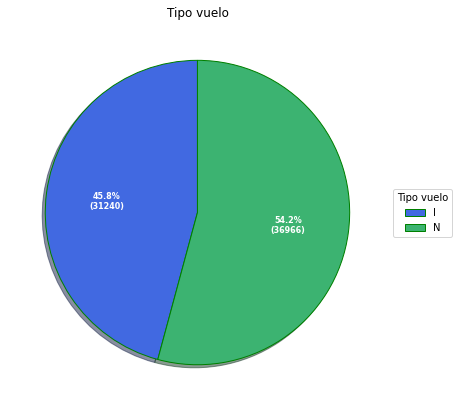

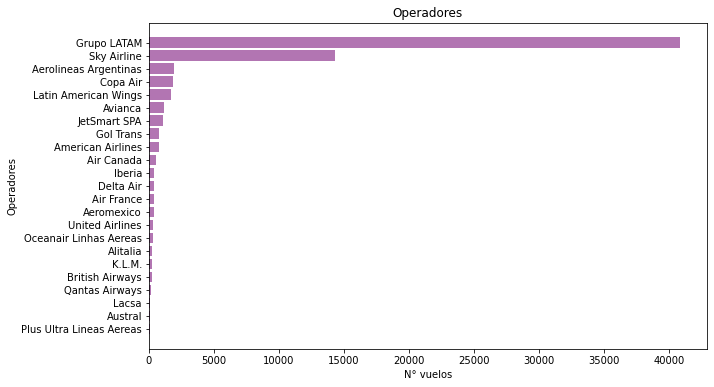

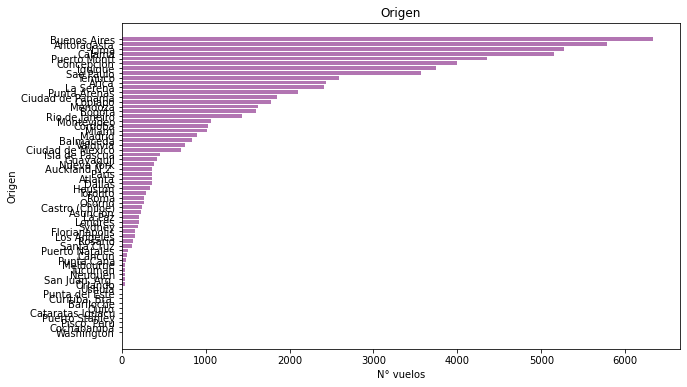

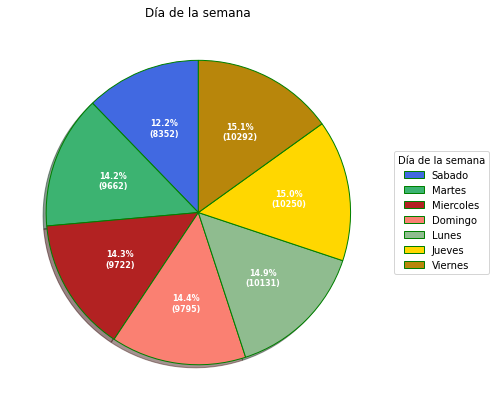

In [ ]:
#--> Tipo vuelo
df1 = df[['Fecha', 'TIPOVUELO']]
df2 = df1.groupby('TIPOVUELO', as_index=False).count()
df2.rename(columns = {'Fecha':'NFLIGHTS'}, inplace = True)

grafico('Torta',df2['TIPOVUELO'],df2['NFLIGHTS'],"Tipo vuelo")

#--> Operador
df1 = df[['Fecha', 'OPERA']]
df2 = df1.groupby('OPERA', as_index=False).count()
df2.rename(columns = {'Fecha':'NFLIGHTS'}, inplace = True)
df2 = df2.sort_values(ascending=True, by='NFLIGHTS')

grafico('Barra',df2['OPERA'],df2['NFLIGHTS'],'Operadores')

#--> Destino
df1 = df[['Fecha', 'SIGLADES']]
df2 = df1.groupby('SIGLADES', as_index=False).count()
df2.rename(columns = {'Fecha':'NFLIGHTS'}, inplace = True)
df2 = df2.sort_values(ascending=True, by='NFLIGHTS')

grafico('Barra',df2['SIGLADES'],df2['NFLIGHTS'],'Origen')

#--> Día de la semana
df1 = df[['Fecha', 'DIANOM']]
df2 = df1.groupby('DIANOM', as_index=False).count()
df2.rename(columns = {'Fecha':'NFLIGHTS'}, inplace = True)
df2 = df2.sort_values(ascending=True, by='NFLIGHTS')

grafico('Torta',df2['DIANOM'],df2['NFLIGHTS'],'Día de la semana')

# 1.1.2 Respuesta

De los vuelos nacionales e internacionales tienen una presencia similar en su frecuencia, así como en los días de la semana siendo el día sábado aquel con menos presencia. Por otro lado, la línea más fuerte en el n° de vuelos es Latam seguido de Sky quién sería el competidor más cercano. Llama la atención la predominancia en dos aerolíneas, que si se detiene alguna de ellas por algún evento el sistema podría verse afectado fuertemente.

Nota: colores fuente siguen el patrón de colores de los balances Latam.

#**1.2 Veamos el comportamiento de los vuelos**

Dado lo anterior, si se agrupa por fecha y se contabiliza el n° de vuelos se puede obtener la trayectoria de una serie de tiempo, la cual puede presentar un escenario al que se enfrentaría la compañía en la primera semana si se toma una frecuencia diaria.

#**1.2.1 Estudiemos el comportamiento de la serie**

In [ ]:
import datetime
from datetime import datetime

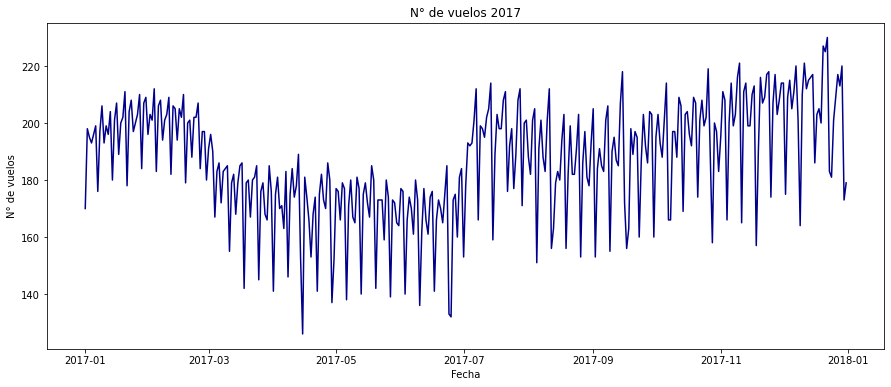

In [ ]:
import matplotlib.pyplot as plt

df1 = df[['Fecha', 'SIGLAORI']]
df2 = df1.groupby('Fecha', as_index=True).count()

df2.rename(columns = {'SIGLAORI':'NFLIGHTS'}, inplace = True)

plt.figure(figsize=(15,6))

plt.plot(df2, color = "darkblue")

plt.xlabel('Fecha')
plt.ylabel('N° de vuelos')
plt.title('N° de vuelos 2017')

plt.show()

En primer lugar la serie muestra una forma sinusoidal a simple vista, con fuertes peaks y off-peacks cada 5 días aprox. es probable que tenga un quiebre la serie a mitad de 2017 en el régimen de la misma. Llama la atención el cómo termina. Es interesante saber cómo quedaría un forecast al menos tradicional para estimar cómo empezará el sigiuente año.

In [ ]:
#!apt-get -qq install -y statsmodels

E: Unable to locate package statsmodels


In [ ]:
#!pip3 install numpy scipy patsy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!apt-get -qq install -y pmdarima

E: Unable to locate package pmdarima


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima.utils import nsdiffs
from pmdarima.arima import ADFTest, auto_arima
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

import numpy as np

import warnings
warnings.filterwarnings("ignore")

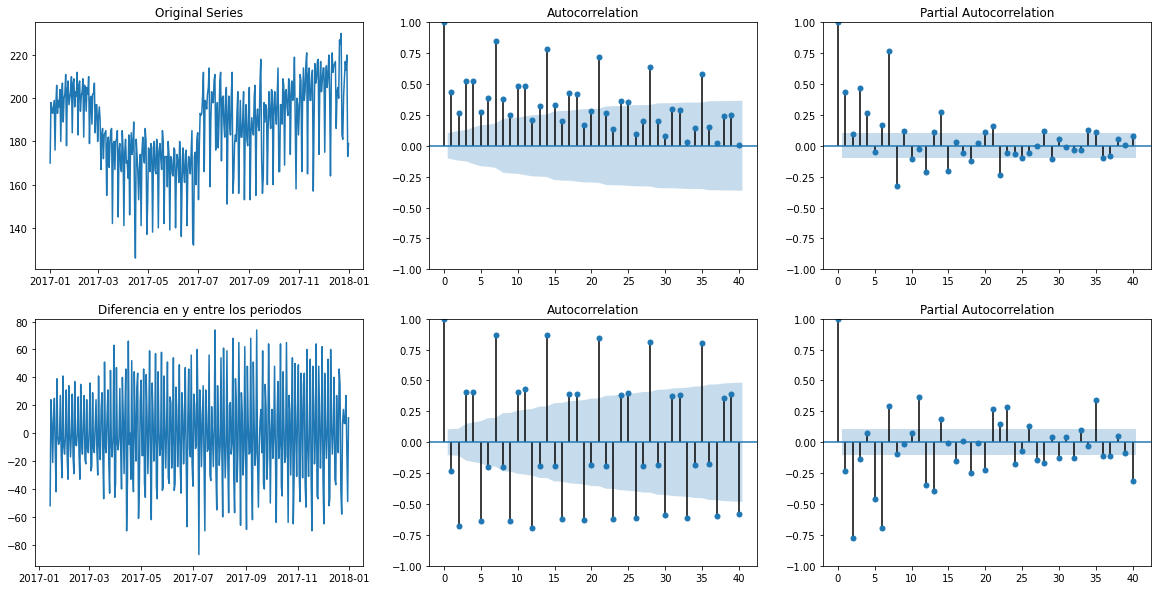

In [ ]:
lags = 40
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes[0, 0].plot(df2)
axes[0, 0].set_title('Original Series')
plot_acf(df2, lags = lags, ax=axes[0, 1])
plot_pacf(df2, lags = lags, ax=axes[0, 2])

# 2nd Differencing En y Entre Periodos
axes[1, 0].plot(df2.diff().diff(periods=12))
axes[1, 0].set_title('Diferencia en y entre los periodos')
plot_acf(df2.diff().diff(periods=12).dropna(),lags = lags, ax=axes[1,1])
plot_pacf(df2.diff().diff(periods=12).dropna(),lags = lags, ax=axes[1,2])

plt.show()

El proceso no es estacionario y presenta una bi-estacionaliad marcada cada 4-5 días. Bastaría con diferenciar el proceso para hacerla estacionaria porlo que probablemente el modelo adecuado sería un ARIMA(p,d,q). Lo anterior para proyectar cuantos vuelos podrían salir en una siguiente semana.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime
from dateutil.relativedelta import relativedelta

import scipy
from scipy import stats
from scipy.stats import kstest
from statsmodels.stats.diagnostic import acorr_ljungbox as acorr_ljungbox

In [ ]:
def tsdiagnostic(residuos):
    residuos = residuos.loc["2017-01-09":]
    fig, axes = plt.subplots(2, 2, figsize=(15,10))
    axes[0,0].plot(residuos)
    axes[0,0].set_title('Residuos')

    # Media cero - Ttest
    p_ttest = stats.ttest_1samp(residuos, 0)[1] #pvalue 
    if (p_ttest > 0.05):
        print("Ttest: No se rechaza H0, la media es cero", p_ttest)
    if (p_ttest <= 0.05):
        print("Ttest: Se rechaza H0, la media no es cero", p_ttest)

    # Normalidad - KolmogorovSmirnov
    p_norm = kstest(residuos, 'norm')[1] #pvalue 
    if (p_norm > 0.05):
        print("Kolmogorov: No se rechaza H0, los residuos son normales", p_norm)
    if (p_norm <= 0.05):
        print("Kolmogorov: Se rechaza H0, los residuos no son normales", p_norm)
    sm.qqplot(residuos, line='s', ax = axes[0,1]) 
    axes[0,1].set_title('QQ Plot')

    # No autocorrelacion - BoxPierce o LjungBox
    lags = 30
    p_ljung_box_pierce = acorr_ljungbox(residuos, lags, return_df=True, boxpierce = True)
    axes[1,0].plot(p_ljung_box_pierce.lb_pvalue, 'bo', label = "Ljung-Box p-values", color = 'blue')
    axes[1,0].plot(p_ljung_box_pierce.bp_pvalue, 'go', label = "Box-Pierce p-values", color = 'orange')
    axes[1,0].axhline(y = 0.05, color = "red", label = "5% critical value")
    axes[1,0].set_title("$Test\ de\ Autocorrelacion\ $")
    axes[1,0].legend()

    # ACF
    plot_acf(residuos, lags = lags, zero = False, ax = axes[1,1])
    plt.show()

                                     SARIMAX Results                                     
Dep. Variable:                          NFLIGHTS   No. Observations:                  365
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 2)   Log Likelihood               -1525.517
Date:                           Thu, 11 Aug 2022   AIC                           3061.034
Time:                                   00:05:59   BIC                           3080.479
Sample:                               01-01-2017   HQIC                          3068.765
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6173      0.058    -10.649      0.000      -0.731      -0.504
ma.L1         -0.9965      0.185     -5.380

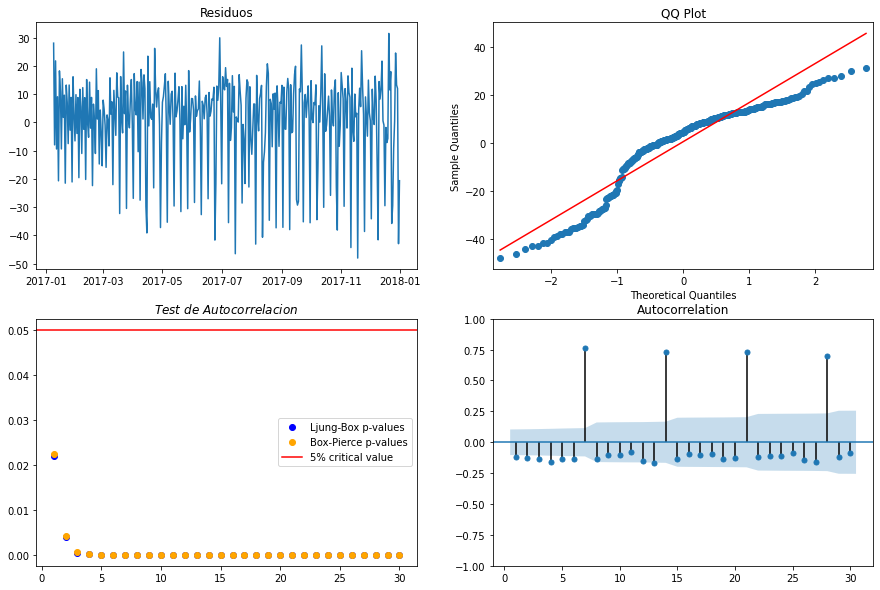

In [ ]:
#modelo = SARIMAX(df2,  order=(1, 1, 1), seasonal_order=(0, 5, 0, 3)).fit()
modelo = SARIMAX(df2,  order=(1, 2, 1), seasonal_order=(1, 1, 1, 2)).fit()
print(modelo.summary())

residuos = modelo.resid
tsdiagnostic(residuos)

El análisis de diagnóstico "paso la prueba", al menos incialmente, la estructura SEASONAL-ARIMA arroja pseudos-ruídos blancos, no obstante, como el desafío es meramente descriptivo se seguirá adelante para obtener una predicción.

In [ ]:
last_date = df2.index.max()
pred_start = last_date + relativedelta(days=1)
pred_end = pred_start +  relativedelta(days=14) # 2 semana

print(last_date, pred_start, pred_end)

results_prediction = modelo.predict(start="2017-01-09", end=pred_end)
results_IC = modelo.get_prediction(start="2017-01-09", end=pred_end).conf_int()
results_full = results_IC.merge(results_prediction, left_index=True, right_index=True)

proy = results_full.merge(df2["NFLIGHTS"], right_index=True, left_index=True, how="outer")[:pred_end]


2017-12-31 00:00:00 2018-01-01 00:00:00 2018-01-15 00:00:00


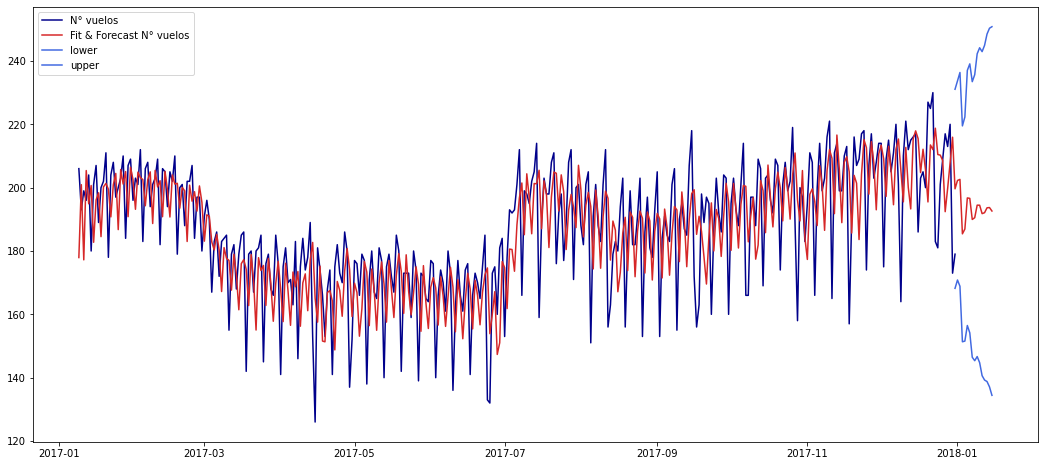

In [ ]:
plt.figure(figsize=(18,8))
l0, = plt.plot(proy.NFLIGHTS.loc["2017-01-09":], label="N° vuelos", color = "darkblue" )
l1, = plt.plot(proy.predicted_mean.loc["2017-01-09":],  label="Fit & Forecast N° vuelos", color = "tab:red")
l2, = plt.plot(proy.loc[last_date:, 'lower NFLIGHTS'], label="lower", color = "royalblue")
l3, = plt.plot(proy.loc[last_date:, 'upper NFLIGHTS'], label="upper", color = "royalblue")
plt.legend(handles=[l0,l1,l2,l3])
plt.show()

**Conclusión:** Durante los primeros 4 días el forecast muestra valores dentro del rango inferior a los 200 vuelos diarios, en virtud del comportamiento de la serie, la cual se auto explica.

Técnicamente se aprecia un cambio de regimen de la misma (que con la librería breakpoints de R pordía determinarse) y el modelos seasonal-arima se adapta al posible cambio de régimen.

A mediano plazo (más de 14 lags) la serie tenderá a la media, para lo cual si quisiera extenderse el horizonte de predicción deberían utilizarse variables exógenas que expliquen el ciclo, tendencia y estacionalidad del proceso *X(t)*.

# **2. Data analysis**

# 2.1 Pregunta 2: Creación de variables

Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
 
*   temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no
*   dif_min : diferencia en minutos entre Fecha-O y Fecha-I.
* atraso_15 : 1 si dif_min > 15, 0 si no.
* periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [25]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [26]:
#Var. Auxiliar: 
df['aux_count'] = 1

#Temporada alta
conditionlist = [
    (df['Fecha-I'] >= '2016-12-15') & (df['Fecha-I'] < '2017-03-04'),
    (df['Fecha-I'] >= '2017-07-15') & (df['Fecha-I'] < '2017-08-01'),
    (df['Fecha-I'] >= '2017-09-11') & (df['Fecha-I'] < '2017-10-01'),
    (df['Fecha-I'] >= '2017-12-15') & (df['Fecha-I'] < '2018-03-04')]
choicelist = [1, 1, 1, 1]
df['temporada_alta'] = np.select(conditionlist, choicelist, default = 0)

#Diferencias en minutos
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).astype('timedelta64[m]')

#Retraso más de 15 minutos
df['atraso_15'] = np.where(df['dif_min'] >= 15, 1, 0)

#Periodo día
df['Hora'] = pd.to_datetime(df["Fecha-I"]).dt.time
import datetime
conditionlist = [
    (df['Hora'] >= datetime.time(5, 0, 0)) & (df['Hora'] < datetime.time(12, 0, 0)),
    (df['Hora'] >= datetime.time(12, 0, 0)) & (df['Hora'] < datetime.time(19, 0, 0))
    ]
choicelist = [1, 2]
df['cod_periodo_dia'] = np.select(conditionlist, choicelist, default = 3)

conditionlist = [
    (df['cod_periodo_dia'] == 1),
    (df['cod_periodo_dia'] == 2)]
choicelist = ['mañana', 'tarde']
df['periodo_dia'] = np.select(conditionlist, choicelist, default = 'noche')

df.head(n=2)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,Fecha,aux_count,temporada_alta,dif_min,atraso_15,Hora,cod_periodo_dia,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017-01-01,1,1,3.0,0,23:30:00,3,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017-01-02,1,1,9.0,0,23:30:00,3,noche


In [27]:
#table = pd.pivot_table(df, index = ['campo1','campo2..'], columns = ['columna1','columna2...'], values= 'CAPITAL_INICIAL',  aggfunc= [np.mean, np.median], margins= True, margins_name='Total')
#Revisión
latam = df.pivot_table(index =['SIGLADES'], columns = ['atraso_15'], values = 'aux_count',  aggfunc= [sum], margins= True, margins_name='Total')
latam

sum                
atraso_15            0        1  Total
SIGLADES                              
Antofagasta     4876.0    910.0   5786
Arica           2076.0    360.0   2436
Asuncion         164.0     68.0    232
Atlanta          336.0     22.0    358
Auckland N.Z.    223.0    138.0    361
...                ...      ...    ...
Tucuman           28.0     10.0     38
Ushuia             2.0      4.0      6
Valdivia         624.0    129.0    753
Washington         1.0      NaN      1
Total          54590.0  13616.0  68206

[63 rows x 3 columns]

# 2.1.1 Respuesta

Las variables son creadas donde el "target" debiera ser aquella que establece retraso dada la diferencia de 15 minutos.

# **2.2 Pregunta 3:** Variables predictivas

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [111]:
#def grafico2(tipo,dx,dy,titulo):
def grafico_latam2(dx,dy,transp):
  df1 = df[[dx, dy]]
  df2 = df1.groupby(dx, as_index=False).count()
  df2.rename(columns = {dy:'aux_count'}, inplace = True)

  if transp == 'H':
    #Grafico de frecuencias absolutas
    sns.set(style="white")
    plt.figure(figsize=(9, 9))
    bar1 = sns.barplot(x = dx,  y = 'aux_count', data = df2, color='aqua')
    target = df[df.atraso_15 == 1]
    bar2 = sns.barplot(x = dx, y = "aux_count", data = target, estimator=sum, ci=None,  color='darkblue')
    top_bar = mpatches.Patch(color='aqua', label='En hora')
    bottom_bar = mpatches.Patch(color='darkblue', label='Atraso')
    plt.legend(handles=[top_bar, bottom_bar])
    plt.show()

    #Grafico de frecuencias relativas
    if dx != 'SIGLADES':
      plt.figure(figsize=(9, 9))
      target = df[df.atraso_15 == 1].groupby(dx)['aux_count'].sum().reset_index()
      target['aux_count'] = [i / j * 100 for i,j in zip(target['aux_count'], df2['aux_count'])]
      df2['aux_count'] = [i / j * 100 for i,j in zip(df2['aux_count'], df2['aux_count'])]
      bar1 = sns.barplot(x = dx, y = "aux_count", data = df2, color='aqua')
      bar2 = sns.barplot(x = dx, y = "aux_count", data = target, color='darkblue')
      top_bar = mpatches.Patch(color='aqua', label='En hora')
      bottom_bar = mpatches.Patch(color='darkblue', label='Atraso')
      plt.legend(handles=[top_bar, bottom_bar])
      plt.show()
  else:
    #Grafico de frecuencias absolutas
    sns.set(style="white")
    plt.figure(figsize=(9, 9))
    bar1 = sns.barplot(y = dx,  x = 'aux_count', data = df2, color='aqua',orient = 'h')
    target = df[df.atraso_15 == 1]
    bar2 = sns.barplot(y = dx, x = 'aux_count', data = target, estimator=sum, ci=None,  color='darkblue',orient = 'h')
    top_bar = mpatches.Patch(color='aqua', label='En hora')
    bottom_bar = mpatches.Patch(color='darkblue', label='Atraso')
    plt.legend(handles=[top_bar, bottom_bar])
    plt.show()

    #Grafico de frecuencias relativas
    if dx != 'SIGLADES':
      plt.figure(figsize=(9, 9))
      target = df[df.atraso_15 == 1].groupby(dx)['aux_count'].sum().reset_index()
      target['aux_count'] = [i / j * 100 for i,j in zip(target['aux_count'], df2['aux_count'])]
      df2['aux_count'] = [i / j * 100 for i,j in zip(df2['aux_count'], df2['aux_count'])]
      bar1 = sns.barplot(y = dx, x = "aux_count", data = df2, color='aqua',orient = 'h')
      bar2 = sns.barplot(y = dx, x = "aux_count", data = target, color='darkblue',orient = 'h')
      top_bar = mpatches.Patch(color='aqua', label='En hora')
      bottom_bar = mpatches.Patch(color='darkblue', label='Atraso')
      plt.legend(handles=[top_bar, bottom_bar])
      plt.show()

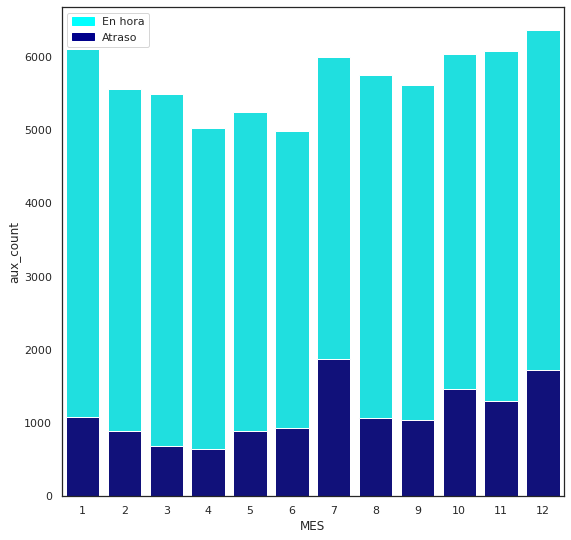

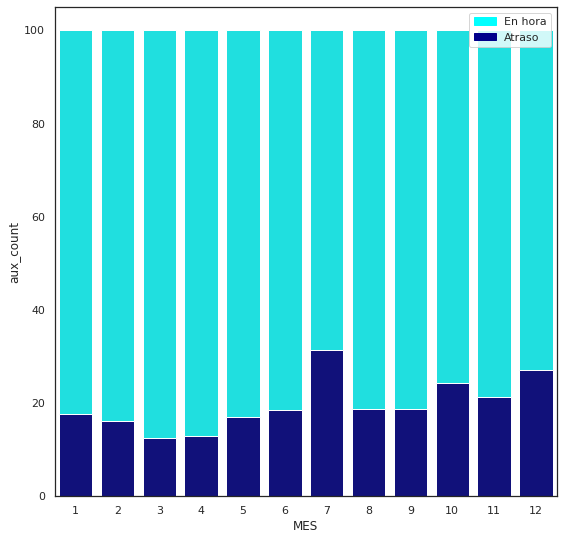

In [112]:
grafico_latam2('MES','atraso_15','H')

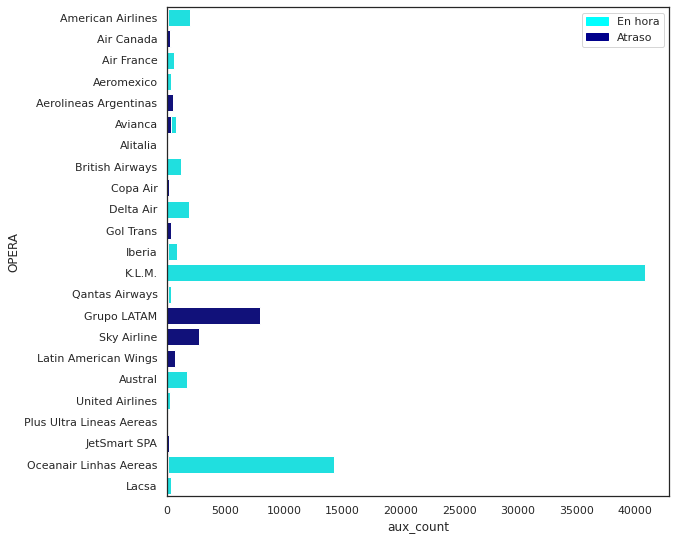

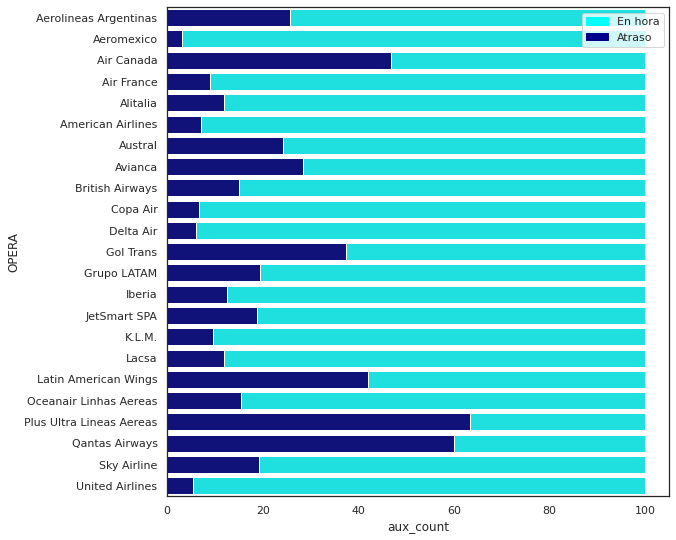

In [113]:
grafico_latam2('OPERA','atraso_15','HL')

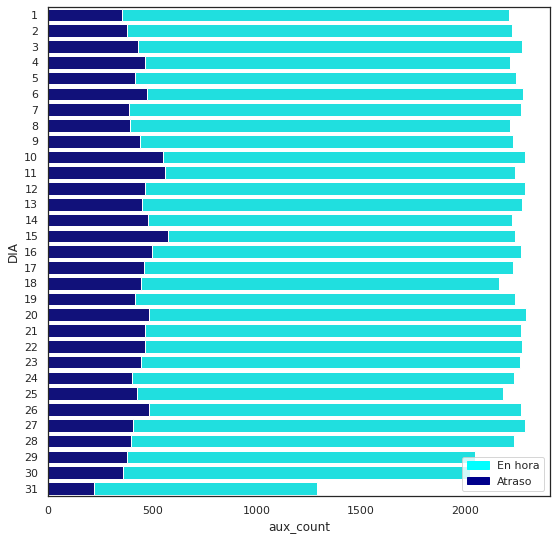

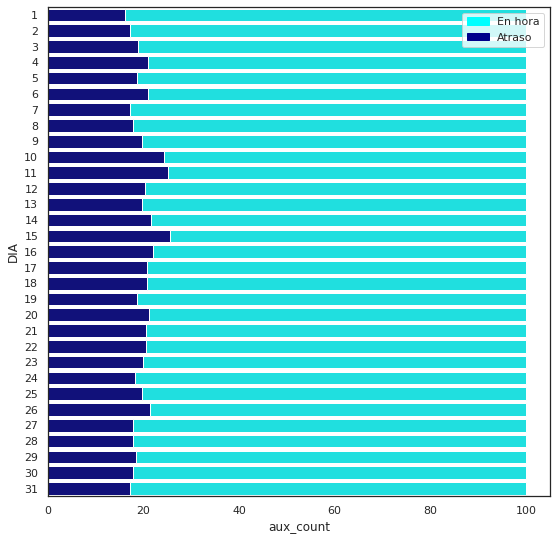

In [107]:
grafico_latam2('DIA','atraso_15','HL')

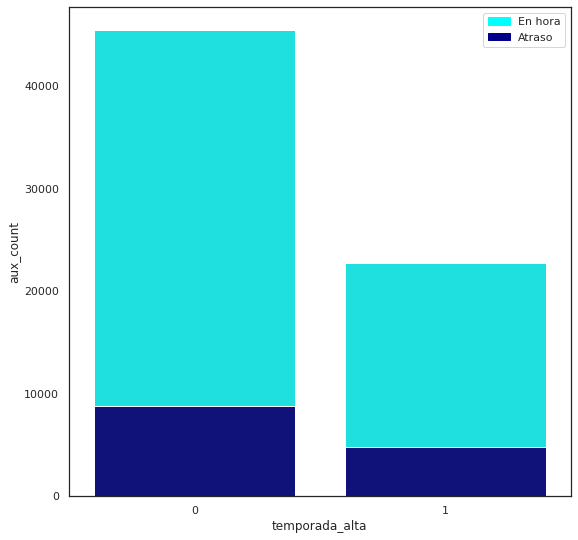

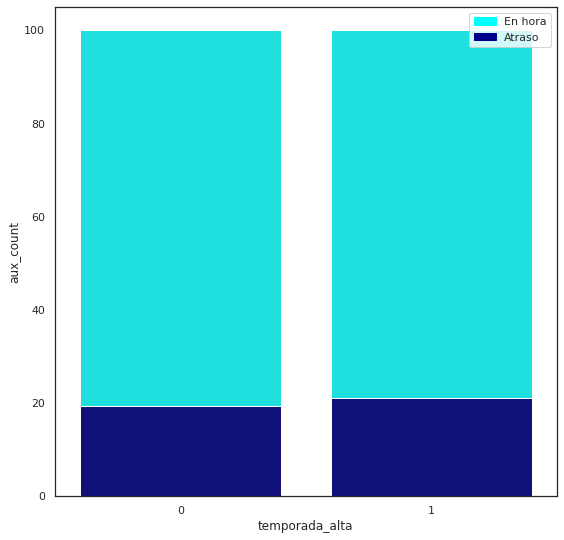

In [108]:
grafico_latam2('temporada_alta','atraso_15','H')

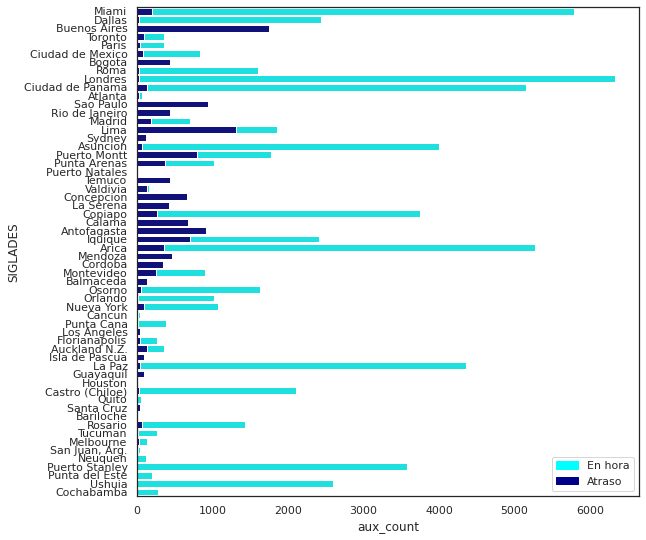

In [114]:
grafico_latam2('SIGLADES','atraso_15','HL')

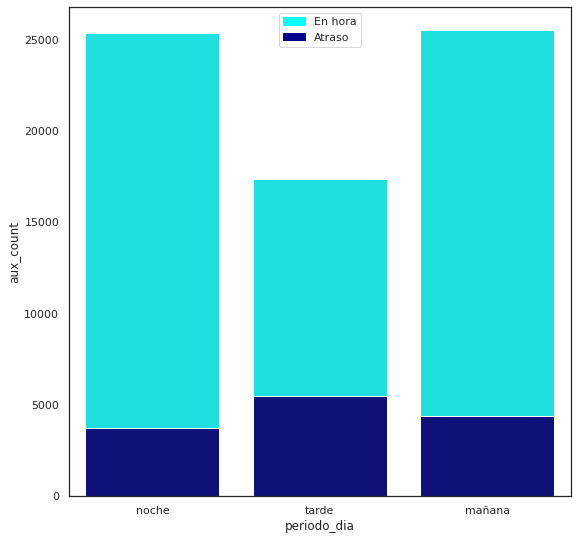

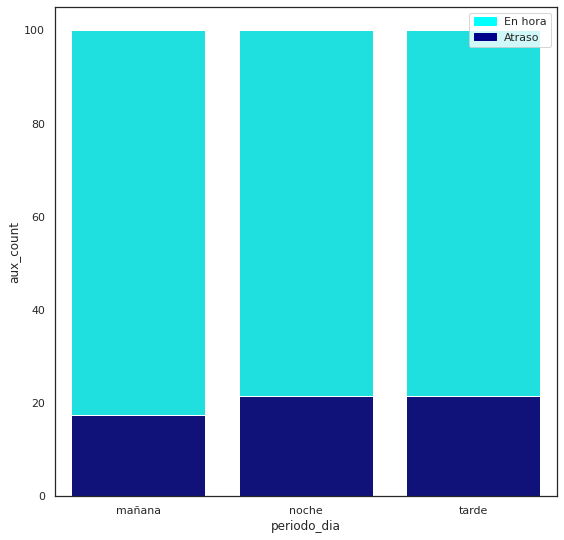

In [116]:
grafico_latam2('periodo_dia','atraso_15','H')

# 2.2.1 Respuesta


Los retrasos totales están fuertemente explicados por los retrasos de Latam y Sky esto explicado principalmente por su cuota de participación en el n° de vuelos. Por otro lado en una probabilidad simple, aeorlinas de menor participación como: Air Canada  Plus Ultra L.A., Q. Airways, Latin American Wins y Gol Trans.
Los días parecieran tener una distribución uniforme discreta, no obstante se aprecian algos peaks en los días 10, 11, 15 y 26, desde el 27 hacia el final denota una tendencia negativa probablemente un elemento estacional tal como se vió en la serie de tiempo analizada anteriormente.

# 2.2.2 Valor y discriminación de la información

In [47]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['% of Events Cum.'] = d['% of Events'].cumsum()
        d['% of Non-Events Cum.'] = d['% of Non-Events'].cumsum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d['Kol.-Smirn.'] = np.abs(d['% of Events Cum.'] - d['% of Non-Events Cum.'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value de: " + ivars + " es " + str(round(d['IV'].sum() * 100,1)) + "%")
        print("Kolmogorov-Smirnov: " + ivars + " es " + str(round(d['Kol.-Smirn.'].max() * 100,1)) + "%")
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [48]:
df1 = df[['SIGLADES','OPERA','MES','DIA','temporada_alta','TIPOVUELO','atraso_15']]

iv, woe = iv_woe(data = df1, target = 'atraso_15', bins=10, show_woe = False)

Information value de: SIGLADES es 18.7%
Kolmogorov-Smirnov: SIGLADES es 6.8%
Information value de: OPERA es 16.2%
Kolmogorov-Smirnov: OPERA es 2.6%
Information value de: MES es 9.0%
Kolmogorov-Smirnov: MES es 6.7%
Information value de: DIA es 0.9%
Kolmogorov-Smirnov: DIA es 2.2%
Information value de: temporada_alta es 0.3%
Kolmogorov-Smirnov: temporada_alta es 2.5%
Information value de: TIPOVUELO es 6.1%
Kolmogorov-Smirnov: TIPOVUELO es 12.3%


# 2.2.3 Respuesta

En mi experiencia, variables como la cuidad de destino, aerolínea que opera y tipo de vuelo tienen argumentos descriptivos para poder aportar información (dado su IV) y maximizar el poder de clasificación (KS) entre vuelos retrasados y en hora.

# 2.2.4 Baseline machile learning

In [85]:
pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.9 MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57843 sha256=7b14e23082c5db4a16f4ce52d06ccbb96737ea9938f376098fa4b39a36772fb7
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy


In [86]:
import scorecardpy as sc

[INFO] filtering variables ...
[INFO] creating woe binning ...
-------- 1/2 MES --------
>>> dt[MES].describe(): 
count    68206.000000
mean         6.622585
std          3.523321
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MES, dtype: float64 



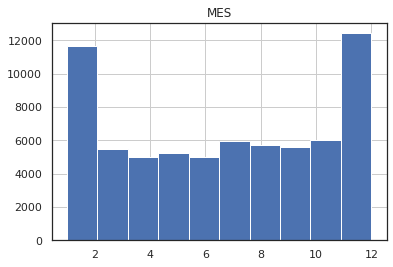

>>> Current breaks:
5.0,7.0,8.0,10.0 



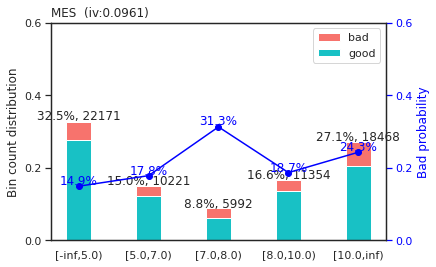

>>> Adjust breaks for (1/2) MES?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/2 OPERA --------
>>> dt[OPERA].describe(): 
count           68206
unique             23
top       Grupo LATAM
freq            40892
Name: OPERA, dtype: object 

>>> dt[OPERA].value_counts(): 
Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral     

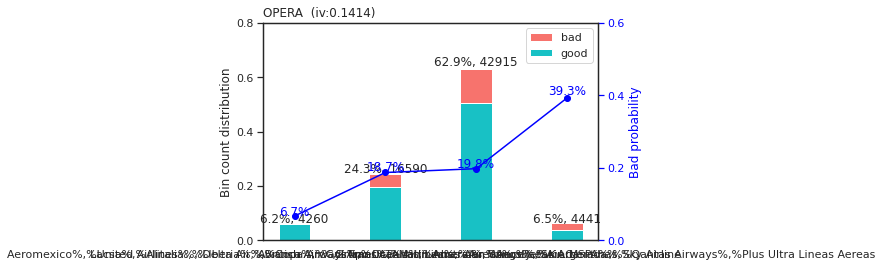

>>> Adjust breaks for (2/2) OPERA?
1: next 
2: yes 
3: back
Selection: 1
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


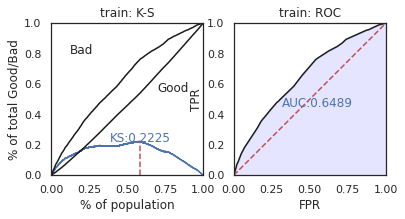

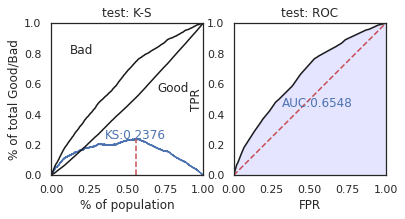

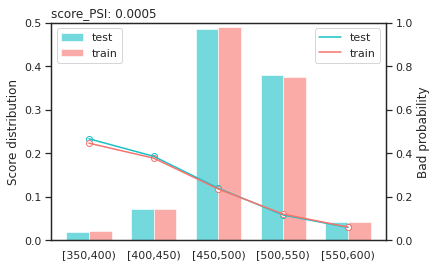

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.000511}

In [58]:
#dat = df[['SIGLADES','OPERA','MES','DIA','temporada_alta','TIPOVUELO','atraso_15']]
dat = df[['OPERA','MES','temporada_alta','TIPOVUELO','atraso_15']]

# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y = "atraso_15")

# breaking dt into train and test
train, test = sc.split_df(dt_s, 'atraso_15').values()

# woe binning ------
bins = sc.woebin(dt_s, y = "atraso_15")
# sc.woebin_plot(bins)

# binning adjustment
# # adjust breaks interactively
breaks_adj = sc.woebin_adj(dt_s, "atraso_15", bins) 
# # or specify breaks manually
#breaks_adj = {
#    'age.in.years': [26, 35, 40],
#    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
#}
bins_adj = sc.woebin(dt_s, y="atraso_15", breaks_list=breaks_adj)

# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'atraso_15']
X_train = train_woe.loc[:,train_woe.columns != 'atraso_15']
y_test = test_woe.loc[:,'atraso_15']
X_test = test_woe.loc[:,train_woe.columns != 'atraso_15']

# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

# 2.2.5 Respuesta

Utilizando variables tales como Operador, mes del vuelo, temporada alta, tipo de vuelo se logra un modelo base de un 64% de AUC, esta es la línea base que en mi criterio debería exigirsele a cualquier otro algoritmo que se pruebe. Este modelo no ha sido potenciado por otra variable.

In [49]:
#print(iv)
#print(woe)

# **3. Modelo**

# 3.1 Pregunta 4: modelamiento

Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Una alternativa sería ingresar la temperatura del día (y ojalá hora) del vuelo y que esta actue como una variable predictora. Buscando en la web encontré una librería llamada pyowm que muestra según coordenadas diferentes métricas de clima. No obstante, necesita licenciamiento. 

In [19]:
##pip install pyowm

##from pyowm import OWM
##from pyowm.utils import config
##from pyowm.utils import timestamps
##owm = OWM('your free OWM API key')
##mgr = owm.weather_manager()
##observation = mgr.weather_at_place('London,GB')
##w = observation.weather
##w
### -> UnauthorizedError: Invalid API Key provided
#mgr.station_day_history

In [23]:
import pandas as pd
import sklearn
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,confusion_matrix,classification_report
import matplotlib.pylab as plt
import matplotlib.pyplot as plt2
from joblib import dump, load
import seaborn as sns 
import numpy as np

In [ ]:
#df['ID_Proxy'] = str(df['Fecha-I']) + '|' + df['Ori-I'] + '|' + df['Des-I'] + '|' + df['Emp-I']
df.insert(0, 'ID_Proxy', range(0, 0 + len(df)))

In [56]:
df1 = df[['Des-I','Emp-I','MES','temporada_alta','TIPOVUELO','atraso_15']]

for col in ['Des-I', 'Emp-I', 'TIPOVUELO']:
  df1[col] = df1[col].astype('category')
  df1[col+'ID'] = df1[col].cat.codes

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Des-I           68206 non-null  category
 1   Emp-I           68206 non-null  category
 2   MES             68206 non-null  int64   
 3   temporada_alta  68206 non-null  int64   
 4   TIPOVUELO       68206 non-null  category
 5   atraso_15       68206 non-null  int64   
 6   Des-IID         68206 non-null  int8    
 7   Emp-IID         68206 non-null  int8    
 8   TIPOVUELOID     68206 non-null  int8    
dtypes: category(3), int64(3), int8(3)
memory usage: 2.0 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [58]:
df2 = df1[['Des-IID','Emp-IID','MES','temporada_alta','TIPOVUELOID','atraso_15']]
X_train, X_test = train_test_split (df2, test_size=0.3, random_state=10)

target = 'atraso_15'
IDcol = 'ID_Proxy'

In [59]:
def modelfit(alg, dtrain,dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    estadisticos = {'accuracy': [],'precision':[],'recall':[],'roc':[]}
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['atraso_15'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    probs = alg.predict_proba(dtest[predictors])
    probs = probs[:, 1]
    test_predictions = alg.predict(dtest[predictors])
    # calculate AUC
    auc = metrics.roc_auc_score(dtest['atraso_15'], probs)
    print('AUC Test: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(dtest['atraso_15'], probs)
      # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='')
    fpr, tpr, thresholds = roc_curve(dtrain['atraso_15'], dtrain_predprob)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='')
    # show the plot
    plt.draw()
    plt.figure() 
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['atraso_15'], cv=cv_folds, scoring='roc_auc')
    
    
    accuracy=metrics.accuracy_score(dtest['atraso_15'].values, test_predictions)
    roc=metrics.roc_auc_score(dtest['atraso_15'], probs)
    estadisticos['accuracy'].append(accuracy)
    estadisticos['roc'].append(roc)
       
    
    #Print model report:
    print ("\nModel Report Train")
    print ("Accuracy: %.4g" % metrics.accuracy_score(dtrain['atraso_15'].values, dtrain_predictions))
    print ("AUC Score: %f" % metrics.roc_auc_score(dtrain['atraso_15'], dtrain_predprob))
    print("------------------------------------------------------------------------------------")
    print ("\nModel Report Test")
    print ("Accuracy : %.4g" % accuracy)
    print ("AUC Score: %f" % roc)
    print("---------------------------------------------------------------------------------------")
    
    print("Confusion Matrix Test")
    print(confusion_matrix(dtest['atraso_15'], test_predictions))
    print("--------------------------------------------------------------")
    print("Classification Report")
    report=classification_report(dtest['atraso_15'], test_predictions, output_dict=True)
    print(classification_report(dtest['atraso_15'], test_predictions))
    print("--------------------------------------------------------------")
    
    for key,values in report.items():
        if key=='1':
            for k,v in values.items():
                if k=='precision':
                    precision=v
                if k=='recall':
                    recall=v
                if k=='f1-score':
                    f1=v
    
    estadisticos['precision'].append(precision)
    estadisticos['recall'].append(recall)
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        print(feat_imp)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.draw()
    
    return estadisticos

AUC Test: 0.654

Model Report Train
Accuracy: 0.8039
AUC Score: 0.657962
------------------------------------------------------------------------------------

Model Report Test
Accuracy : 0.7946
AUC Score: 0.654206
---------------------------------------------------------------------------------------
Confusion Matrix Test
[[16241     3]
 [ 4200    18]]
--------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.79      1.00      0.89     16244
           1       0.86      0.00      0.01      4218

    accuracy                           0.79     20462
   macro avg       0.83      0.50      0.45     20462
weighted avg       0.81      0.79      0.70     20462

--------------------------------------------------------------
CV Score : Mean - 0.654756 | Std - 0.006664283 | Min - 0.6415325 | Max - 0.6595677
MES               0.340150
Des-IID           0.279218
TIPOVUELOID       0.186230
Emp-I

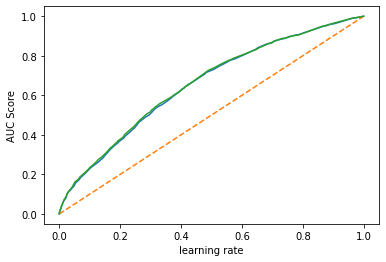

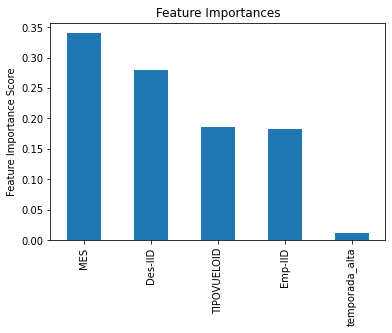

In [60]:
predictors = [x for x in X_train.columns if x not in [target, IDcol]]
GB = GradientBoostingClassifier(n_estimators=25,random_state=10)
plt.ylabel('AUC Score')
plt.xlabel('learning rate')
model=modelfit(GB, X_train,X_test, predictors)

In [75]:
fileDownloaded = drive.CreateFile({'id':'1oXTqzM1GrqXi4s6gXTZGzf5n6osRiG1P'})
fileDownloaded.GetContentFile('clima_2017_santiago.csv')
dftime = pd.read_csv('clima_2017_santiago.csv', delimiter=';' )

In [77]:
dftime['Fecha'] = pd.to_datetime(dftime['Fecha'])
dftime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            365 non-null    datetime64[ns]
 1   MES              365 non-null    int64         
 2   DIA              365 non-null    int64         
 3   T. MEDIA         365 non-null    int64         
 4   T. MAX           365 non-null    int64         
 5   T. MIN           365 non-null    int64         
 6   V. MEDIA VIENTO  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 20.1 KB


In [81]:
dftime = dftime.drop(['MES','DIA'],axis=1)

In [78]:
df_aux = df[['Fecha','Des-I','Emp-I','MES','temporada_alta','TIPOVUELO','atraso_15']]
for col in ['Des-I', 'Emp-I', 'TIPOVUELO']:
  df_aux[col] = df_aux[col].astype('category')
  df_aux[col+'ID'] = df_aux[col].cat.codes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [82]:
df1 = pd.merge(df_aux, dftime, on='Fecha')

df2 = df1[['Des-IID','Emp-IID','MES','temporada_alta','TIPOVUELOID','T. MEDIA','V. MEDIA VIENTO','atraso_15']]
X_train, X_test = train_test_split (df2, test_size=0.3, random_state=10)

target = 'atraso_15'
IDcol = 'ID_Proxy'

AUC Test: 0.667

Model Report Train
Accuracy: 0.8001
AUC Score: 0.659917
------------------------------------------------------------------------------------

Model Report Test
Accuracy : 0.8037
AUC Score: 0.666632
---------------------------------------------------------------------------------------
Confusion Matrix Test
[[16428     5]
 [ 4012    17]]
--------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     16433
           1       0.77      0.00      0.01      4029

    accuracy                           0.80     20462
   macro avg       0.79      0.50      0.45     20462
weighted avg       0.80      0.80      0.72     20462

--------------------------------------------------------------
CV Score : Mean - 0.6550445 | Std - 0.00532935 | Min - 0.6471625 | Max - 0.6606872
MES                0.302946
Des-IID            0.259815
TIPOVUELOID        0.159231
Em

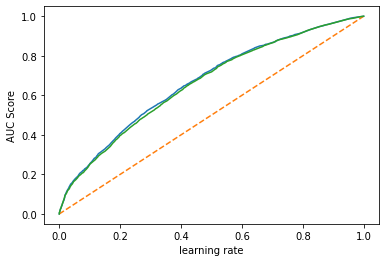

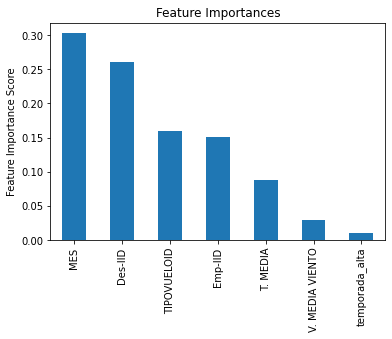

In [83]:
predictors = [x for x in X_train.columns if x not in [target, IDcol]]
GB = GradientBoostingClassifier(n_estimators=25,random_state=10)
plt.ylabel('AUC Score')
plt.xlabel('learning rate')
model=modelfit(GB, X_train,X_test, predictors)

# 3.1.1 Respuesta

Las metodologías utilizdas fue un scorecar con link logit y es tomado como baseline para exigirle una performance mínima al Gradient Boosting.

# 3.2 Pregunta 5

Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

# 3.2.1 Respuesta

Se testea un Gadient Boost (Chen T. & Guestrin C.) que en mi expeciencia tiene mejor performance en comparación (Kutlug E.) con métodos de ensamble aleatorio, "*probablemente uno de los avances más importantes en el área del aprendizaje estadístico de las últimas dos décadas*" (Recarey, R., 2021. p.-29).
Se entrenaron 3 modelos: el baseline mediante un logistic-scorecard y al utilizar un GBoosting el AUC mejora muy poco (que si se justificara una distribución normal probablemente el t-test no daría diferencias asumiendo que ese AUC es el estimador máximo verosimil) y un GBoosting potenciado con variables obtenidas de https://www.meteored.cl/tiempo-en_Santiago+de+Chile-America+Sur-Chile-Region+Metropolitana+de+Santiago-SCEL-sactual-18578.html la cual no muestra una variación significativa (a simple vista no usando un test de hipótesis por la razón comentada). 

Las variables del mes y destino son las más relevantes en el modelo que de alguna manera muestra alguna relación con cuestiones de clima: visivilidad, temperatura, etc. Mi recomendación para mejorar este modelo es incorporar más variables relacionadas con clima, también algún indicador busátil como el precio de las acciones de la aerolínea, puesto que el mercado es el primero probablemente en reaccionar ante crisis de compañías (paralizaciones de actividades entre otros factores).

Interesante problema.

# **Referencias**

Clima: https://pypi.org/project/pyowm/

Scorecard (agrupación interactiva) https://pypi.org/project/scorecardpy/

Recarey, R. (2021): *Métodos de ensamblado en Machine Learning*. Universidad de la Coruña.

Chen T. & Guestrin C. (2021): *XGBoost: A Scalable Tree Boosting System*.

Kutlug E. (2020) *Assessing the predictive capability of ensemble tree methods for landslide susceptibility mapping using XGBoost, gradient boosting machine, and random forest*. SN Appl. Sci. 2, 1308 (2020). https://doi.org/10.1007/s42452-020-3060-1.